In [1]:
import xarray as xr

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import json
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import cartopy.crs as ccrs
# Assuming all required data and functions are imported/defined
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
sys.path.append(r'./nesi/project/niwa00018/ML_downscaling_CCAM/On-the-Extrapolation-of-Generative-Adversarial-Networks-for-downscaling-precipitation-extremes')
from src.process_input_training_data import *
gcm = 'ACCESS-CM2'
config_file = r'./experiment_configs/historical.json'
with open(config_file, 'r') as f:
    config = json.load(f)

__, orog, __ = prepare_static_fields(config)


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


<xarray.DataArray 'orog' ()>
array(1733.3604, dtype=float32) <xarray.DataArray 'he' ()>
array(1157.4626, dtype=float32) <xarray.DataArray 'vegt' ()>
array(17.000008, dtype=float32)


ERROR 1: PROJ: proj_create_from_database: Open of /nesi/project/niwa00018/rampaln/envs/ml_env_v2/share/proj failed


In [2]:

signal_gt = xr.open_dataset(r'./outputs/gt_cc_signal/gt_cc_signal_final_v2_geq1mm.nc')
model_hist = 'historically_trained_Gan'
model_future = r'Future_Hist_trained_Gan'
model_future_full = r'Future_only_trained_Gan'

In [3]:

def load_gcm(model, gcm):
    return xr.open_dataset(f'./outputs/{model}/CCAM_NIWA-REMS_{gcm}_hist_ssp370_pr_ens.nc')

def load_gcm_unet(model, gcm):
    return xr.open_dataset(f'./outputs/{model}/CCAM_NIWA-REMS_{gcm}_hist_ssp370_pr_unet.nc')



In [7]:
signal_gt.GCM.values

array(['ACCESS-CM2', 'AWI-CM-1-1-MR', 'CNRM-CM6-1', 'EC-Earth3',
       'NorESM2-MM'], dtype=object)

In [4]:
unet_future = []
unet_future_full = []
unet_hist = []
gan_future = []
gan_hist =[]
gan_future_full = []

for gcm in signal_gt.GCM.values[1:]:
    unet_future.append(load_gcm_unet(model_future, gcm).drop("GCM"))
    unet_future_full.append(load_gcm_unet(model_future_full, gcm).drop("GCM"))
    unet_hist.append(load_gcm_unet(model_hist, gcm).drop("GCM"))
    gan_future_full.append(load_gcm(model_future_full, gcm).drop("GCM"))
    gan_future.append(load_gcm(model_future, gcm).drop("GCM"))
    gan_hist.append(load_gcm(model_hist, gcm).drop("GCM"))
unet_future = xr.concat(unet_future, dim ="GCM")
unet_future['GCM'] = (('GCM'), list(signal_gt.GCM.values[:]))
unet_future_full = xr.concat(unet_future_full, dim ="GCM")
unet_future_full['GCM'] = (('GCM'), list(signal_gt.GCM.values[:]))
unet_hist = xr.concat(unet_hist, dim ="GCM")
unet_hist['GCM'] = (('GCM'), list(signal_gt.GCM.values[:]))
gan_hist = xr.concat(gan_hist, dim ="GCM")
gan_hist['GCM'] = (('GCM'), list(signal_gt.GCM.values[:]))
gan_future = xr.concat(gan_future, dim ="GCM")
gan_future['GCM'] = (('GCM'), list(signal_gt.GCM.values[:]))
gan_future_full = xr.concat(gan_future_full, dim ="GCM")
gan_future_full['GCM'] = (('GCM'), list(signal_gt.GCM.values[:]))

In [5]:
error_future = abs(gan_future.mean("member").hist_clim_rainfall.where(orog>0, np.nan) - signal_gt.where(orog>0, np.nan).hist_clim_rainfall)

In [6]:
error_hist = abs(gan_hist.mean("member").hist_clim_rainfall.where(orog>0, np.nan) - signal_gt.hist_clim_rainfall.where(orog>0, np.nan))

In [7]:
warming = {"ACCESS-CM2": 3.49, "EC-Earth3":2.91, "CNRM-CM6-1": 3.21, "AWI-CM-1-1-MR": 2.66, "NorESM2-MM": 1.78}

In [8]:
warming.items()

dict_items([('ACCESS-CM2', 3.49), ('EC-Earth3', 2.91), ('CNRM-CM6-1', 3.21), ('AWI-CM-1-1-MR', 2.66), ('NorESM2-MM', 1.78)])

In [9]:
season = 'DJF'
gan_hist_unet_e = abs(unet_hist.hist_clim_rainfall.sel(season =season) - signal_gt.hist_clim_rainfall.sel(season =season))
gan_future_unet_e = abs(unet_future.hist_clim_rainfall.sel(season =season) - signal_gt.hist_clim_rainfall.sel(season =season))
gan_future_e = abs(gan_future.hist_clim_rainfall.sel(season =season) - signal_gt.hist_clim_rainfall.sel(season =season))
gan_hist_e = abs(gan_hist.hist_clim_rainfall.sel(season =season) - signal_gt.hist_clim_rainfall.sel(season =season))

In [10]:
# In the figure below write "mean" and extreme in title

# In Manuscript have the figure for the 99th percentile but in the final figure have it for the 99.5 percentile or vice versa!!!

8.130762446222827
4.517842020539312
5.216620600881805
6.09066974664269
4.88332479433065


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


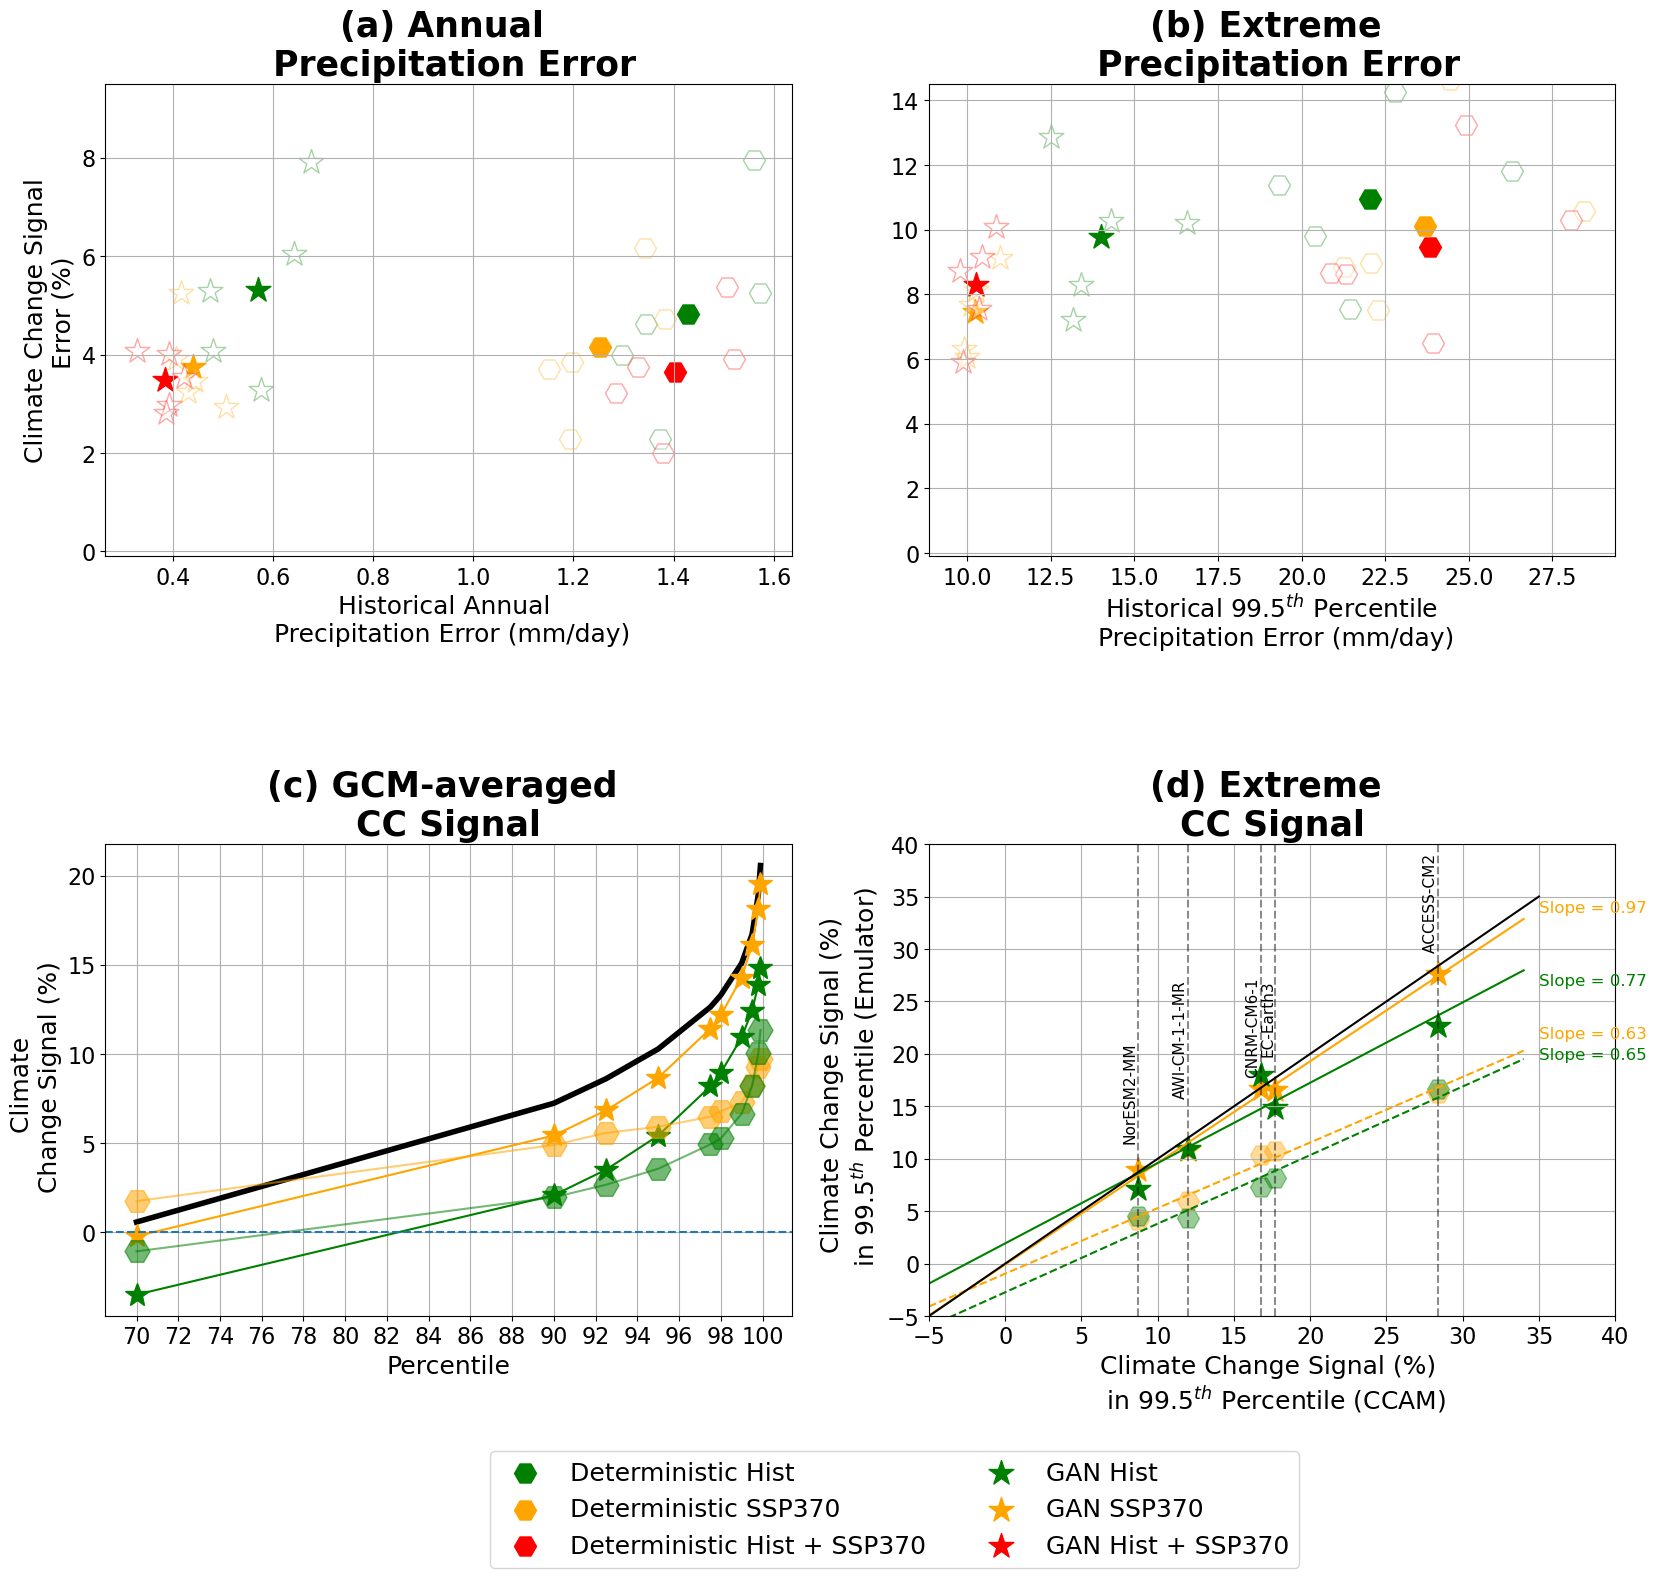

In [12]:


season = 'DJF'
df_results_future_mae_unet = pd.DataFrame()
df_results_future_full_mae_unet = pd.DataFrame()
df_results_hist_mae_unet = pd.DataFrame()
df_results_future_mae = pd.DataFrame()
df_results_future_full_mae = pd.DataFrame()
df_results_hist_mae = pd.DataFrame()
dsets = []
for gcm in signal_gt.GCM.values[1:]:
    signal_gan = load_gcm(model_future, gcm)
    signal_gan_full = load_gcm(model_future_full, gcm)
    signal_unet_future = load_gcm_unet(model_future, gcm)
    signal_unet_future_full = load_gcm_unet(model_future_full, gcm)
    signal_unet_hist = load_gcm_unet(model_hist, gcm)
    signal_gan2 = load_gcm(model_hist, gcm)
    v1 = signal_gan.seas_cc_signal.mean("season").mean("member")
    v1_full = signal_gan_full.seas_cc_signal.mean("season").mean("member")
    v11_full = signal_unet_future_full.seas_cc_signal.mean("season").mean("member")
    v2 = signal_gan2.seas_cc_signal.mean("season").mean("member")

    v11 = signal_unet_future.seas_cc_signal.mean("season").mean("member")
    v22 = signal_unet_hist.seas_cc_signal.mean("season").mean("member")

    v3 = signal_gt.seas_cc_signal.mean("season").sel(GCM=gcm)
    dsets.append(v2 -v3)
    v1 = v1.where(orog > 0, np.nan)
    v1_full = v1_full.where(orog > 0, np.nan)
    v2 = v2.where(orog > 0, np.nan)

    v11 = v11.where(orog > 0, np.nan)
    v11_full = v11_full.where(orog > 0, np.nan)
    v22 = v22.where(orog > 0, np.nan)
    v3 = v3.where(orog > 0, np.nan)

    mae1 = abs(v1 -v3).mean()
    mae1_full = abs(v1_full -v3).mean()

    mae2 = abs(v2 -v3).mean()
    mae3 = abs(v11 - v3).mean()
    mae3_full = abs(v11_full - v3).mean()
    mae4 = abs(v22 - v3).mean()
    df_results_future_mae_unet.loc[ gcm,0] = float(mae3.values)
    df_results_hist_mae_unet.loc[gcm,0] = float(mae4.values)
    df_results_hist_mae.loc[gcm,0] = float(mae2.values)
    df_results_future_full_mae_unet.loc[gcm,0] = float(mae3_full.values)
    df_results_future_mae.loc[gcm,0] = float(mae1.values)
    df_results_future_full_mae.loc[gcm,0] = float(mae1_full.values)
season = 'JJA'
gan_hist_unet_e = abs(unet_hist.future_clim_rainfall.mean("season")- signal_gt.future_clim_rainfall.mean("season"))
gan_future_unet_e = abs(unet_future.future_clim_rainfall.mean("season") - signal_gt.future_clim_rainfall.mean("season"))
gan_future_unet_e_full = abs(unet_future_full.future_clim_rainfall.mean("season") - signal_gt.future_clim_rainfall.mean("season"))
gan_future_e = abs(gan_future.future_clim_rainfall.mean("season") - signal_gt.future_clim_rainfall.mean("season"))
gan_future_e_full = abs(gan_future_full.future_clim_rainfall.mean("season") - signal_gt.future_clim_rainfall.mean("season"))
gan_hist_e = abs(gan_hist.future_clim_rainfall.mean("season") - signal_gt.future_clim_rainfall.mean("season"))
import seaborn as sns

from matplotlib.patches import Patch

cmap ='Spectral_r'
gs = GridSpec(18, 14)
season = 'JJA'
gcm = r'AWI-CM-1-1-MR'
# Create the figure
levels = np.arange(0, 6, 0.1)
fig = plt.figure(figsize=(21, 16))

# Heatmap plots
ax1 = fig.add_subplot(gs[:7 ,0:6])

ax = [ax1]
# ax[0].scatter(gan_hist_unet_e.where(orog>0, np.nan).mean(["lat","lon","member"]).to_pandas().values, df_results_hist_mae_unet.loc[:,0],color ='green', s=150, fc='white', alpha =0.7
#               )
ax[0].scatter(gan_hist_unet_e.where(orog>0, np.nan).mean(["lat","lon","member"]).to_pandas().values.mean(), df_results_hist_mae_unet.loc[:,0].mean(),color ='green', s=250, label = 'Deterministic Hist', marker ='H'
              )
ax[0].scatter(gan_hist_unet_e.where(orog>0, np.nan).mean(["lat","lon","member"]).to_pandas().values, df_results_hist_mae_unet.loc[:,0],color ='green', s=250, marker ='H', fc ='white', alpha =0.35
              )

# ax[0].scatter(gan_future_unet_e.where(orog>0, np.nan).mean(["lat","lon","member"]).to_pandas().values,df_results_future_mae_unet.loc[:,0],color ='orange', s=150, fc='white', alpha =0.7
#               )
ax[0].scatter(gan_future_unet_e_full.where(orog>0, np.nan).mean(["lat","lon","member"]).to_pandas().values.mean(),df_results_future_full_mae_unet.loc[:,0].mean(),color ='orange', s=250, label = 'Deterministic SSP370',marker ='H')
ax[0].scatter(gan_future_unet_e_full.where(orog>0, np.nan).mean(["lat","lon","member"]).to_pandas().values,df_results_future_full_mae_unet.loc[:,0],color ='orange', s=250,marker ='H', fc ='white', alpha =0.35)

ax[0].scatter(gan_future_unet_e.where(orog>0, np.nan).mean(["lat","lon","member"]).to_pandas().values.mean(),df_results_future_mae_unet.loc[:,0].mean(),color ='r', s=250, label = 'Deterministic Hist + SSP370',marker ='H'
             )
ax[0].scatter(gan_future_unet_e.where(orog>0, np.nan).mean(["lat","lon","member"]).to_pandas().values,df_results_future_mae_unet.loc[:,0],color ='r', s=250,marker ='H', fc = 'white', alpha =0.35
             )

ax[0].scatter(gan_hist_e.where(orog>0, np.nan).mean(["lat","lon","member"]).to_pandas().values.mean(), df_results_hist_mae.loc[:,0].mean(), color ='green', s=350, marker ='*',
              label = 'GAN Hist')
ax[0].scatter(gan_hist_e.where(orog>0, np.nan).mean(["lat","lon","member"]).to_pandas().values, df_results_hist_mae.loc[:,0], color ='green', s=350, marker ='*', fc = 'white', alpha =0.35,
              )
ax[0].scatter(gan_future_e_full.where(orog>0, np.nan).mean(["lat","lon","member"]).to_pandas().values.mean(), df_results_future_full_mae.loc[:,0].mean(),color ='orange', s=350,label = 'GAN SSP370',
              marker ='*')
ax[0].scatter(gan_future_e_full.where(orog>0, np.nan).mean(["lat","lon","member"]).to_pandas().values, df_results_future_full_mae.loc[:,0],color ='orange', s=350,fc = 'white', alpha =0.35,
              marker ='*')



# ax[0].scatter(gan_future_e.where(orog>0, np.nan).mean(["lat","lon","member"]).to_pandas().values, df_results_future_mae.loc[:,0],color ='r', s=150, fc='white', alpha =0.7
#               )
ax[0].scatter(gan_future_e.where(orog>0, np.nan).mean(["lat","lon","member"]).to_pandas().values.mean(), df_results_future_mae.loc[:,0].mean(),color ='r', s=350, label = 'GAN Hist + SSP370', marker ='*'
              )
ax[0].scatter(gan_future_e.where(orog>0, np.nan).mean(["lat","lon","member"]).to_pandas().values, df_results_future_mae.loc[:,0],color ='r', s=350, marker ='*', fc = 'white', alpha =0.35
              )
# range of values and the mean
ax1.set_xlabel('Historical Annual \n Precipitation Error (mm/day)', fontsize =18)
ax1.set_ylabel('Climate Change Signal\n  Error (%)', fontsize =18)

ax1.set_title('(a) Annual \n Precipitation Error', fontsize =25, weight ='bold')
ax1.tick_params(labelsize = 16)
# ax[0].plot(gan_hist_unet_e.sel(season ='DJF').where(orog>=0, np.nan).mean(["lat","lon","member"]).to_pandas().values.mean(), df_results_hist_mae_unet.loc["DJF"].mean(),color ='green', marker ='x', ls =' ')
# ax[0].plot(gan_future_unet_e.sel(season ='DJF').where(orog>=0, np.nan).mean(["lat","lon","member"]).to_pandas().values.mean(), df_results_future_mae_unet.loc["DJF"].mean(),color ='orange', marker ='x', ls =' ')
# ax[0].plot(gan_future_e.sel(season ='DJF').where(orog>=0, np.nan).mean(["lat","lon","member"]).to_pandas().values.mean(), df_results_future_mae.loc["DJF"].mean(),'rx')
# ax[0].plot(gan_hist_e.sel(season ='DJF').where(orog>=0, np.nan).mean(["lat","lon","member"]).to_pandas().values.mean(), df_results_hist_mae.loc["DJF"].mean(),'bx')
ax[0].grid('on')
ax[0].set_ylim(-0.1, 9.5)




ax2 = fig.add_subplot(gs[:7 ,7:-1])


# for extremes
df_results_future_mae_unet = pd.DataFrame()
df_results_future_mae_unet_full = pd.DataFrame()
df_results_hist_mae_unet = pd.DataFrame()
df_results_future_mae = pd.DataFrame()
df_results_future_mae_full = pd.DataFrame()
df_results_hist_mae = pd.DataFrame()
quantile =-4
for gcm in signal_gt.GCM.values:
    signal_gan = load_gcm(model_future, gcm)
    signal_gan_full = load_gcm(model_future_full, gcm)
    signal_unet_future = load_gcm_unet(model_future, gcm)
    signal_unet_future_full = load_gcm_unet(model_future_full, gcm)
    signal_unet_hist = load_gcm_unet(model_hist, gcm)
    signal_gan2 = load_gcm(model_hist, gcm)

    v1 = signal_gan.cc_signal.mean("member").isel(quantile =quantile)
    v1_full = signal_gan_full.cc_signal.mean("member").isel(quantile =quantile)
    v2 = signal_gan2.cc_signal.mean("member").isel(quantile =quantile)

    v11 = signal_unet_future.cc_signal.mean("member").isel(quantile =quantile)
    v11_full = signal_unet_future_full.cc_signal.mean("member").isel(quantile =quantile)
    v22 = signal_unet_hist.cc_signal.mean("member").isel(quantile =quantile)

    v3 = signal_gt.cc_signal.sel(GCM=gcm).isel(quantile =quantile)
    factor = 4
    v1 = v1.where(orog >= 0, np.nan).coarsen(lat =factor, lon=factor, boundary ='trim').mean().interp(lat = signal_gt.lat, lon = signal_gt.lon, method ='nearest', kwargs = dict(fill_value ='extrapolate')).where(orog > 0, np.nan)#.mean(["lat","lon"])
    v1_full = v1_full.where(orog >= 0, np.nan).coarsen(lat =factor, lon=factor, boundary ='trim').mean().interp(lat = signal_gt.lat, lon = signal_gt.lon, method ='nearest', kwargs = dict(fill_value ='extrapolate')).where(orog > 0, np.nan)#.mean(["lat","lon"])
    v2 = v2.where(orog >= 0, np.nan).coarsen(lat =factor, lon=factor, boundary ='trim').mean().interp(lat = signal_gt.lat, lon = signal_gt.lon, method ='nearest', kwargs = dict(fill_value ='extrapolate')).where(orog > 0, np.nan)#.mean(["lat","lon"])

    v11 = v11.where(orog >= 0, np.nan).coarsen(lat =factor, lon=factor, boundary ='trim').mean().interp(lat = signal_gt.lat, lon = signal_gt.lon, method ='nearest', kwargs = dict(fill_value ='extrapolate')).where(orog > 0, np.nan)#).mean(["lat","lon"])
    v11_full = v11_full.where(orog >= 0, np.nan).coarsen(lat =factor, lon=factor, boundary ='trim').mean().interp(lat = signal_gt.lat, lon = signal_gt.lon, method ='nearest', kwargs = dict(fill_value ='extrapolate')).where(orog > 0, np.nan)#.mean(["lat","lon"])
    v22 = v22.where(orog >= 0, np.nan).coarsen(lat =factor, lon=factor, boundary ='trim').mean().interp(lat = signal_gt.lat, lon = signal_gt.lon, method ='nearest', kwargs = dict(fill_value ='extrapolate')).where(orog > 0, np.nan)#.mean(["lat","lon"])
    v3 = v3.where(orog >= 0, np.nan).coarsen(lat =factor, lon=factor, boundary ='trim').mean().interp(lat = signal_gt.lat, lon = signal_gt.lon, method ='nearest', kwargs = dict(fill_value ='extrapolate')).where(orog > 0, np.nan)

    mae1 = abs(v1 -v3).mean()
    mae1_full = abs(v1_full -v3).mean()

    mae2 = abs(v2 -v3).mean()
    mae3 = abs(v11 - v3).mean()
    mae3_full = abs(v11_full - v3).mean()
    mae4 = abs(v22 - v3).mean()
    df_results_future_mae_unet.loc[ gcm,0] = float(mae3.values)
    df_results_future_mae_unet_full.loc[ gcm,0] = float(mae3_full.values)
    df_results_hist_mae_unet.loc[gcm,0] = float(mae4.values)
    df_results_hist_mae.loc[gcm,0] = float(mae2.values)
    df_results_future_mae.loc[gcm,0] = float(mae1.values)
    df_results_future_mae_full.loc[gcm,0] = float(mae1_full.values)

gan_hist_unet_e = abs(unet_hist.hist_quantiles.isel(quantile =quantile) - signal_gt.hist_quantiles.isel(quantile =quantile))
gan_future_unet_e = abs(unet_future.hist_quantiles.isel(quantile =quantile) - signal_gt.hist_quantiles.isel(quantile =quantile))
gan_future_unet_e_full = abs(unet_future_full.hist_quantiles.isel(quantile =quantile) - signal_gt.hist_quantiles.isel(quantile =quantile))
gan_future_e = abs(gan_future.hist_quantiles.isel(quantile =quantile) - signal_gt.hist_quantiles.isel(quantile =quantile))
gan_future_e_full = abs(gan_future_full.hist_quantiles.isel(quantile =quantile) - signal_gt.hist_quantiles.isel(quantile =quantile))
gan_hist_e = abs(gan_hist.hist_quantiles.isel(quantile =quantile) - signal_gt.hist_quantiles.isel(quantile =quantile))


ax = [ax2]
ax[0].scatter(gan_hist_unet_e.where(orog>0, np.nan).mean(["lat","lon","member"]).to_pandas().values.mean(), df_results_hist_mae_unet.loc[:,0].mean(),color ='green', s=250, label = 'Deterministic Hist', marker ='H'
              )
ax[0].scatter(gan_hist_unet_e.where(orog>0, np.nan).mean(["lat","lon","member"]).to_pandas().values, df_results_hist_mae_unet.loc[:,0],color ='green', s=250, marker ='H',fc ='white', alpha =0.35
              )
# ax[0].scatter(gan_future_unet_e.where(orog>0, np.nan).mean(["lat","lon","member"]).to_pandas().values,df_results_future_mae_unet.loc[:,0],color ='orange', s=150, fc='white', alpha =0.7
#               )
ax[0].scatter(gan_future_unet_e_full.where(orog>0, np.nan).mean(["lat","lon","member"]).to_pandas().values.mean(),df_results_future_mae_unet_full.loc[:,0].mean(),color ='orange', s=250, marker ='H', label ='Deterministic SSP370')
ax[0].scatter(gan_future_unet_e_full.where(orog>0, np.nan).mean(["lat","lon","member"]).to_pandas().values,df_results_future_mae_unet_full.loc[:,0],color ='orange', s=250, marker ='H',fc ='white', alpha =0.35)

ax[0].scatter(gan_future_unet_e.where(orog>0, np.nan).mean(["lat","lon","member"]).to_pandas().values.mean(),df_results_future_mae_unet.loc[:,0].mean(),color ='r', s=250, label = 'Deterministic Hist + SSP370',marker ='H'
             )
ax[0].scatter(gan_future_unet_e.where(orog>0, np.nan).mean(["lat","lon","member"]).to_pandas().values,df_results_future_mae_unet.loc[:,0],color ='r', s=250, marker ='H', fc ='white', alpha =0.35
             )
# ax[0].scatter(gan_future_e.where(orog>0, np.nan).mean(["lat","lon","member"]).to_pandas().values, df_results_future_mae.loc[:,0],color ='r', s=150, fc='white', alpha =0.7
#               )
ax[0].scatter(gan_hist_e.where(orog>0, np.nan).mean(["lat","lon","member"]).to_pandas().values.mean(), df_results_hist_mae.loc[:,0].mean(), color ='green', s=350, marker ='*',
              label = 'GAN Hist')
ax[0].scatter(gan_hist_e.where(orog>0, np.nan).mean(["lat","lon","member"]).to_pandas().values, df_results_hist_mae.loc[:,0], color ='green', s=350, marker ='*', fc ='white', alpha =0.35)
ax[0].scatter(gan_future_e_full.where(orog>0, np.nan).mean(["lat","lon","member"]).to_pandas().values.mean(), df_results_future_mae_full.loc[:,0].mean(),color ='orange', s=350,
              marker ='*')
ax[0].scatter(gan_future_e_full.where(orog>0, np.nan).mean(["lat","lon","member"]).to_pandas().values, df_results_future_mae_full.loc[:,0],color ='orange', s=350, fc ='white', alpha =0.35,
              marker ='*')

ax[0].scatter(gan_future_e.where(orog>0, np.nan).mean(["lat","lon","member"]).to_pandas().values.mean(), df_results_future_mae.loc[:,0].mean(),color ='r', s=350, label = 'GAN Hist + SSP370', marker ='*'
              )
ax[0].scatter(gan_future_e.where(orog>0, np.nan).mean(["lat","lon","member"]).to_pandas().values, df_results_future_mae.loc[:,0],color ='r', s=350, fc ='white', alpha =0.35, marker ='*'
              )

# ax[0].scatter(gan_hist_e.where(orog>0, np.nan).mean(["lat","lon","member"]).to_pandas().values, df_results_hist_mae.loc[:,0], color ='green', s=150, fc='white', alpha =0.7, marker ='P'
#               )

ax[0].set_ylim(-0.1, 14.5)


# range of values and the mean
ax2.set_xlabel('Historical 99.5$^{th}$ Percentile \n Precipitation Error (mm/day)', fontsize =18)
ax2.set_title('(b) Extreme \n Precipitation Error', fontsize =25, weight ='bold')
ax2.tick_params(labelsize = 16)
# ax[0].plot(gan_hist_unet_e.sel(season ='DJF').where(orog>=0, np.nan).mean(["lat","lon","member"]).to_pandas().values.mean(), df_results_hist_mae_unet.loc["DJF"].mean(),color ='green', marker ='x', ls =' ')
# ax[0].plot(gan_future_unet_e.sel(season ='DJF').where(orog>=0, np.nan).mean(["lat","lon","member"]).to_pandas().values.mean(), df_results_future_mae_unet.loc["DJF"].mean(),color ='orange', marker ='x', ls =' ')
# ax[0].plot(gan_future_e.sel(season ='DJF').where(orog>=0, np.nan).mean(["lat","lon","member"]).to_pandas().values.mean(), df_results_future_mae.loc["DJF"].mean(),'rx')
# ax[0].plot(gan_hist_e.sel(season ='DJF').where(orog>=0, np.nan).mean(["lat","lon","member"]).to_pandas().values.mean(), df_results_hist_mae.loc["DJF"].mean(),'bx')


ax[0].grid('on')

# Create subplots#
#ax3 = plt.subplot(gs[:, :])

ax3 = plt.subplot(gs[11:, 7:-1])

#signal_unet = xr.open_dataset(r'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/outputs/Val_metrics/cc_signal/baseline_ACCESS-CM2.nc')
z1 =[]
z2 =[]
z3 = []
z4 = []
z5 =[]
for gcm in signal_gt.GCM.values[:]:
    #fig, ax = plt.subplots()
    signal_unet_future = load_gcm_unet(model_future_full, gcm)
    signal_unet_hist = load_gcm_unet(model_hist, gcm)
    signal_gan = load_gcm(model_future_full, gcm)
    signal_gan2 = load_gcm(model_hist, gcm)
    #signal_gan = xr.open_dataset(r'//nesi/project/niwa00018/ML_downscaling_CCAM/multi-variate-gan/outputs/lightweight_access-cm2_multiple_discriminator_v2/CCAM_NIWA-REMS_ACCESS-CM2_hist_ssp370_tasmin.nc')

    z1.append(signal_gan.cc_signal.where(orog > 0, np.nan).mean(["lat", "lon"]).isel(quantile =quantile ).mean().values)
    z2.append(signal_gan2.cc_signal.where(orog > 0, np.nan).mean(["lat", "lon"]).isel(quantile=quantile).mean().values)
    z4.append(signal_unet_future.cc_signal.where(orog > 0, np.nan).mean(["lat", "lon"]).isel(quantile=quantile).mean().values)
    z5.append(
        signal_unet_hist.cc_signal.where(orog > 0, np.nan).mean(["lat", "lon"]).isel(quantile=quantile).mean().values)
    z3.append(signal_gt.sel(GCM =gcm).cc_signal.where(orog>0, np.nan).mean(["lat","lon"]).isel(quantile=quantile).values)
    print(signal_gt.sel(GCM =gcm).cc_signal.where(orog>0, np.nan).mean(["lat","lon"]).isel(quantile=quantile).values/warming[gcm])
z1 = np.array(z1).ravel()
z2 = np.array(z2).ravel()
z3 = np.array(z3).ravel()
z4 = np.array(z4).ravel()
z5 = np.array(z5).ravel()
from scipy.stats import linregress

ax3.scatter(z3, z1, marker ='*', color ='orange', s= 350)
f = linregress(z3, z1)
x_test = np.arange(-5, 35
                  )
ax3.plot(x_test, x_test * f.slope + f.intercept, label =f'GAN SSP370 (Slope = {"%.2f" % f.slope})', color ='orange', ls ='-')
ax3.text(35, 24.5+9, f'Slope = {"%.2f" % f.slope}', fontsize =12, color ='orange')

#
# ax.scatter(z3, z4, marker ='o', color ='orange', s= 50, fc ='white')
# f = linregress(z3, z4)
# x_test = np.arange(5, 30)
# ax.plot(x_test, x_test * f.slope + f.intercept, label =f'y (Hist + Future) = {"%.2f" % f.slope}x + {"%.2f" % f.intercept}x ($\lambda = 0 $)', color ='orange', ls ='--')
#
#
# ax.scatter(z3, z5, marker ='o', color ='g', s= 50, fc ='white')
# f = linregress(z3, z5)
# x_test = np.arange(5, 30)
# ax.plot(x_test, x_test * f.slope + f.intercept, label =f'y (Hist) = {"%.2f" % f.slope}x + {"%.2f" % f.intercept}x ($\lambda = 0 $)', color ='g', ls ='--')


ax3.scatter(z3, z2, color ='green', s= 350, marker ='*')

f = linregress(z3, z2)
ax3.plot(x_test, x_test * f.slope + f.intercept, label =f'GAN Hist (Slope = {"%.2f" % f.slope})', color ='green', ls ='-')
ax3.text(35, 17.5+9, f'Slope = {"%.2f" % f.slope}', fontsize =12, color ='green')
values = [25+5, 11.5+4.5, 13.5+4.5, 17.5+2.5 , 9.25+2.5]
for i,gcm in enumerate(signal_gt.GCM.values[:]):
    ax3.text(z3[i]-1, values[i], str(gcm), fontsize =11, rotation =90, color ='k')
    ax3.axvline(z3[i], color ='k', alpha =0.45, ls ='--')
x_test = np.arange(-5, 35)

ax3.grid('on')


ax3.scatter(z3, z4, color ='orange', s= 250, marker ='H', alpha =0.4)
f = linregress(z3, z4)
x_test = np.arange(-5, 35)
ax3.plot(x_test, x_test * f.slope + f.intercept, label =f'Deterministic SSP370 (Slope = {"%.2f" % f.slope})', color ='orange', ls ='--')
ax3.text(35, 12.5+9, f'Slope = {"%.2f" % f.slope}', fontsize =12, color ='orange')

ax3.scatter(z3, z5, color ='green', s= 250, marker ='H', alpha =0.4)
f = linregress(z3, z5)
x_test = np.arange(-5, 35)
ax3.plot(x_test, x_test * f.slope + f.intercept, label =f'Deterministic Hist (Slope = {"%.2f" % f.slope})', color ='green', ls ='--')
ax3.text(35, 10.5+9, f'Slope = {"%.2f" % f.slope}', fontsize =12, color ='green')

#


ax3.plot([-5,35],[-5,35], color='k', ls ='-', alpha =0.99, label ='1:1')
#ax3.legend(fontsize =12, fancybox =True)
ax3.set_xlabel('Climate Change Signal (%) \n in 99.5$^{th}$ Percentile (CCAM)',  fontsize =18)
ax3.set_ylabel('Climate Change Signal (%) \n in 99.5$^{th}$ Percentile (Emulator)',  fontsize =18)
ax3.set_xlim(-5, 40)
ax3.set_ylim(-5, 40)
ax3.tick_params(labelsize=16)
#ax3.text(5, 30.5,'(c)', fontsize =15, weight ='bold')

ax3.set_title('(d) Extreme \nCC Signal', weight ='bold', fontsize = 25)





signal_unet_hist = []
signal_unet_future = []
signal_gan = []
signal_gan2 = []
for i, gcm in enumerate(signal_gt.GCM.values[:]):

    # Your existing code to load data and plot signals
    # (Assuming the necessary data and variables are defined outside of this code snippet)
    signal_unet_future.append(load_gcm_unet(model_future_full, gcm).sel(quantile=slice(0.5, None)))
    signal_unet_hist.append(load_gcm_unet(model_hist, gcm).sel(quantile=slice(0.5, None)))
    signal_gan.append(load_gcm(model_future_full, gcm).sel(quantile=slice(0.5, None)))
    signal_gan2.append(load_gcm(model_hist, gcm).sel(quantile=slice(0.5, None)))
signal_unet_future = xr.concat(signal_unet_future, dim ="GCM")
signal_unet_hist = xr.concat(signal_unet_hist, dim ="GCM")
signal_gan = xr.concat(signal_gan, dim ="GCM")
signal_gan2 = xr.concat(signal_gan2, dim ="GCM")


ax = plt.subplot(gs[11:, :6])
(signal_gt.sel(quantile=slice(0.7, 0.999)).where(orog > 0, np.nan)).mean(["lat", "lon", "GCM"]).cc_signal.plot(color ='k', lw =4)
#((signal_gt.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).mean(["lat", "lon", "GCM"]) +(signal_gt.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).std(["lat", "lon"]).mean( "GCM")).cc_signal.plot(color ='b')
#((signal_gt.sel(quantile=slice(0.9, None)).whQere(orog > 0, np.nan)).mean(["lat", "lon", "GCM"]) - (signal_gt.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).std(["lat", "lon"]).mean( "GCM")).cc_signal.plot(color ='b')

(signal_gan.sel(quantile=slice(0.7, 0.999)).where(orog > 0, np.nan)).mean(["lat", "lon", "GCM","member"]).cc_signal.plot(color ='orange', marker ='*', ms =18)
#((signal_gan.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).mean(["lat", "lon", "GCM","member"]) +(signal_gt.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).std(["lat", "lon"]).mean( "GCM")).cc_signal.plot(color ='r')
#((signal_gan.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).mean(["lat", "lon", "GCM","member"]) - (signal_gt.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).std(["lat", "lon"]).mean( "GCM")).cc_signal.plot(color ='r')


(signal_gan2.sel(quantile=slice(0.7, 0.999)).where(orog > 0, np.nan)).median(["lat", "lon", "GCM","member"]).cc_signal.plot(color ='green', marker ='*', ms =18)
(signal_unet_future.sel(quantile=slice(0.7, 0.999)).where(orog > 0, np.nan)).median(["lat", "lon", "GCM","member"]).cc_signal.plot(color ='orange', marker ='H', ms =18, alpha =0.55)
(signal_unet_hist.sel(quantile=slice(0.7, 0.999)).where(orog > 0, np.nan)).mean(["lat", "lon", "GCM","member"]).cc_signal.plot(color ='green', marker ='H', ms =18, alpha =0.55)


ax.grid(True)
ax.axhline(0.0, ls='--')
ax.legend().remove()  # Remove legend from subplots

ax.set_xticks(np.arange(0.7, 1.0, 0.02))
ax.set_xticklabels(["%.0f" % f for f in np.arange(0.7, 1.0, 0.02)*100])
#ax.set_xlabel('', weight ='bold', fontsize =13)
ax.set_ylabel('Climate \n Change Signal (%)', fontsize=18)
ax.set_xlabel('Percentile', fontsize =18)
ax.tick_params(labelsize=16)
ax.set_title('(c) GCM-averaged \nCC Signal', weight ='bold', fontsize = 25)
handles, labels = ax1.get_legend_handles_labels()
ax.legend(handles, labels, fontsize =18, loc = 'lower center', ncol =2, fancybox =True, bbox_to_anchor=(1.15, -0.56))

    # Create a common legend outside of the subplots
#((signal_gan2.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).mean(["lat", "lon", "GCM","member"]) +(signal_gt.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).std(["lat", "lon"]).mean( "GCM")).cc_signal.plot(color ='g')
#((signal_gan2.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).mean(["lat", "lon", "GCM","member"]) - (signal_gt.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).std(["lat", "lon"]).mean( "GCM")).cc_signal.plot(color ='g')
#ax=ax, color='k', label='CCAM', marker='o',)

# fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/figures/all_models_rx3day_eval_0999_actual_qunatiles_land.png', dpi =500,
#             bbox_inches='tight')

#ax3 = plt.subplot(gs[:, 2:], projection=ccrs.PlateCarree(central_longitude=171.77))
#fig.savefig('/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/figures/Figure1_FINAL.png', dpi =500, bbox_inches ='tight')
#fig.savefig('/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/figures/Figure1_FINAL.pdf', dpi =700, bbox_inches ='tight')




In [99]:
(9.462869765659626 + 5.873766282333121 + 6.540975564555877 + 7.3460522056304765 + 6.632737295969996)/5

7.17128022282982

In [92]:
(8.130762446222827 + 4.517842020539312 + 5.216620600881805 + 6.09066974664269 + 4.88332479433065)/5

5.767843921723457

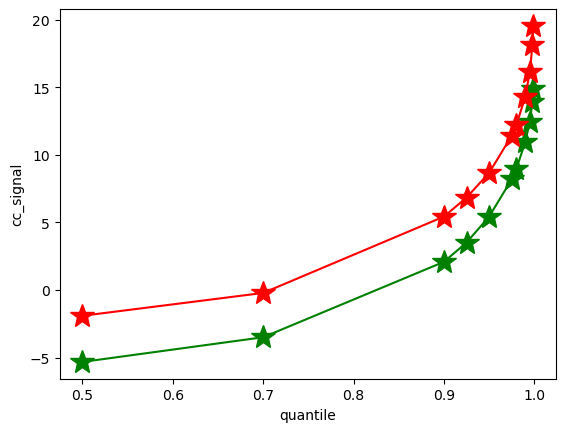

In [54]:
(signal_gan2.sel(quantile=slice(0.5, 0.999)).where(orog > 0, np.nan)).median(["lat", "lon", "GCM","member"]).cc_signal.plot(color ='green', marker ='*', ms =18)
(signal_gan.sel(quantile=slice(0.5, 0.999)).where(orog > 0, np.nan)).mean(["lat", "lon", "GCM","member"]).cc_signal.plot(color ='red', marker ='*', ms =18)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


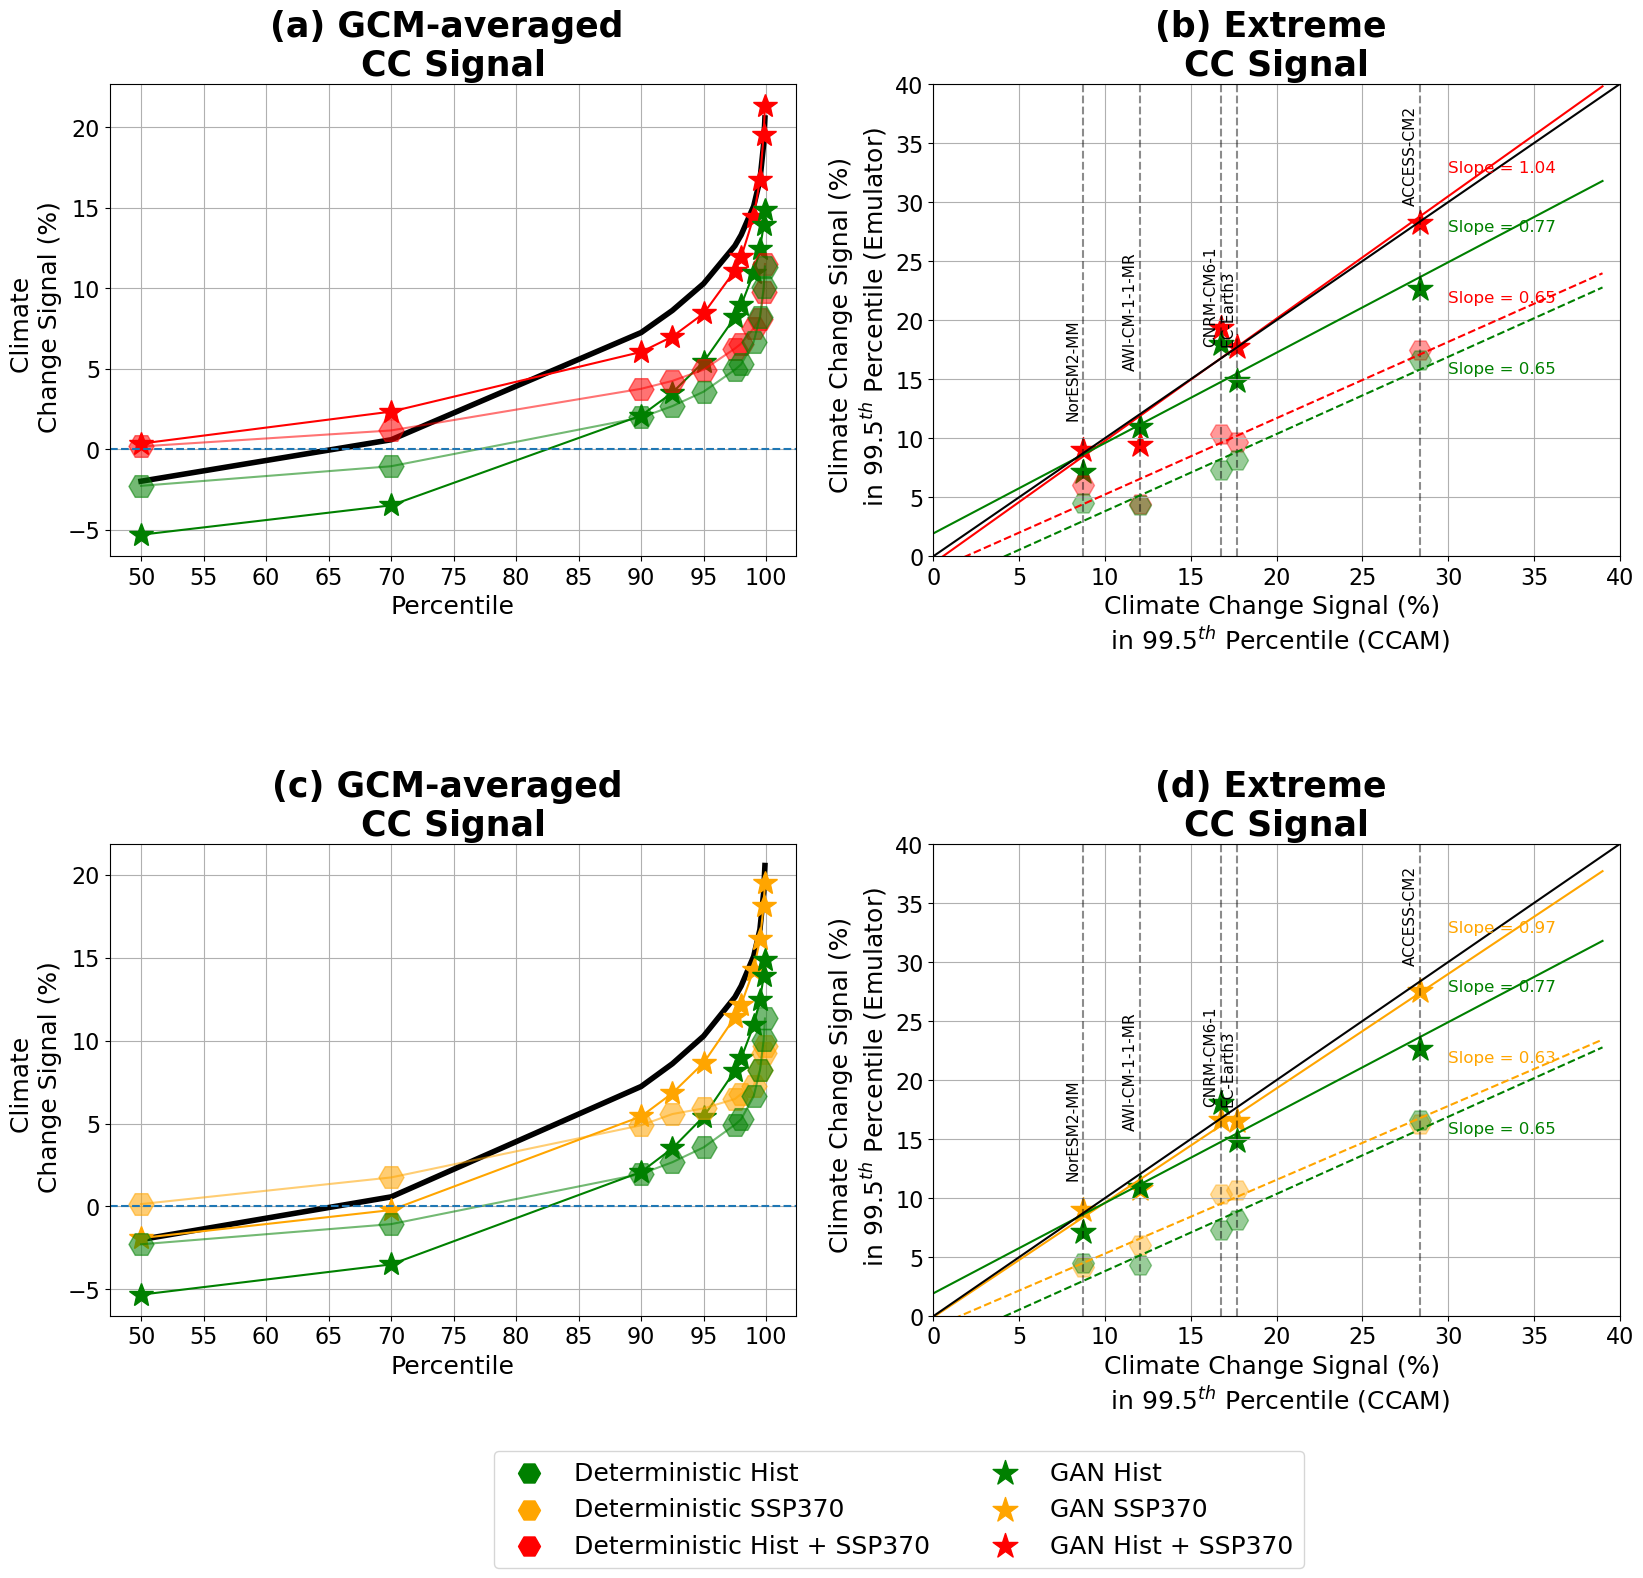

In [108]:

# Create the figure
levels = np.arange(0, 6, 0.1)
fig = plt.figure(figsize=(21, 16))

# Heatmap plots





ax3 = fig.add_subplot(gs[:7 ,7:-1])


#signal_unet = xr.open_dataset(r'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/outputs/Val_metrics/cc_signal/baseline_ACCESS-CM2.nc')
z1 =[]
z2 =[]
z3 = []
z4 = []
z5 =[]
for gcm in signal_gt.GCM.values[:]:
    #fig, ax = plt.subplots()
    signal_unet_future = load_gcm_unet(model_future, gcm)
    signal_unet_hist = load_gcm_unet(model_hist, gcm)
    signal_gan = load_gcm(model_future, gcm)
    signal_gan2 = load_gcm(model_hist, gcm)
    #signal_gan = xr.open_dataset(r'//nesi/project/niwa00018/ML_downscaling_CCAM/multi-variate-gan/outputs/lightweight_access-cm2_multiple_discriminator_v2/CCAM_NIWA-REMS_ACCESS-CM2_hist_ssp370_tasmin.nc')

    z1.append(signal_gan.cc_signal.where(orog > 0, np.nan).mean(["lat", "lon"]).isel(quantile = -4).mean().values)
    z2.append(signal_gan2.cc_signal.where(orog > 0, np.nan).mean(["lat", "lon"]).isel(quantile = -4).mean().values)
    z4.append(signal_unet_future.cc_signal.where(orog > 0, np.nan).mean(["lat", "lon"]).isel(quantile = -4).mean().values)
    z5.append(
        signal_unet_hist.cc_signal.where(orog > 0, np.nan).mean(["lat", "lon"]).isel(quantile = -4).mean().values)
    z3.append(signal_gt.sel(GCM =gcm).cc_signal.where(orog>0, np.nan).mean(["lat","lon"]).isel(quantile = -4).values)
z1 = np.array(z1).ravel()
z2 = np.array(z2).ravel()
z3 = np.array(z3).ravel()
z4 = np.array(z4).ravel()
z5 = np.array(z5).ravel()
from scipy.stats import linregress

ax3.scatter(z3, z1, marker ='*', color ='red', s= 350)
f = linregress(z3, z1)
x_test = np.arange(0, 40
                  )
ax3.plot(x_test, x_test * f.slope + f.intercept, label =f'GAN SSP370 (Slope = {"%.2f" % f.slope})', color ='red', ls ='-')
ax3.text(30, 27.5+5, f'Slope = {"%.2f" % f.slope}', fontsize =12, color ='red')

#
# ax.scatter(z3, z4, marker ='o', color ='orange', s= 50, fc ='white')
# f = linregress(z3, z4)
# x_test = np.arange(5, 30)
# ax.plot(x_test, x_test * f.slope + f.intercept, label =f'y (Hist + Future) = {"%.2f" % f.slope}x + {"%.2f" % f.intercept}x ($\lambda = 0 $)', color ='orange', ls ='--')
#
#
# ax.scatter(z3, z5, marker ='o', color ='g', s= 50, fc ='white')
# f = linregress(z3, z5)
# x_test = np.arange(5, 30)
# ax.plot(x_test, x_test * f.slope + f.intercept, label =f'y (Hist) = {"%.2f" % f.slope}x + {"%.2f" % f.intercept}x ($\lambda = 0 $)', color ='g', ls ='--')


ax3.scatter(z3, z2, color ='green', s= 350, marker ='*')

f = linregress(z3, z2)
ax3.plot(x_test, x_test * f.slope + f.intercept, label =f'GAN Hist (Slope = {"%.2f" % f.slope})', color ='green', ls ='-')
ax3.text(30, 22.5+5, f'Slope = {"%.2f" % f.slope}', fontsize =12, color ='green')
values = [25+5, 11.5+4.5, 13.5+4.5, 15.5+2.5 , 9.25+2.5]
for i,gcm in enumerate(signal_gt.GCM.values[:]):
    ax3.text(z3[i]-1, values[i], str(gcm), fontsize =11, rotation =90, color ='k')
    ax3.axvline(z3[i], color ='k', alpha =0.45, ls ='--')
x_test = np.arange(0, 40)

ax3.grid('on')


ax3.scatter(z3, z4, color ='red', s= 250, marker ='H', alpha =0.4)
f = linregress(z3, z4)
x_test = np.arange(0, 40)
ax3.plot(x_test, x_test * f.slope + f.intercept, label =f'Deterministic SSP370 (Slope = {"%.2f" % f.slope})', color ='red', ls ='--')
ax3.text(30, 16.5+5, f'Slope = {"%.2f" % f.slope}', fontsize =12, color ='red')

ax3.scatter(z3, z5, color ='green', s= 250, marker ='H', alpha =0.4)
f = linregress(z3, z5)
x_test = np.arange(0, 40)
ax3.plot(x_test, x_test * f.slope + f.intercept, label =f'Deterministic Hist (Slope = {"%.2f" % f.slope})', color ='green', ls ='--')
ax3.text(30, 10.5+5, f'Slope = {"%.2f" % f.slope}', fontsize =12, color ='green')

#


ax3.plot([0,40],[0,40], color='k', ls ='-', alpha =0.99, label ='1:1')
#ax3.legend(fontsize =12, fancybox =True)
ax3.set_xlabel('Climate Change Signal (%) \n in 99.5$^{th}$ Percentile (CCAM)',  fontsize =18)
ax3.set_ylabel('Climate Change Signal (%) \n in 99.5$^{th}$ Percentile (Emulator)',  fontsize =18)
ax3.set_xlim(0, 40)
ax3.set_ylim(0, 40)
ax3.tick_params(labelsize=16)
#ax3.text(5, 30.5,'(c)', fontsize =15, weight ='bold')

ax3.set_title('(b) Extreme \nCC Signal', weight ='bold', fontsize = 25)




ax = fig.add_subplot(gs[:7 ,0:6])
signal_unet_hist = []
signal_unet_future = []
signal_gan = []
signal_gan2 = []
for i, gcm in enumerate(signal_gt.GCM.values[:]):

    # Your existing code to load data and plot signals
    # (Assuming the necessary data and variables are defined outside of this code snippet)
    signal_unet_future.append(load_gcm_unet(model_future, gcm).sel(quantile=slice(0.5, None)))
    signal_unet_hist.append(load_gcm_unet(model_hist, gcm).sel(quantile=slice(0.5, None)))
    signal_gan.append(load_gcm(model_future, gcm).sel(quantile=slice(0.5, None)))
    signal_gan2.append(load_gcm(model_hist, gcm).sel(quantile=slice(0.5, None)))
signal_unet_future = xr.concat(signal_unet_future, dim ="GCM")
signal_unet_hist = xr.concat(signal_unet_hist, dim ="GCM")
signal_gan = xr.concat(signal_gan, dim ="GCM")
signal_gan2 = xr.concat(signal_gan2, dim ="GCM")


(signal_gt.sel(quantile=slice(0.5, 0.999)).where(orog > 0, np.nan)).mean(["lat", "lon", "GCM"]).cc_signal.plot(color ='k', lw =4)
#((signal_gt.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).mean(["lat", "lon", "GCM"]) +(signal_gt.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).std(["lat", "lon"]).mean( "GCM")).cc_signal.plot(color ='b')
#((signal_gt.sel(quantile=slice(0.9, None)).whQere(orog > 0, np.nan)).mean(["lat", "lon", "GCM"]) - (signal_gt.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).std(["lat", "lon"]).mean( "GCM")).cc_signal.plot(color ='b')

(signal_gan.sel(quantile=slice(0.5, 0.999)).where(orog > 0, np.nan)).mean(["lat", "lon", "GCM","member"]).cc_signal.plot(color ='red', marker ='*', ms =18)
#((signal_gan.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).mean(["lat", "lon", "GCM","member"]) +(signal_gt.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).std(["lat", "lon"]).mean( "GCM")).cc_signal.plot(color ='r')
#((signal_gan.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).mean(["lat", "lon", "GCM","member"]) - (signal_gt.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).std(["lat", "lon"]).mean( "GCM")).cc_signal.plot(color ='r')


(signal_gan2.sel(quantile=slice(0.5, 0.999)).where(orog > 0, np.nan)).median(["lat", "lon", "GCM","member"]).cc_signal.plot(color ='green', marker ='*', ms =18)
(signal_unet_future.sel(quantile=slice(0.5, 0.999)).where(orog > 0, np.nan)).median(["lat", "lon", "GCM","member"]).cc_signal.plot(color ='red', marker ='H', ms =18, alpha =0.55)
(signal_unet_hist.sel(quantile=slice(0.5, 0.999)).where(orog > 0, np.nan)).mean(["lat", "lon", "GCM","member"]).cc_signal.plot(color ='green', marker ='H', ms =18, alpha =0.55)


ax.grid(True)
ax.axhline(0.0, ls='--')
ax.legend().remove()  # Remove legend from subplots

ax.set_xticks(np.arange(0.5, 1.05, 0.05))
ax.set_xticklabels(["%.0f" % f for f in np.arange(0.5, 1.05, 0.05)*100])
#ax.set_xlabel('', weight ='bold', fontsize =13)
ax.set_ylabel('Climate \n Change Signal (%)', fontsize=18)
ax.set_xlabel('Percentile', fontsize =18)
ax.tick_params(labelsize=16)
ax.set_title('(a) GCM-averaged \nCC Signal', weight ='bold', fontsize = 25)
# handles, labels = ax1.get_legend_handles_labels()
# ax.legend(handles, labels, fontsize =18, loc = 'lower center', ncol =2, fancybox =True, bbox_to_anchor=(1.15, -0.56))



# Create subplots#
#ax3 = plt.subplot(gs[:, :])

ax3 = plt.subplot(gs[11:, 7:-1])

#signal_unet = xr.open_dataset(r'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/outputs/Val_metrics/cc_signal/baseline_ACCESS-CM2.nc')
z1 =[]
z2 =[]
z3 = []
z4 = []
z5 =[]
for gcm in signal_gt.GCM.values[:]:
    #fig, ax = plt.subplots()
    signal_unet_future = load_gcm_unet(model_future_full, gcm)
    signal_unet_hist = load_gcm_unet(model_hist, gcm)
    signal_gan = load_gcm(model_future_full, gcm)
    signal_gan2 = load_gcm(model_hist, gcm)
    #signal_gan = xr.open_dataset(r'//nesi/project/niwa00018/ML_downscaling_CCAM/multi-variate-gan/outputs/lightweight_access-cm2_multiple_discriminator_v2/CCAM_NIWA-REMS_ACCESS-CM2_hist_ssp370_tasmin.nc')

    z1.append(signal_gan.cc_signal.where(orog > 0, np.nan).mean(["lat", "lon"]).isel(quantile = -4).mean().values)
    z2.append(signal_gan2.cc_signal.where(orog > 0, np.nan).mean(["lat", "lon"]).isel(quantile = -4).mean().values)
    z4.append(signal_unet_future.cc_signal.where(orog > 0, np.nan).mean(["lat", "lon"]).isel(quantile = -4).mean().values)
    z5.append(
        signal_unet_hist.cc_signal.where(orog > 0, np.nan).mean(["lat", "lon"]).isel(quantile = -4).mean().values)
    z3.append(signal_gt.sel(GCM =gcm).cc_signal.where(orog>0, np.nan).mean(["lat","lon"]).isel(quantile = -4).values)
z1 = np.array(z1).ravel()
z2 = np.array(z2).ravel()
z3 = np.array(z3).ravel()
z4 = np.array(z4).ravel()
z5 = np.array(z5).ravel()
from scipy.stats import linregress

ax3.scatter(z3, z1, marker ='*', color ='orange', s= 350)
f = linregress(z3, z1)
x_test = np.arange(0, 40
                  )
ax3.plot(x_test, x_test * f.slope + f.intercept, label =f'GAN SSP370 (Slope = {"%.2f" % f.slope})', color ='orange', ls ='-')
ax3.text(30, 27.5+5, f'Slope = {"%.2f" % f.slope}', fontsize =12, color ='orange')

#
# ax.scatter(z3, z4, marker ='o', color ='orange', s= 50, fc ='white')
# f = linregress(z3, z4)
# x_test = np.arange(5, 30)
# ax.plot(x_test, x_test * f.slope + f.intercept, label =f'y (Hist + Future) = {"%.2f" % f.slope}x + {"%.2f" % f.intercept}x ($\lambda = 0 $)', color ='orange', ls ='--')
#
#
# ax.scatter(z3, z5, marker ='o', color ='g', s= 50, fc ='white')
# f = linregress(z3, z5)
# x_test = np.arange(5, 30)
# ax.plot(x_test, x_test * f.slope + f.intercept, label =f'y (Hist) = {"%.2f" % f.slope}x + {"%.2f" % f.intercept}x ($\lambda = 0 $)', color ='g', ls ='--')


ax3.scatter(z3, z2, color ='green', s= 350, marker ='*')

f = linregress(z3, z2)
ax3.plot(x_test, x_test * f.slope + f.intercept, label =f'GAN Hist (Slope = {"%.2f" % f.slope})', color ='green', ls ='-')
ax3.text(30, 22.5+5, f'Slope = {"%.2f" % f.slope}', fontsize =12, color ='green')
values = [25+5, 11.5+4.5, 13.5+4.5, 15.5+2.5 , 9.25+2.5]
for i,gcm in enumerate(signal_gt.GCM.values[:]):
    ax3.text(z3[i]-1, values[i], str(gcm), fontsize =11, rotation =90, color ='k')
    ax3.axvline(z3[i], color ='k', alpha =0.45, ls ='--')
x_test = np.arange(0, 40)

ax3.grid('on')


ax3.scatter(z3, z4, color ='orange', s= 250, marker ='H', alpha =0.4)
f = linregress(z3, z4)
x_test = np.arange(0, 40)
ax3.plot(x_test, x_test * f.slope + f.intercept, label =f'Deterministic SSP370 (Slope = {"%.2f" % f.slope})', color ='orange', ls ='--')
ax3.text(30, 16.5+5, f'Slope = {"%.2f" % f.slope}', fontsize =12, color ='orange')

ax3.scatter(z3, z5, color ='green', s= 250, marker ='H', alpha =0.4)
f = linregress(z3, z5)
x_test = np.arange(0, 40)
ax3.plot(x_test, x_test * f.slope + f.intercept, label =f'Deterministic Hist (Slope = {"%.2f" % f.slope})', color ='green', ls ='--')
ax3.text(30, 10.5+5, f'Slope = {"%.2f" % f.slope}', fontsize =12, color ='green')

#


ax3.plot([0,40],[0,40], color='k', ls ='-', alpha =0.99, label ='1:1')
#ax3.legend(fontsize =12, fancybox =True)
ax3.set_xlabel('Climate Change Signal (%) \n in 99.5$^{th}$ Percentile (CCAM)',  fontsize =18)
ax3.set_ylabel('Climate Change Signal (%) \n in 99.5$^{th}$ Percentile (Emulator)',  fontsize =18)
ax3.set_xlim(0, 40)
ax3.set_ylim(0, 40)
ax3.tick_params(labelsize=16)
#ax3.text(5, 30.5,'(c)', fontsize =15, weight ='bold')

ax3.set_title('(d) Extreme \nCC Signal', weight ='bold', fontsize = 25)





signal_unet_hist = []
signal_unet_future = []
signal_gan = []
signal_gan2 = []
for i, gcm in enumerate(signal_gt.GCM.values[:]):

    # Your existing code to load data and plot signals
    # (Assuming the necessary data and variables are defined outside of this code snippet)
    signal_unet_future.append(load_gcm_unet(model_future_full, gcm).sel(quantile=slice(0.5, None)))
    signal_unet_hist.append(load_gcm_unet(model_hist, gcm).sel(quantile=slice(0.5, None)))
    signal_gan.append(load_gcm(model_future_full, gcm).sel(quantile=slice(0.5, None)))
    signal_gan2.append(load_gcm(model_hist, gcm).sel(quantile=slice(0.5, None)))
signal_unet_future = xr.concat(signal_unet_future, dim ="GCM")
signal_unet_hist = xr.concat(signal_unet_hist, dim ="GCM")
signal_gan = xr.concat(signal_gan, dim ="GCM")
signal_gan2 = xr.concat(signal_gan2, dim ="GCM")


ax = plt.subplot(gs[11:, :6])
(signal_gt.sel(quantile=slice(0.5, 0.999)).where(orog > 0, np.nan)).mean(["lat", "lon", "GCM"]).cc_signal.plot(color ='k', lw =4)
#((signal_gt.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).mean(["lat", "lon", "GCM"]) +(signal_gt.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).std(["lat", "lon"]).mean( "GCM")).cc_signal.plot(color ='b')
#((signal_gt.sel(quantile=slice(0.9, None)).whQere(orog > 0, np.nan)).mean(["lat", "lon", "GCM"]) - (signal_gt.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).std(["lat", "lon"]).mean( "GCM")).cc_signal.plot(color ='b')

(signal_gan.sel(quantile=slice(0.5, 0.999)).where(orog > 0, np.nan)).mean(["lat", "lon", "GCM","member"]).cc_signal.plot(color ='orange', marker ='*', ms =18)
#((signal_gan.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).mean(["lat", "lon", "GCM","member"]) +(signal_gt.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).std(["lat", "lon"]).mean( "GCM")).cc_signal.plot(color ='r')
#((signal_gan.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).mean(["lat", "lon", "GCM","member"]) - (signal_gt.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).std(["lat", "lon"]).mean( "GCM")).cc_signal.plot(color ='r')


(signal_gan2.sel(quantile=slice(0.5, 0.999)).where(orog > 0, np.nan)).median(["lat", "lon", "GCM","member"]).cc_signal.plot(color ='green', marker ='*', ms =18)
(signal_unet_future.sel(quantile=slice(0.5, 0.999)).where(orog > 0, np.nan)).median(["lat", "lon", "GCM","member"]).cc_signal.plot(color ='orange', marker ='H', ms =18, alpha =0.55)
(signal_unet_hist.sel(quantile=slice(0.5, 0.999)).where(orog > 0, np.nan)).mean(["lat", "lon", "GCM","member"]).cc_signal.plot(color ='green', marker ='H', ms =18, alpha =0.55)


ax.grid(True)
ax.axhline(0.0, ls='--')
ax.legend().remove()  # Remove legend from subplots

ax.set_xticks(np.arange(0.5, 1.05, 0.05))
ax.set_xticklabels(["%.0f" % f for f in np.arange(0.5, 1.05, 0.05)*100])
#ax.set_xlabel('', weight ='bold', fontsize =13)
ax.set_ylabel('Climate \n Change Signal (%)', fontsize=18)
ax.set_xlabel('Percentile', fontsize =18)
ax.tick_params(labelsize=16)
ax.set_title('(c) GCM-averaged \nCC Signal', weight ='bold', fontsize = 25)
handles, labels = ax1.get_legend_handles_labels()
ax.legend(handles, labels, fontsize =18, loc = 'lower center', ncol =2, fancybox =True, bbox_to_anchor=(1.15, -0.56))

    # Create a common legend outside of the subplots
#((signal_gan2.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).mean(["lat", "lon", "GCM","member"]) +(signal_gt.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).std(["lat", "lon"]).mean( "GCM")).cc_signal.plot(color ='g')
#((signal_gan2.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).mean(["lat", "lon", "GCM","member"]) - (signal_gt.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).std(["lat", "lon"]).mean( "GCM")).cc_signal.plot(color ='g')
#ax=ax, color='k', label='CCAM', marker='o',)

# fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/figures/all_models_rx3day_eval_0999_actual_qunatiles_land.png', dpi =500,
#             bbox_inches='tight')

#ax3 = plt.subplot(gs[:, 2:], projection=ccrs.PlateCarree(central_longitude=171.77))
fig.savefig('/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/figures/Supp_comparison.png', dpi =500, bbox_inches ='tight')
#fig.savefig('/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/figures/Figure1_FINAL.pdf', dpi =700, bbox_inches ='tight')




In [28]:
(8.130762446222827 +4.517842020539312+5.216620600881805 +6.09066974664269+ 4.88332479433065)/5

5.767843921723457

In [26]:
(9.462869765659626+5.873766282333121+6.540975564555877 +7.3460522056304765+ 6.632737295969996)/5

7.17128022282982

In [103]:
unet_hist.cc_signal

<xarray.DataArray 'cc_signal' (GCM: 5, quantile: 12, member: 1, lat: 172, lon: 179)>
array([[[[[ 7.50253442e+00,  6.53791364e+00,  5.66623688e+00, ...,
            1.31014910e+00,  9.02843642e-01, -1.38475681e-01],
          [ 6.50866206e+00,  6.35164868e+00,  6.28973786e+00, ...,
           -5.01443322e-01, -9.62878266e-01,  9.53850990e-02],
          [ 7.34379622e+00,  6.22120302e+00,  6.08696053e+00, ...,
           -2.07797074e-01,  3.68524077e-01,  4.12978642e-01],
          ...,
          [-6.41926991e+00, -1.82681385e+00, -5.97993216e+00, ...,
           -1.36213514e+01, -1.38093178e+01, -1.46650098e+01],
          [-5.08752894e+00, -3.58268549e+00, -4.67993444e+00, ...,
           -1.48589395e+01, -1.42948293e+01, -1.34292813e+01],
          [-4.94171578e+00, -3.23278730e+00, -1.19105332e+00, ...,
           -1.72464359e+01, -1.45245723e+01, -1.60915994e+01]]],


        [[[ 1.16023003e+01,  1.03950580e+01,  1.06413841e+01, ...,
            6.74861202e+00,  6.78870367e+00,  5.72803259e+00],
          [ 1.09978753e+01,  1.19794440e+01,  1.01499280e+01, ...,
            6.67611836e+00,  6.41943278e+00,  5.73964540e+00],
          [ 1.08838531e+01,  9.96280116e+00,  1.05111141e+01, ...,
...
           -2.96724605e+00, -1.47564251e+01, -1.32196131e+01],
          [ 1.57057749e+01,  3.68151812e+01,  1.79982276e+01, ...,
           -5.28232137e+00, -1.80347260e+01, -1.53931894e+01],
          [ 1.04257376e+01,  3.34331890e+01,  1.91793376e+01, ...,
           -1.25072558e+01, -2.34192893e+01, -2.24424349e+01]]],


        [[[ 1.00332141e+01,  2.23183193e+01,  2.91172777e+01, ...,
            9.05011930e+00,  1.12752383e+01,  6.25894746e+00],
          [ 1.43681468e+01,  1.16344886e+01,  1.66307815e+01, ...,
            5.94348454e+00,  1.00821394e+01,  1.41226477e+01],
          [ 1.62433845e+01,  1.17936540e+01,  3.40313158e+00, ...,
            7.24574958e+00,  6.95933105e+00,  9.99688850e+00],
          ...,
          [ 1.51737517e-01,  1.76683101e+01, -1.11453500e+01, ...,
           -2.18295190e+01, -2.30043790e+01, -1.41962369e+01],
          [-1.74319691e+00,  1.59947962e+01, -1.42185685e+01, ...,
           -2.05941790e+01, -2.31899283e+01, -2.23073586e+01],
          [-3.33566846e+00,  1.43859849e+01, -1.58409473e+01, ...,
           -1.38806017e+01, -2.78619294e+01, -3.11492605e+01]]]]])
Coordinates:
  * lon       (lon) float32 164.9 165.0 165.1 165.2 ... 183.6 183.7 183.9 184.0
  * lat       (lat) float32 -51.21 -51.11 -51.0 -50.89 ... -33.07 -32.97 -32.86
  * quantile  (quantile) float64 0.5 0.7 0.9 0.925 ... 0.995 0.998 0.999 0.9999
  * GCM       (GCM) <U13 'ACCESS-CM2' 'AWI-CM-1-1-MR' ... 'NorESM2-MM'
Dimensions without coordinates: member

In [14]:
def get_subplots():
    
    fig = plt.figure(figsize=(24, 40))
    gs = GridSpec(72, 14)

# Heatmap plots

# Additional plots
    base = 34
    ax3 = fig.add_subplot(gs[12:24, :3], projection = ccrs.PlateCarree(central_longitude = 171.77))
    ax4 = fig.add_subplot(gs[12:24, 3:6], projection = ccrs.PlateCarree(central_longitude = 171.77))
    ax5 = fig.add_subplot(gs[12:24, 6:9], projection = ccrs.PlateCarree(central_longitude = 171.77))
    #ax5 = fig.add_subplot(gs[15:25, 7:], projection = ccrs.PlateCarree(central_longitude = 171.77))

    ax9 = fig.add_subplot(gs[25:base+1, :3], projection = ccrs.PlateCarree(central_longitude = 171.77))
    ax10 = fig.add_subplot(gs[25:base+1, 3:6], projection = ccrs.PlateCarree(central_longitude = 171.77))
    ax10_b = fig.add_subplot(gs[25:base+1, 6:9], projection = ccrs.PlateCarree(central_longitude = 171.77))
    ax11 = fig.add_subplot(gs[15:35, 9:13], projection = ccrs.PlateCarree(central_longitude = 171.77))
    axesa = [ax3, ax4, ax5,ax9, ax10, ax10_b, ax11]
    ax11 = fig.add_subplot(gs[12+base-2:24+base-2, :3], projection = ccrs.PlateCarree(central_longitude = 171.77))
    ax21= fig.add_subplot(gs[12+base-2:24+base-2, 3:6], projection = ccrs.PlateCarree(central_longitude = 171.77))
    ax22 = fig.add_subplot(gs[12+base-2:24+base-2, 6:9], projection = ccrs.PlateCarree(central_longitude = 171.77))
    #ax5 = fig.add_subplot(gs[15:25, 7:], projection = ccrs.PlateCarree(central_longitude = 171.77))

    ax31 = fig.add_subplot(gs[23+base-2:-3, :3], projection = ccrs.PlateCarree(central_longitude = 171.77))
    ax41 = fig.add_subplot(gs[23+base-2:-3, 3:6], projection = ccrs.PlateCarree(central_longitude = 171.77))
    ax42 = fig.add_subplot(gs[23+base-2:-3, 6:9], projection = ccrs.PlateCarree(central_longitude = 171.77))
    ax51 = fig.add_subplot(gs[14+base-2:34+base, 9:13], projection = ccrs.PlateCarree(central_longitude = 171.77))
    ax7 = fig.add_subplot(gs[-1, :14])
    axesb = [ax11, ax21, ax22,ax31, ax41, ax42, ax51, ax7]

    return fig, axesa, axesb
    
    

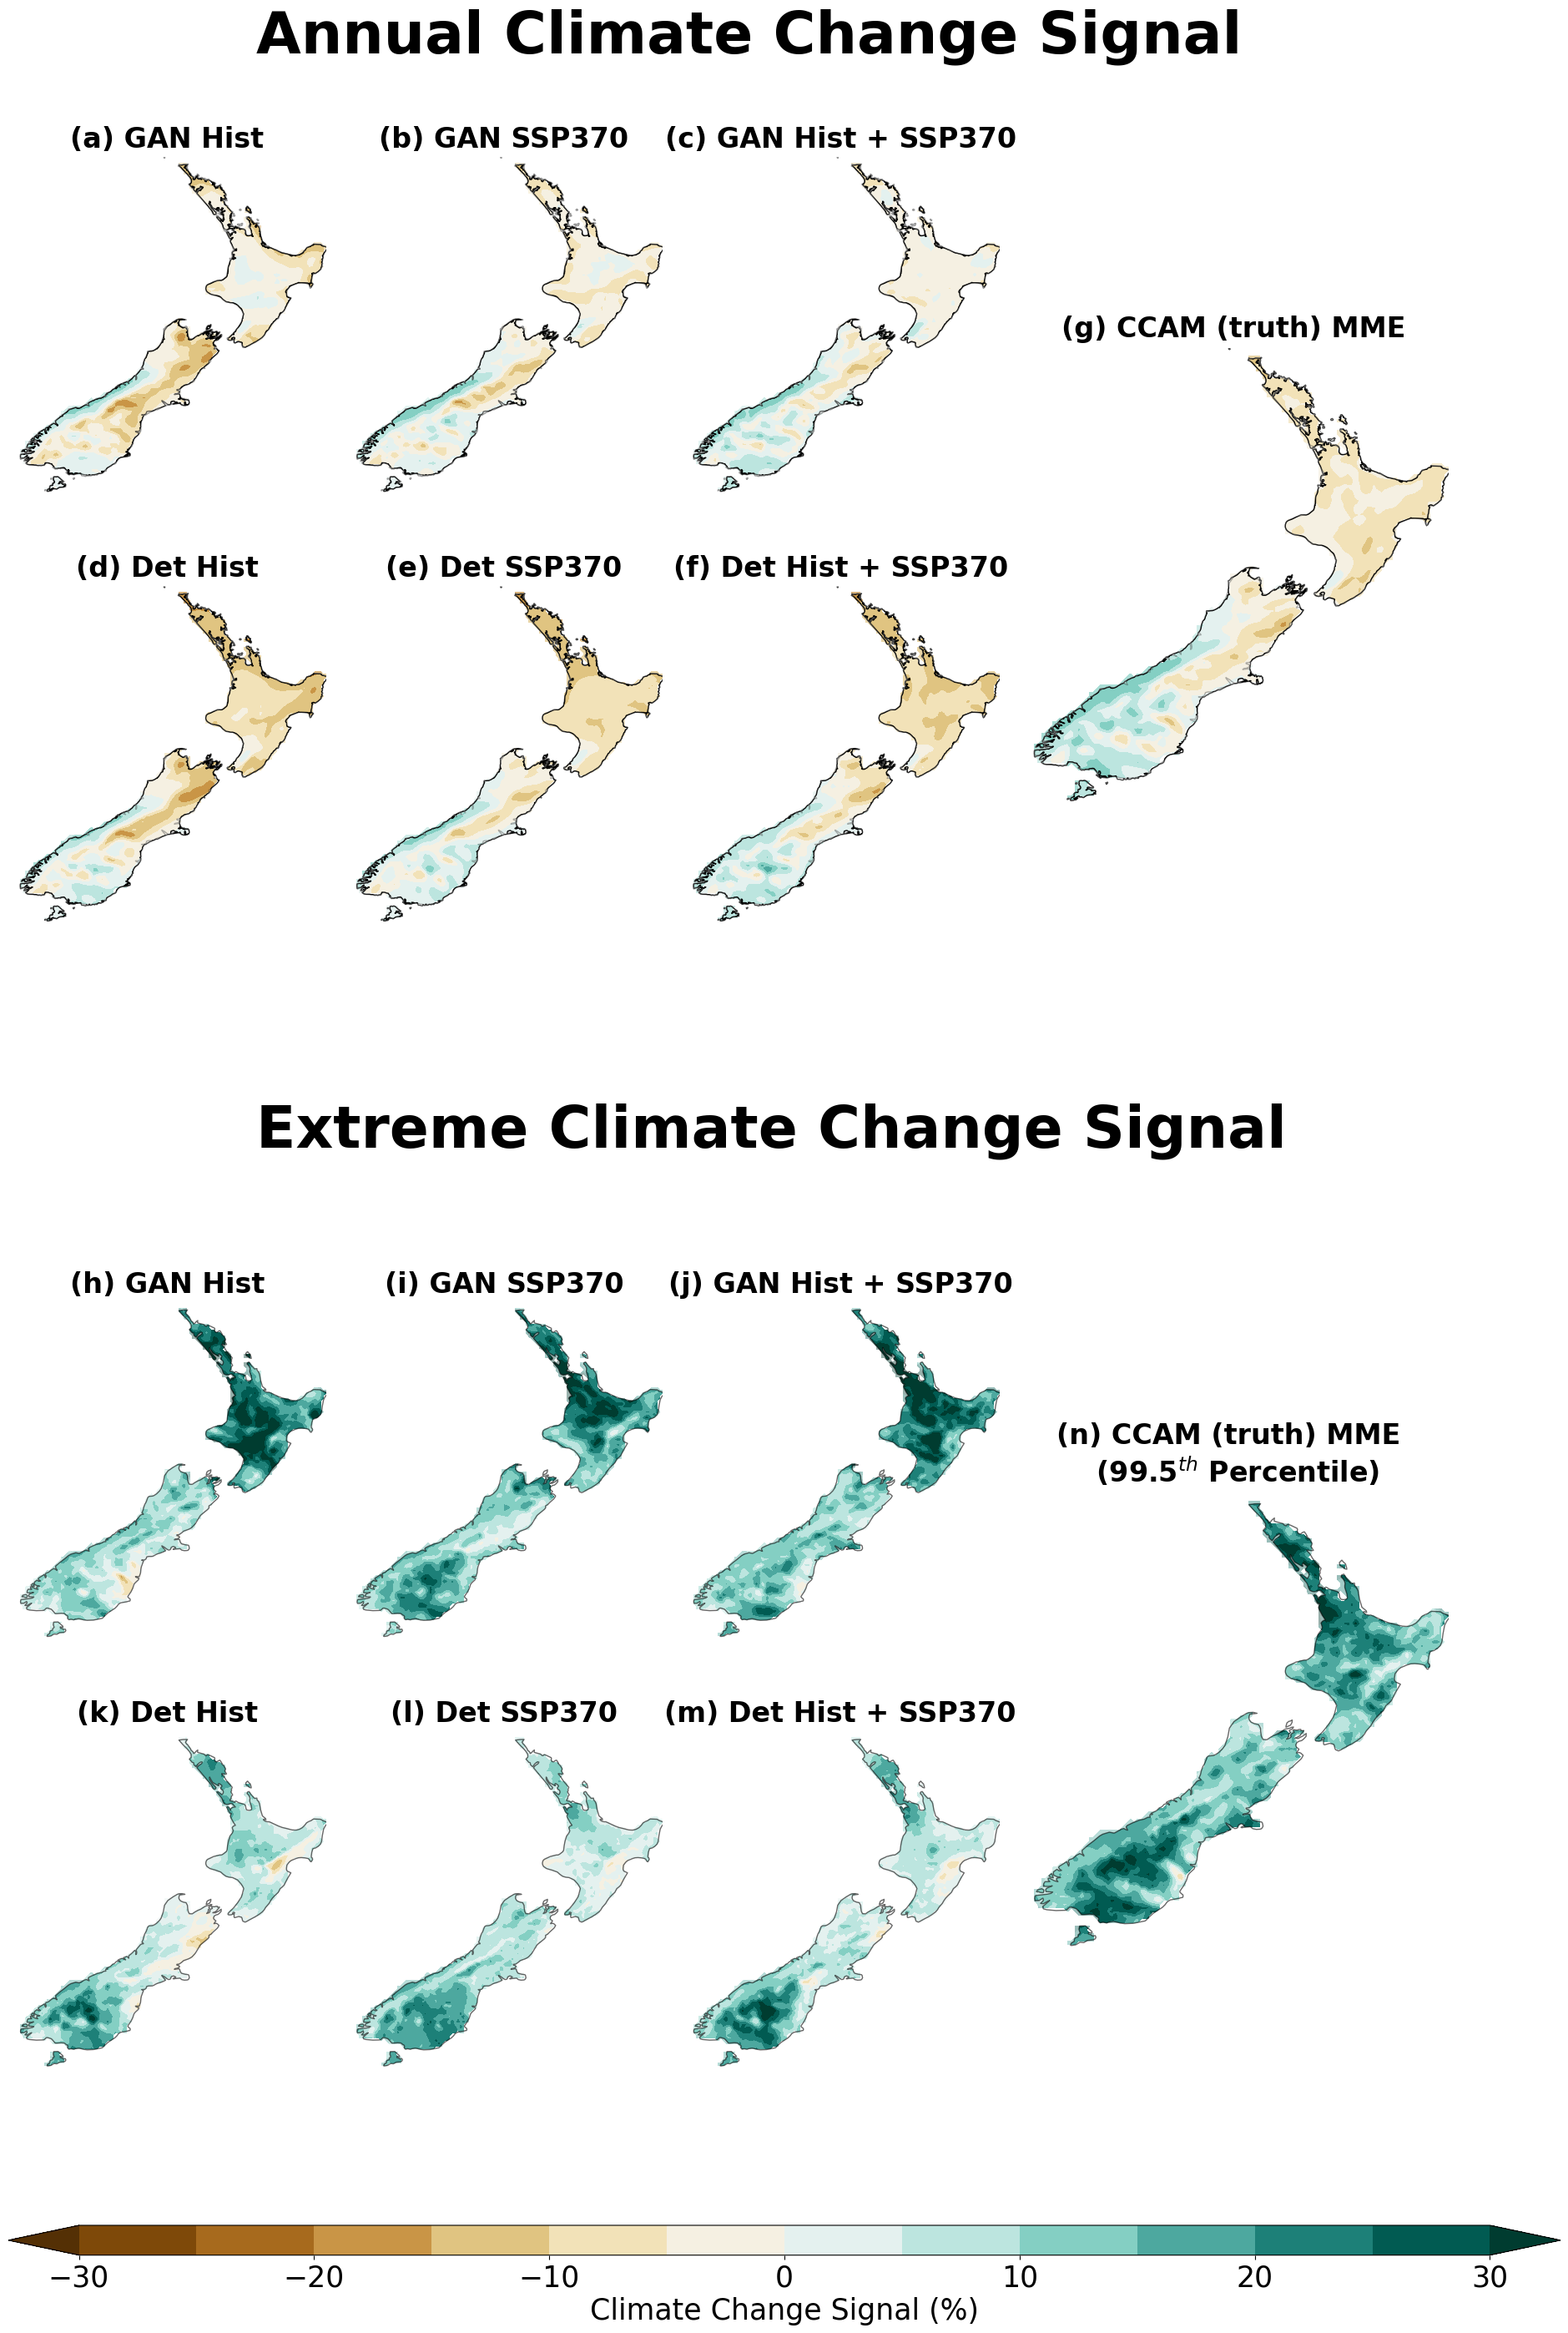

In [20]:
fig, axesa, axesb = get_subplots()
ax3, ax4, ax5,ax9, ax10, ax10_b, ax11 = axesa
levels = np.arange(-30, 35, 5)
gan_hist.seas_cc_signal.mean("GCM").mean("season").mean("member").where(orog>0, np.nan).plot.contourf(ax=ax3, cmap='BrBG', add_colorbar =False, levels = levels, extend = 'both', transform = ccrs.PlateCarree())
cs1 = gan_future.seas_cc_signal.mean("GCM").mean("season").mean("member").where(orog>0, np.nan).plot.contourf(ax=ax5, cmap='BrBG', add_colorbar =False, levels = levels, extend = 'both', transform = ccrs.PlateCarree())
(signal_gt.seas_cc_signal).mean("GCM").mean("season").where(orog>0, np.nan).plot.contourf(ax=ax11,  cmap='BrBG', add_colorbar =False, levels =levels, extend = 'both', transform = ccrs.PlateCarree())
#ax44 = fig.add_axes([0.1, 0.05, 0.8, 0.03])
cs2 = gan_future_full.seas_cc_signal.mean("GCM").mean("season").mean("member").where(orog>0, np.nan).plot.contourf(ax=ax4, cmap='BrBG', add_colorbar =False, levels = levels, extend = 'both', transform = ccrs.PlateCarree())

#cbar2 = fig.colorbar(cs1, cax = ax7, orientation = 'horizontal')
#cbar2.set_label('Climate Change Signal (%)', fontsize = 22)
#cbar2.ax.tick_params(labelsize = 15)
for axes in [ax3, ax4, ax5]:
    axes.coastlines('10m')
    axes.set_extent([166, 178.5, -47.5, -34], crs=ccrs.PlateCarree())
    #ax.coastlines('10m')
    axes.add_feature(cfeature.OCEAN.with_scale('50m'), facecolor ='white', alpha =0.6,zorder =13, ec ='k')
    axes.axis('off')
ax3.set_title('(a) GAN Hist', weight ='bold', fontsize =24)
ax4.set_title('(b) GAN SSP370', weight ='bold', fontsize =24)
ax5.set_title('(c) GAN Hist + SSP370', weight ='bold', fontsize =24)
#ax5.set_title('(e) Ground Truth CNRM-CM6-1', weight ='bold', fontsize =15)
#ax3.text(161.5, -45, '  JJA Climate \nChange Signal', fontsize =20, weight ='bold', transform = ccrs.PlateCarree(), rotation =90)


ax4.text(162.5, -30, 'Annual Climate Change Signal', weight ='bold', transform = ccrs.PlateCarree(), fontsize =50)

unet_hist.seas_cc_signal.mean("GCM").mean("season").where(orog>0, np.nan).mean("member").plot.contourf(ax=ax9, cmap='BrBG', add_colorbar =False, levels = levels, extend = 'both', transform = ccrs.PlateCarree())
cs1 = unet_future.seas_cc_signal.mean("GCM").mean("season").where(orog>0, np.nan).mean("member").plot.contourf(ax=ax10_b, cmap='BrBG', add_colorbar =False, levels = levels, extend = 'both', transform = ccrs.PlateCarree())
cs11 = unet_future_full.seas_cc_signal.mean("GCM").mean("season").where(orog>0, np.nan).mean("member").plot.contourf(ax=ax10, cmap='BrBG', add_colorbar =False, levels = levels, extend = 'both', transform = ccrs.PlateCarree())



for axes in [ax9, ax10, ax11, ax10_b]:
    axes.coastlines('10m')
    axes.set_extent([166, 178.5, -47.5, -34], crs=ccrs.PlateCarree())
    #ax.coastlines('10m')
    axes.add_feature(cfeature.OCEAN.with_scale('50m'), facecolor ='white', alpha =0.3,zorder =13, ec ='k')
    axes.axis('off')

ax9.set_title('(d) Det Hist', weight ='bold', fontsize =24)
ax10.set_title('(e) Det SSP370', weight ='bold', fontsize =24)
ax10_b.set_title('(f) Det Hist + SSP370', weight ='bold', fontsize =24)
ax11.set_title(f'(g) CCAM (truth) MME', weight ='bold', fontsize =24)
#ax55 = fig.add_axes([0.9, 0.5, 0.02, 0.4])
#ax9.text(161.5, -45, '  DJF Climate \nChange Signal', fontsize =20, weight ='bold', transform = ccrs.PlateCarree(), rotation =90)

# Add colorbar manually

ax1.tick_params(labelsize =14)

[ax11, ax21, ax22,ax31, ax41, ax42, ax51, ax7] = axesb
ax21.text(162.5, -28, 'Extreme Climate Change Signal', weight ='bold', transform = ccrs.PlateCarree(), fontsize =50)
unet_future.cc_signal.isel(quantile=-4).mean("member").mean("GCM").where(orog > 0, np.nan).clip(-35, 35).plot.contourf( cmap='BrBG', ax=ax42, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels,extend ='both' )
unet_future_full.cc_signal.isel(quantile=-4).mean("member").mean("GCM").where(orog > 0, np.nan).clip(-35, 35).plot.contourf( cmap='BrBG', ax=ax41, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels,extend ='both' )

unet_hist.cc_signal.isel(quantile=-4).mean("GCM").mean("member").where(orog > 0, np.nan).clip(-35, 35).plot.contourf(cmap='BrBG', ax=ax31, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels, extend ='both' , )
gan_future.cc_signal.isel(quantile=-4).mean("GCM").mean("member").where(orog > 0, np.nan).clip(-35, 35).plot.contourf(cmap='BrBG', ax=ax22, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels,extend ='both' )
gan_hist.cc_signal.isel(quantile=-4).mean("GCM").mean("member").where(orog > 0, np.nan).clip(-35, 35).plot.contourf(cmap='BrBG', ax=ax11, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels, extend ='both')
cs1 = signal_gt.isel(quantile=-4).mean("GCM").cc_signal.where(orog > 0, np.nan).clip(-35, 35).plot.contourf(cmap='BrBG', ax=ax51, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels,extend ='both' )
gan_future_full.isel(quantile=-4).mean("GCM").cc_signal.mean("member").where(orog > 0, np.nan).clip(-35, 35).plot.contourf(cmap='BrBG', ax=ax21, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels,extend ='both' )

# Set extent for first four subplots
for ax in [ax11, ax21, ax31, ax41, ax51, ax42, ax22]:
    ax.set_extent([166, 178.5, -47.5, -34], crs=ccrs.PlateCarree())
    #ax.coastlines('10m')
    ax.add_feature(cfeature.OCEAN.with_scale('50m'), facecolor ='white', alpha =0.6,zorder =13, ec ='k')
    ax.axis('off')
    ax.set_title('')
ax42.set_title('(m) Det Hist + SSP370', weight ='bold', fontsize =24)
ax41.set_title('(l) Det SSP370', weight ='bold', fontsize =24)
ax31.set_title('(k) Det Hist', weight ='bold', fontsize =24)
ax22.set_title('(j) GAN Hist + SSP370', weight ='bold', fontsize =24)
ax21.set_title('(i) GAN SSP370', weight ='bold', fontsize =24)
ax11.set_title('(h) GAN Hist', weight ='bold', fontsize =24)
ax51.set_title('(n) CCAM (truth) MME \n (99.5$^{th}$ Percentile)', weight ='bold', fontsize =24)
cbar = fig.colorbar(cs1, cax = ax7, orientation ='horizontal')
cbar.set_label('Climate Change Signal (%)', fontsize =25)
cbar.ax.tick_params(labelsize =25)
#fig.tight_layout()
fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/figures/Figure2_FINAL.pdf', dpi =700, bbox_inches ='tight')
fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/figures/Figure2_FINAL.png', dpi =700, bbox_inches ='tight')
        

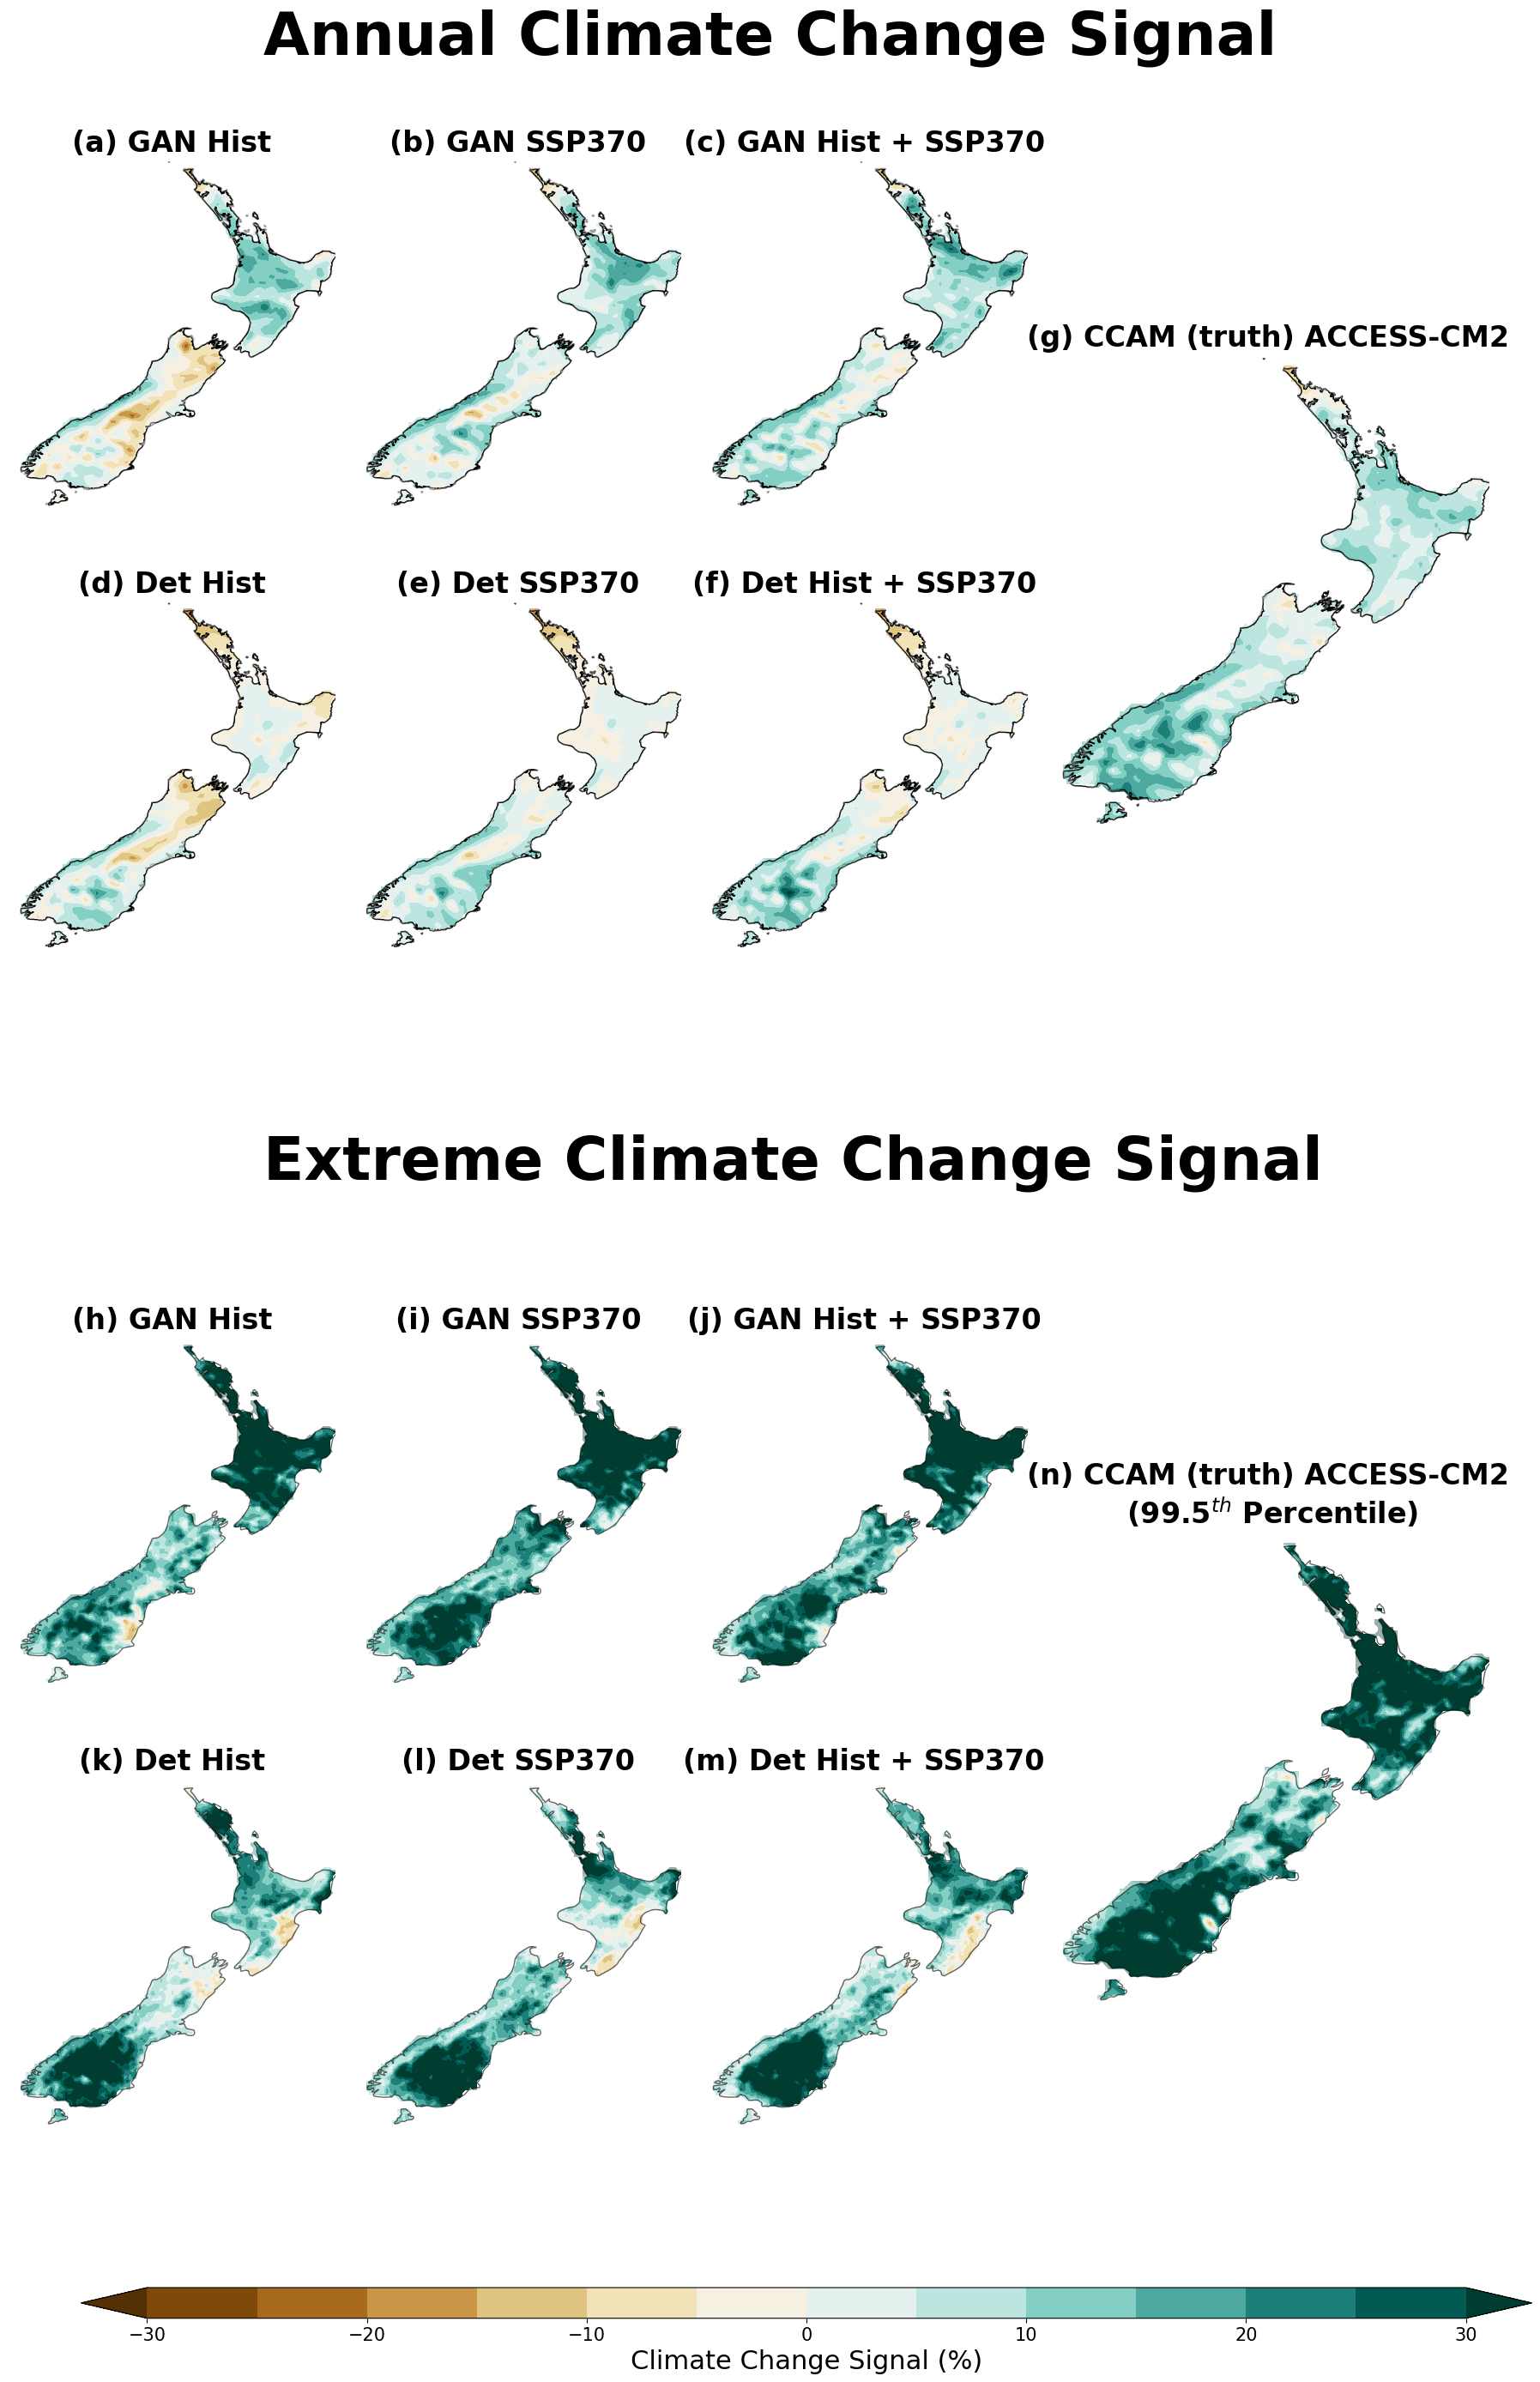

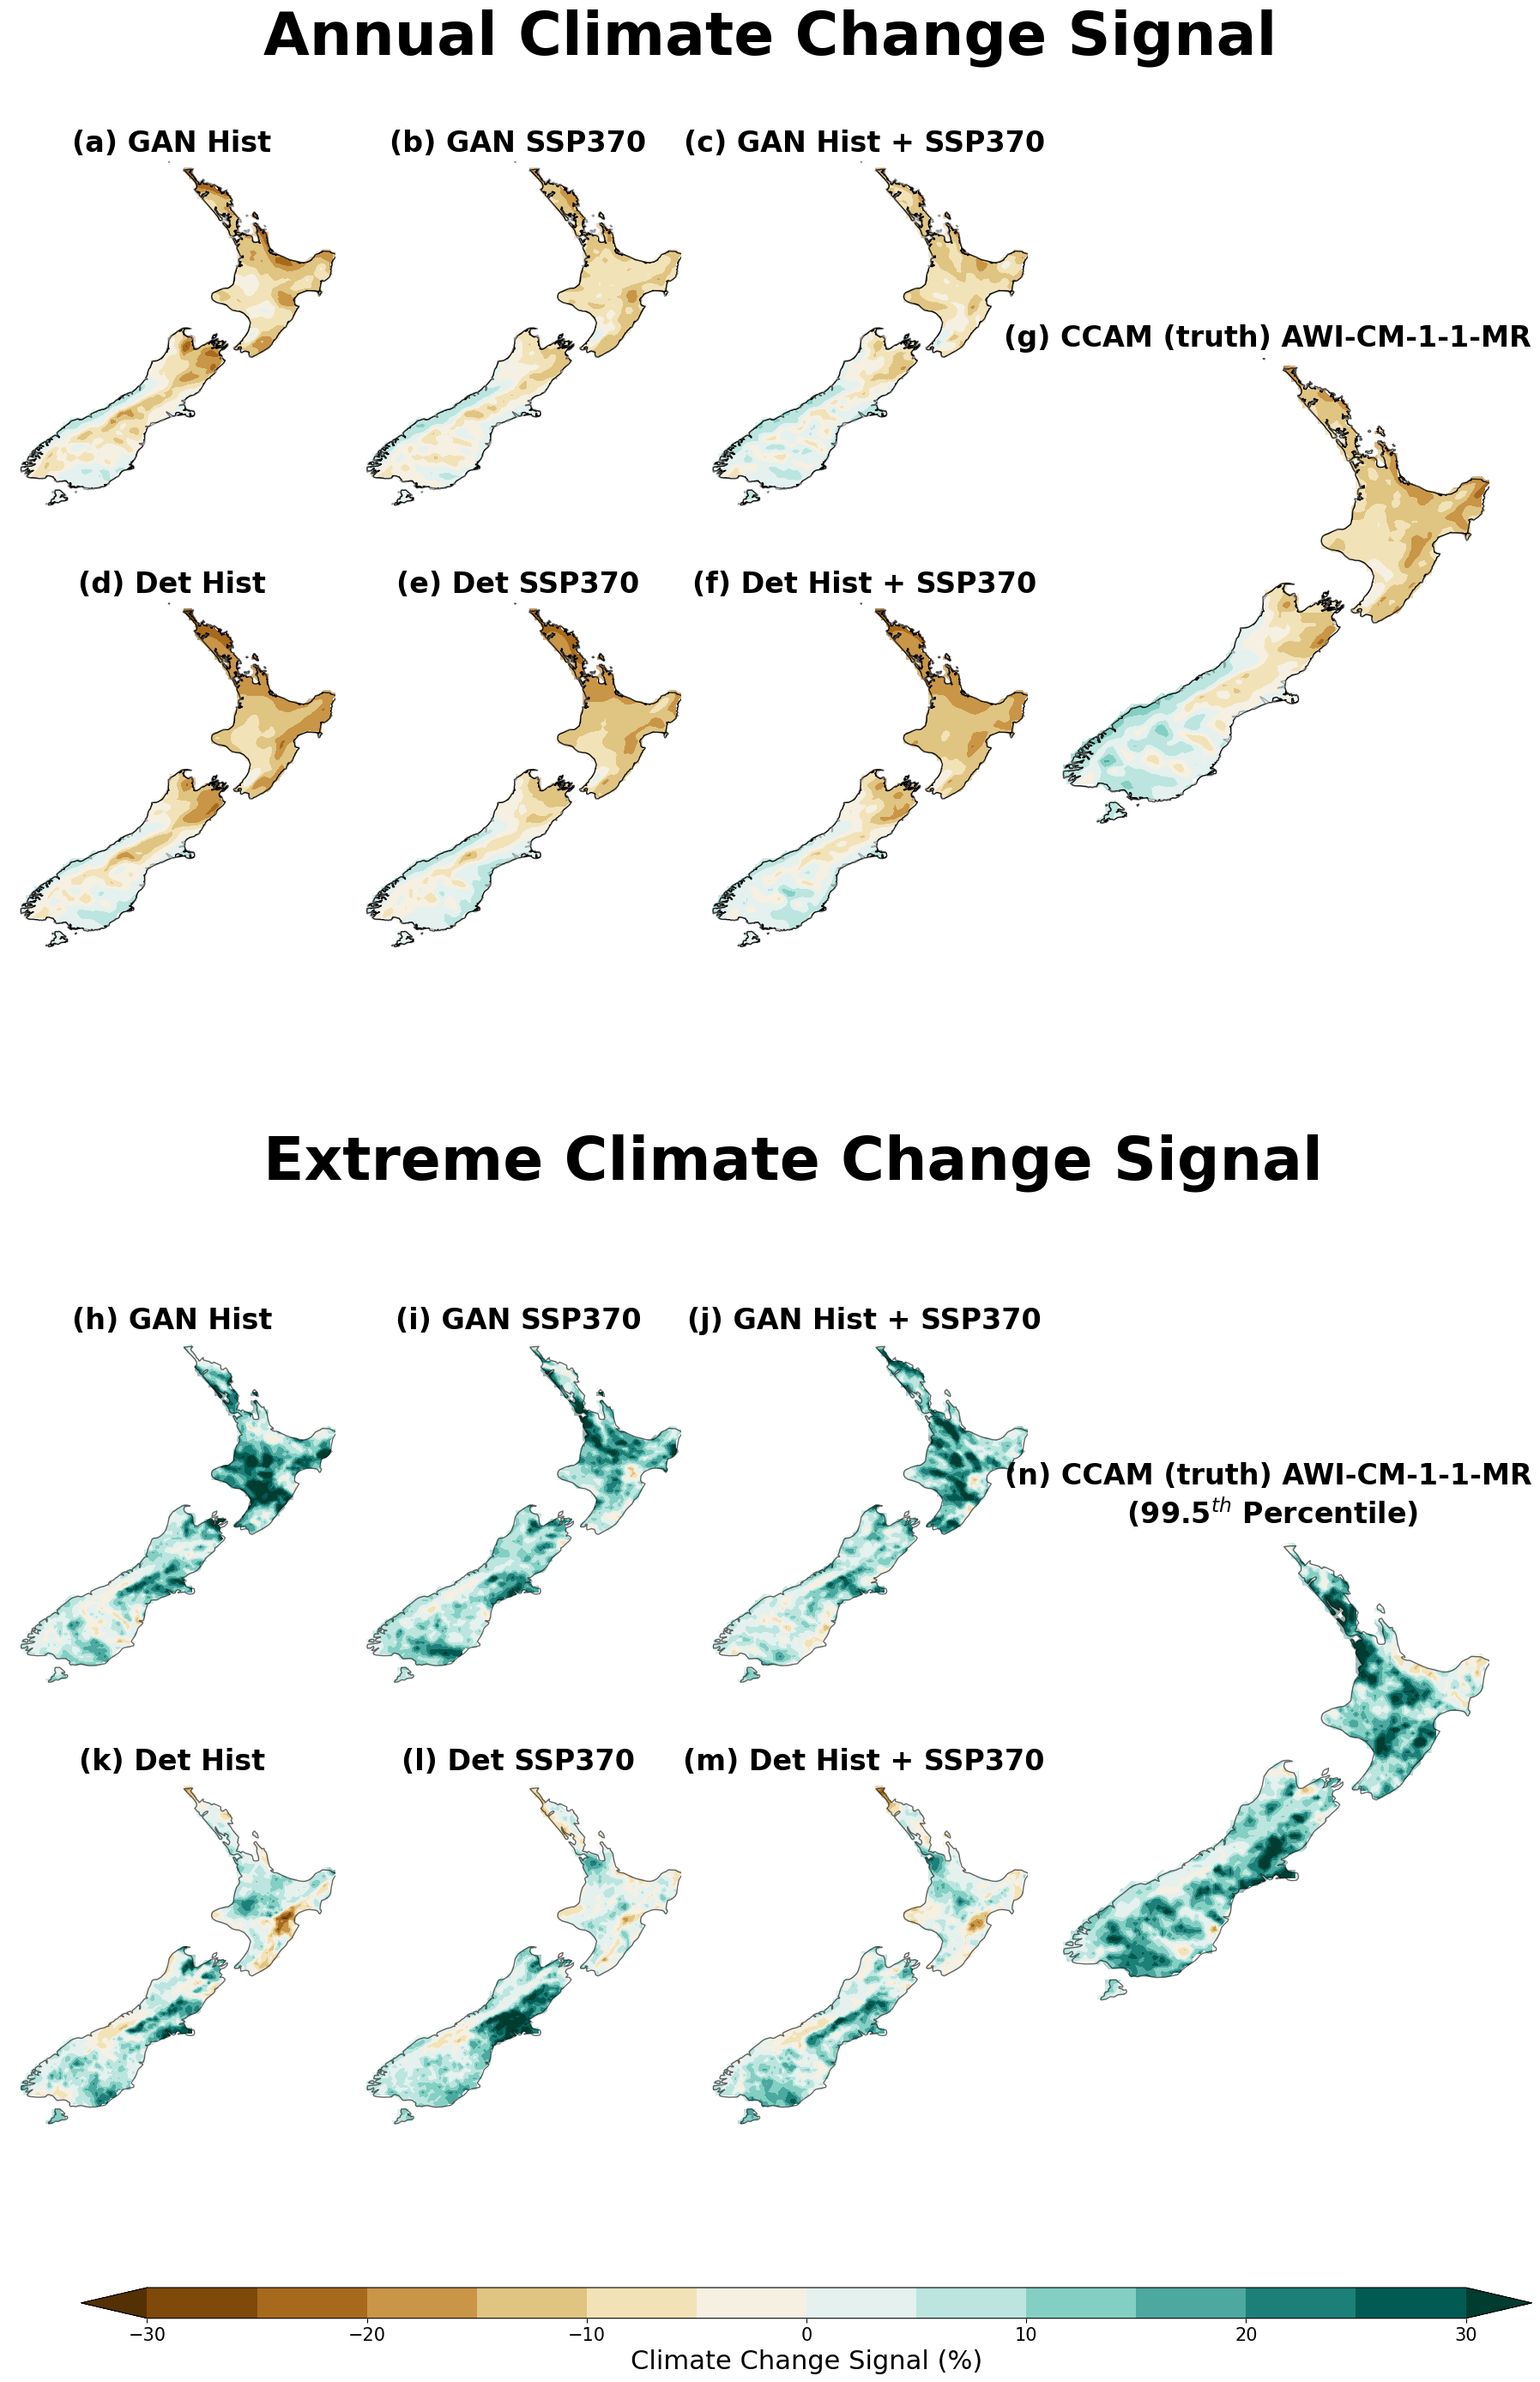

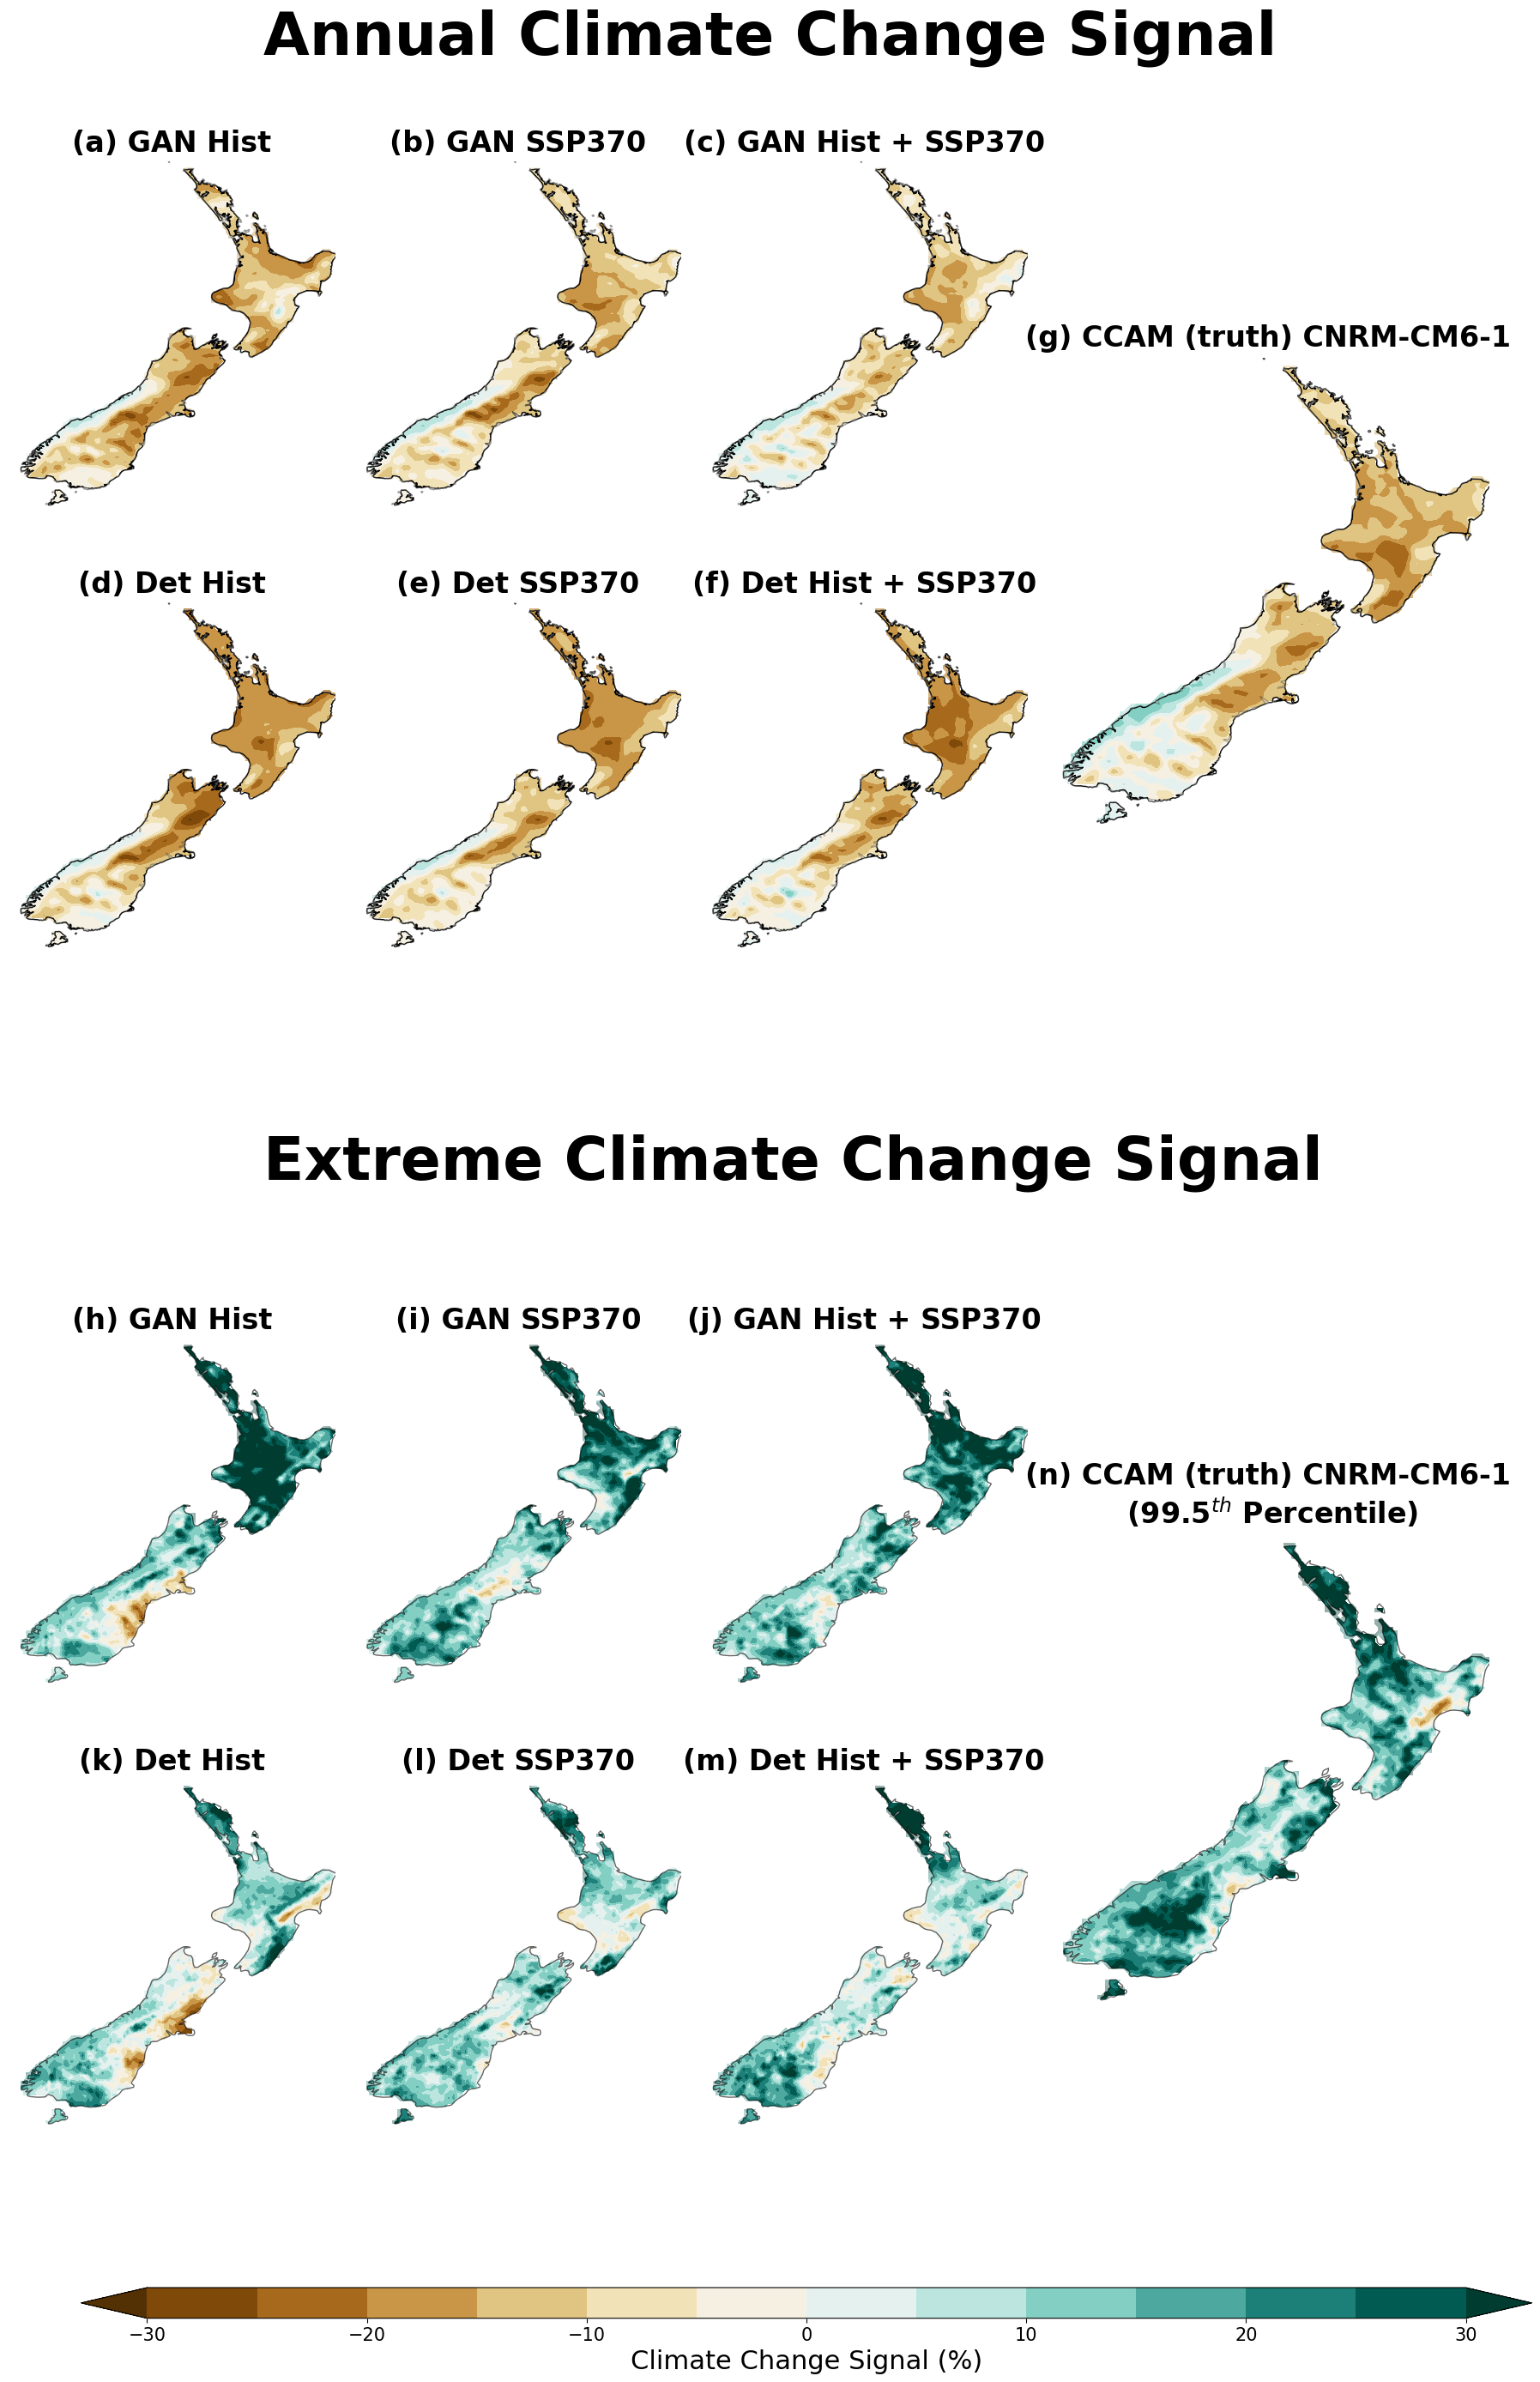

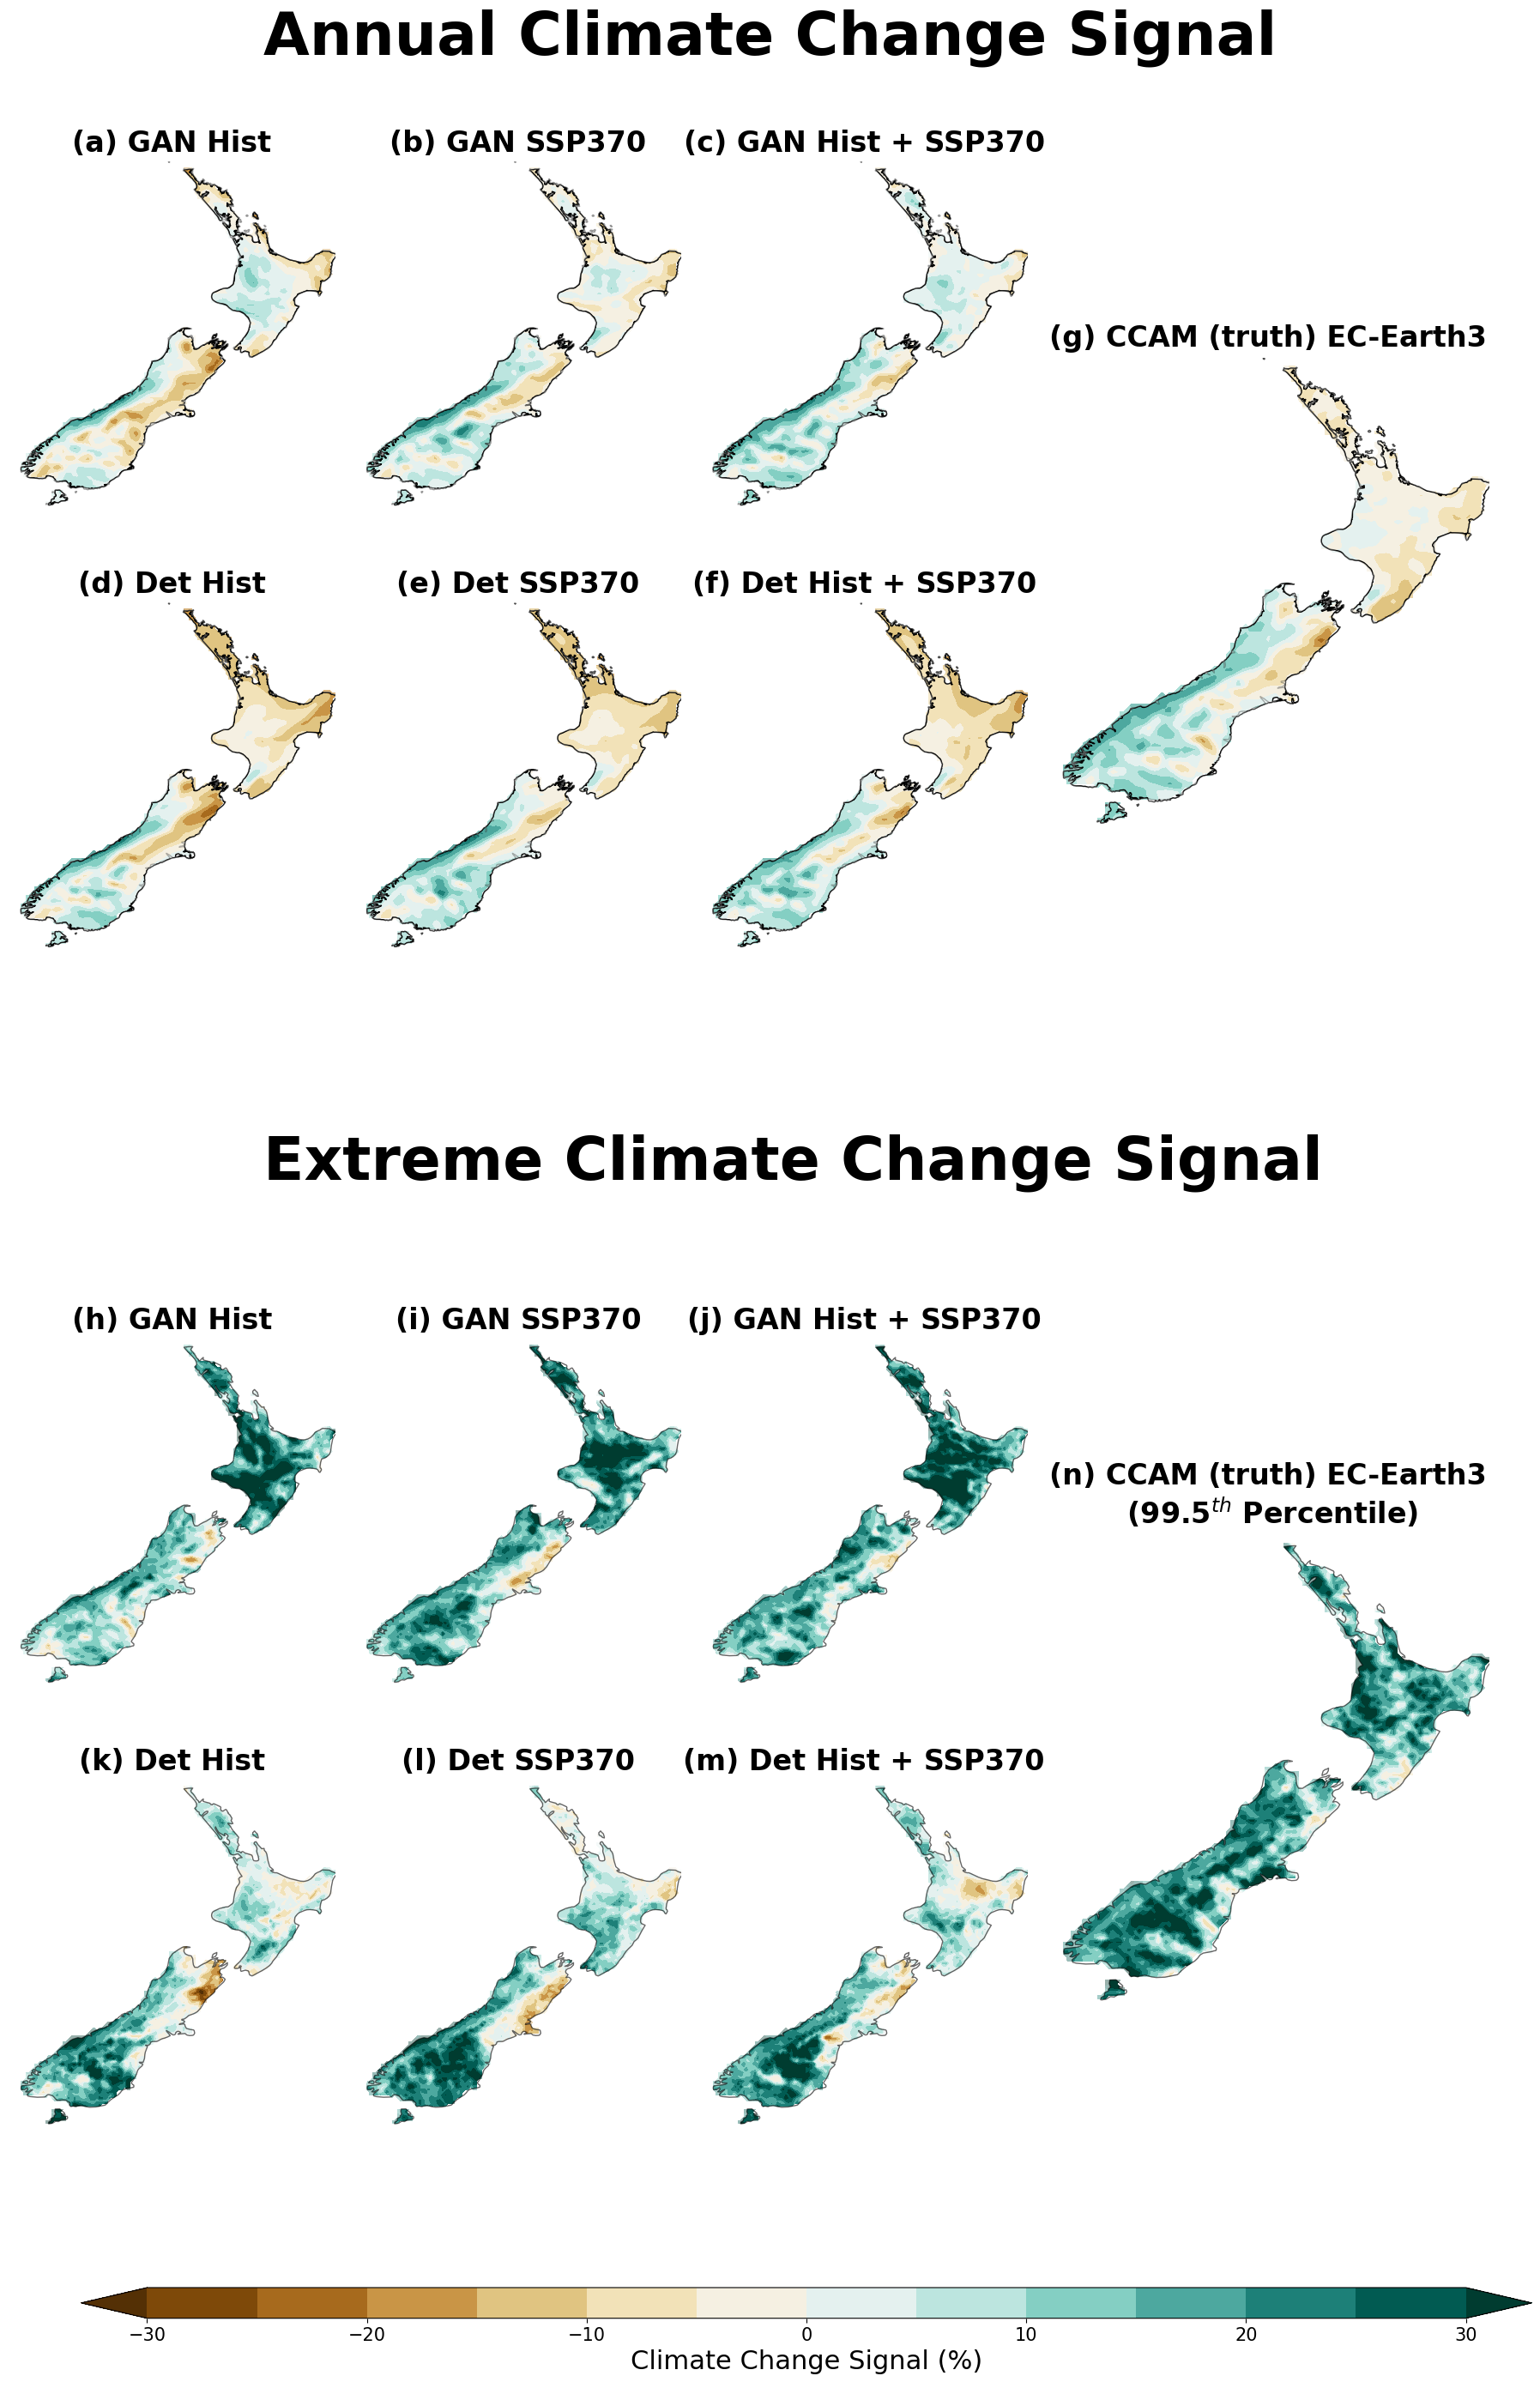

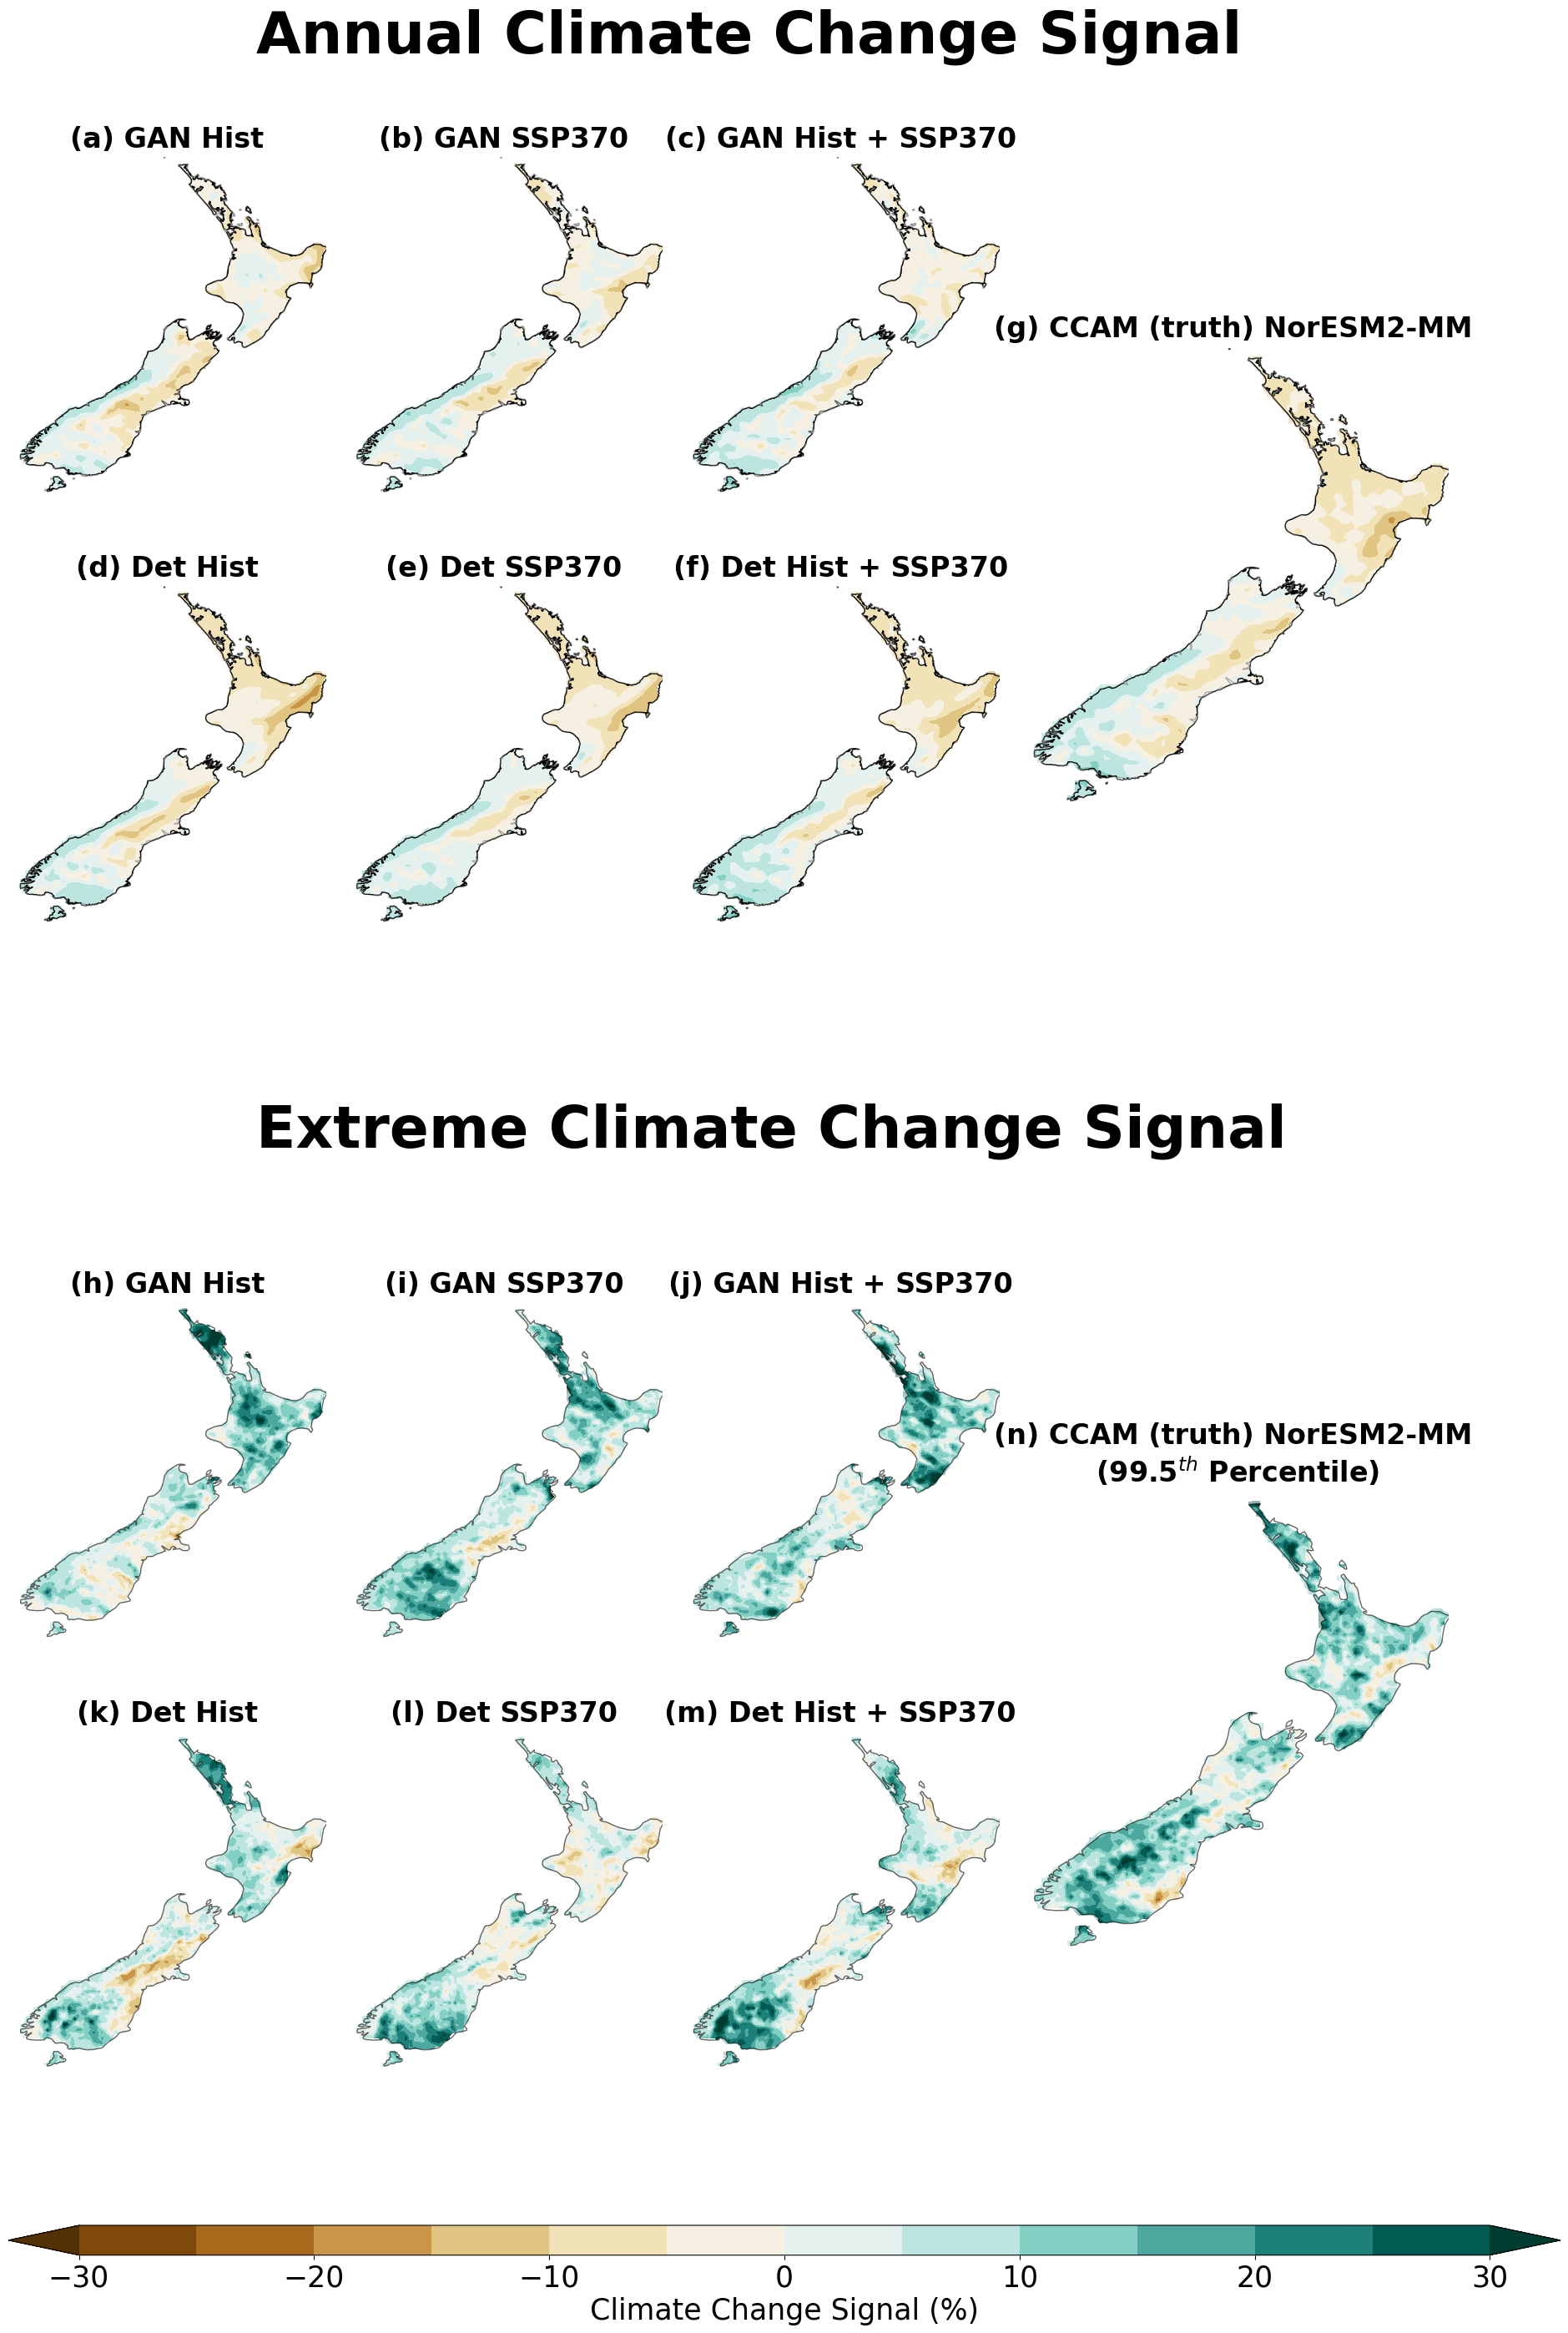

In [21]:
for gcm in gan_future_full.GCM.values:
    fig, axesa, axesb = get_subplots()
    ax3, ax4, ax5,ax9, ax10, ax10_b, ax11 = axesa
    levels = np.arange(-30, 35, 5)
    gan_hist.seas_cc_signal.sel(GCM =gcm).mean("season").mean("member").where(orog>0, np.nan).plot.contourf(ax=ax3, cmap='BrBG', add_colorbar =False, levels = levels, extend = 'both', transform = ccrs.PlateCarree())
    cs1 = gan_future.seas_cc_signal.sel(GCM =gcm).mean("season").mean("member").where(orog>0, np.nan).plot.contourf(ax=ax5, cmap='BrBG', add_colorbar =False, levels = levels, extend = 'both', transform = ccrs.PlateCarree())
    (signal_gt.seas_cc_signal).sel(GCM =gcm).mean("season").where(orog>0, np.nan).plot.contourf(ax=ax11,  cmap='BrBG', add_colorbar =False, levels =levels, extend = 'both', transform = ccrs.PlateCarree())
    #ax44 = fig.add_axes([0.1, 0.05, 0.8, 0.03])
    cs2 = gan_future_full.seas_cc_signal.sel(GCM =gcm).mean("season").mean("member").where(orog>0, np.nan).plot.contourf(ax=ax4, cmap='BrBG', add_colorbar =False, levels = levels, extend = 'both', transform = ccrs.PlateCarree())

    cbar2 = fig.colorbar(cs1, cax = ax7, orientation = 'horizontal')
    cbar2.set_label('Climate Change Signal (%)', fontsize = 22)
    cbar2.ax.tick_params(labelsize = 15)
    for axes in [ax3, ax4, ax5]:
        axes.coastlines('10m')
        axes.set_extent([166, 178.5, -47.5, -34], crs=ccrs.PlateCarree())
        #ax.coastlines('10m')
        axes.add_feature(cfeature.OCEAN.with_scale('50m'), facecolor ='white', alpha =0.6,zorder =13, ec ='k')
        axes.axis('off')
    ax3.set_title('(a) GAN Hist', weight ='bold', fontsize =24)
    ax4.set_title('(b) GAN SSP370', weight ='bold', fontsize =24)
    ax5.set_title('(c) GAN Hist + SSP370', weight ='bold', fontsize =24)
    #ax5.set_title('(e) Ground Truth CNRM-CM6-1', weight ='bold', fontsize =15)
    #ax3.text(161.5, -45, '  JJA Climate \nChange Signal', fontsize =20, weight ='bold', transform = ccrs.PlateCarree(), rotation =90)


    ax4.text(162.5, -30, 'Annual Climate Change Signal', weight ='bold', transform = ccrs.PlateCarree(), fontsize =50)

    unet_hist.seas_cc_signal.sel(GCM =gcm).mean("season").where(orog>0, np.nan).mean("member").plot.contourf(ax=ax9, cmap='BrBG', add_colorbar =False, levels = levels, extend = 'both', transform = ccrs.PlateCarree())
    cs1 = unet_future.seas_cc_signal.sel(GCM =gcm).mean("season").where(orog>0, np.nan).mean("member").plot.contourf(ax=ax10_b, cmap='BrBG', add_colorbar =False, levels = levels, extend = 'both', transform = ccrs.PlateCarree())
    cs11 = unet_future_full.seas_cc_signal.sel(GCM =gcm).mean("season").where(orog>0, np.nan).mean("member").plot.contourf(ax=ax10, cmap='BrBG', add_colorbar =False, levels = levels, extend = 'both', transform = ccrs.PlateCarree())



    for axes in [ax9, ax10, ax11, ax10_b]:
        axes.coastlines('10m')
        axes.set_extent([166, 178.5, -47.5, -34], crs=ccrs.PlateCarree())
        #ax.coastlines('10m')
        axes.add_feature(cfeature.OCEAN.with_scale('50m'), facecolor ='white', alpha =0.3,zorder =13, ec ='k')
        axes.axis('off')

    ax9.set_title('(d) Det Hist', weight ='bold', fontsize =24)
    ax10.set_title('(e) Det SSP370', weight ='bold', fontsize =24)
    ax10_b.set_title('(f) Det Hist + SSP370', weight ='bold', fontsize =24)
    ax11.set_title(f'(g) CCAM (truth) {gcm}', weight ='bold', fontsize =24)
    #ax55 = fig.add_axes([0.9, 0.5, 0.02, 0.4])
    #ax9.text(161.5, -45, '  DJF Climate \nChange Signal', fontsize =20, weight ='bold', transform = ccrs.PlateCarree(), rotation =90)

    # Add colorbar manually

    ax1.tick_params(labelsize =14)

    [ax11, ax21, ax22,ax31, ax41, ax42, ax51, ax7] = axesb
    ax21.text(162.5, -28, 'Extreme Climate Change Signal', weight ='bold', transform = ccrs.PlateCarree(), fontsize =50)
    unet_future.cc_signal.isel(quantile=-4).mean("member").sel(GCM =gcm).where(orog > 0, np.nan).clip(-35, 35).plot.contourf( cmap='BrBG', ax=ax42, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels,extend ='both' )
    unet_future_full.cc_signal.isel(quantile=-4).mean("member").sel(GCM =gcm).where(orog > 0, np.nan).clip(-35, 35).plot.contourf( cmap='BrBG', ax=ax41, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels,extend ='both' )

    unet_hist.cc_signal.isel(quantile=-4).sel(GCM =gcm).mean("member").where(orog > 0, np.nan).clip(-35, 35).plot.contourf(cmap='BrBG', ax=ax31, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels, extend ='both' , )
    gan_future.cc_signal.isel(quantile=-4).sel(GCM =gcm).mean("member").where(orog > 0, np.nan).clip(-35, 35).plot.contourf(cmap='BrBG', ax=ax22, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels,extend ='both' )
    gan_hist.cc_signal.isel(quantile=-4).sel(GCM =gcm).mean("member").where(orog > 0, np.nan).clip(-35, 35).plot.contourf(cmap='BrBG', ax=ax11, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels, extend ='both')
    cs1 = signal_gt.isel(quantile=-4).sel(GCM =gcm).cc_signal.where(orog > 0, np.nan).clip(-35, 35).plot.contourf(cmap='BrBG', ax=ax51, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels,extend ='both' )
    gan_future_full.isel(quantile=-4).sel(GCM =gcm).cc_signal.mean("member").where(orog > 0, np.nan).clip(-35, 35).plot.contourf(cmap='BrBG', ax=ax21, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels,extend ='both' )

    # Set extent for first four subplots
    for ax in [ax11, ax21, ax31, ax41, ax51, ax42, ax22]:
        ax.set_extent([166, 178.5, -47.5, -34], crs=ccrs.PlateCarree())
        #ax.coastlines('10m')
        ax.add_feature(cfeature.OCEAN.with_scale('50m'), facecolor ='white', alpha =0.6,zorder =13, ec ='k')
        ax.axis('off')
        ax.set_title('')
    ax42.set_title('(m) Det Hist + SSP370', weight ='bold', fontsize =24)
    ax41.set_title('(l) Det SSP370', weight ='bold', fontsize =24)
    ax31.set_title('(k) Det Hist', weight ='bold', fontsize =24)
    ax22.set_title('(j) GAN Hist + SSP370', weight ='bold', fontsize =24)
    ax21.set_title('(i) GAN SSP370', weight ='bold', fontsize =24)
    ax11.set_title('(h) GAN Hist', weight ='bold', fontsize =24)
    ax51.set_title(f'(n) CCAM (truth) {gcm}'+ '\n (99.5$^{th}$ Percentile)', weight ='bold', fontsize =24)
    cbar = fig.colorbar(cs1, cax = ax7, orientation ='horizontal')
    cbar.set_label('Climate Change Signal (%)', fontsize =25)
    cbar.ax.tick_params(labelsize =25)
    #fig.tight_layout()
    fig.savefig(f'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/figures/Figure2_FINAL_{gcm}.png', dpi =700, bbox_inches ='tight')
    #fig.savefig(f'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/figures/Figure2_FINAL.png', dpi =700, bbox_inches ='tight')


# TODO Plot Climate Change Signals for the 99.9th quantile and the 90th quantile of precipitation
# Perhaps show the CC_signal of the 90th quantile

In [96]:
si#.GCM.values

<xarray.Dataset>
Dimensions:               (quantile: 11, member: 10, lat: 172, lon: 179, season: 4)
Coordinates:
  * lon                   (lon) float32 164.9 165.0 165.1 ... 183.7 183.9 184.0
  * lat                   (lat) float32 -51.21 -51.11 -51.0 ... -32.97 -32.86
  * quantile              (quantile) float64 0.5 0.7 0.9 ... 0.995 0.998 0.999
    GCM                   <U10 'ACCESS-CM2'
  * season                (season) object 'DJF' 'JJA' 'MAM' 'SON'
Dimensions without coordinates: member
Data variables:
    hist_quantiles        (quantile, member, lat, lon) float64 ...
    future_quantiles      (quantile, member, lat, lon) float64 ...
    cc_signal             (quantile, member, lat, lon) float64 ...
    seas_cc_signal        (season, member, lat, lon) float64 0.4672 ... -11.8
    hist_clim_rainfall    (season, member, lat, lon) float64 ...
    future_clim_rainfall  (season, member, lat, lon) float64 ...

In [99]:
gan_future.GCM

<xarray.DataArray 'GCM' (GCM: 5)>
array(['ACCESS-CM2', 'AWI-CM-1-1-MR', 'CNRM-CM6-1', 'EC-Earth3', 'NorESM2-MM'],
      dtype='<U13')
Coordinates:
  * GCM      (GCM) <U13 'ACCESS-CM2' 'AWI-CM-1-1-MR' ... 'NorESM2-MM'

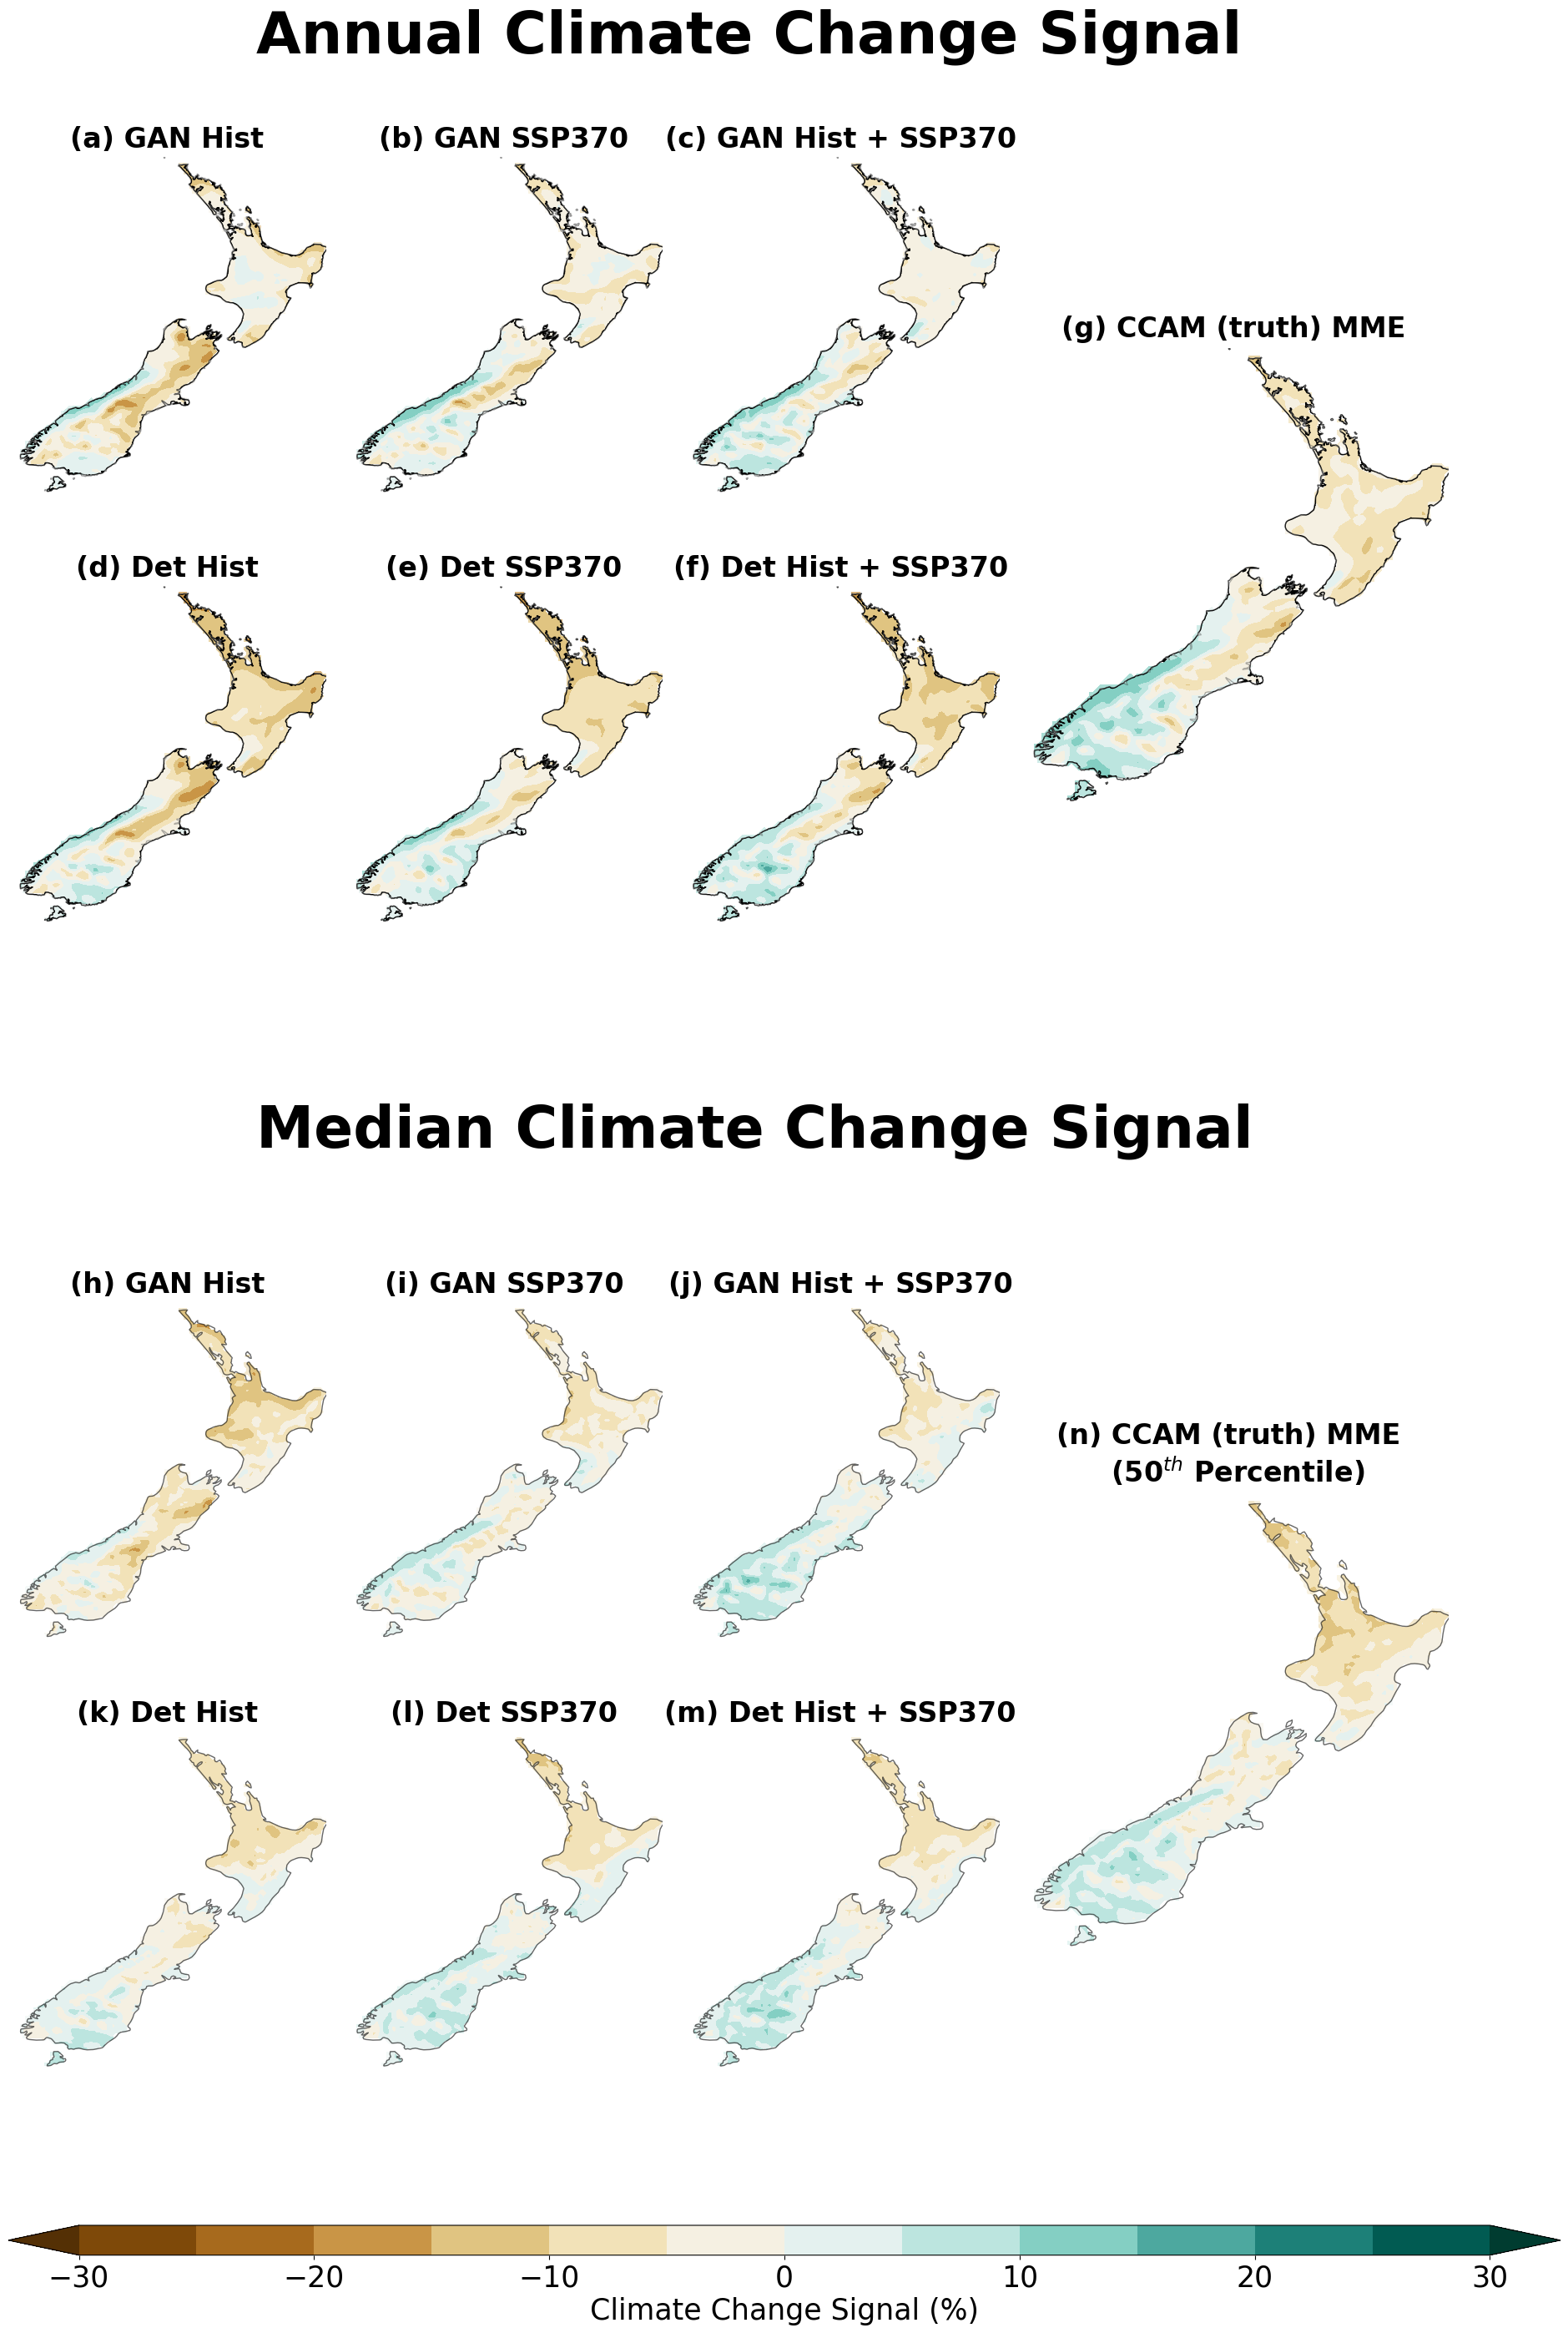

In [23]:
fig, axesa, axesb = get_subplots()
ax3, ax4, ax5,ax9, ax10, ax10_b, ax11 = axesa
levels = np.arange(-30, 35, 5)
gan_hist.seas_cc_signal.mean("GCM").mean("season").mean("member").where(orog>0, np.nan).plot.contourf(ax=ax3, cmap='BrBG', add_colorbar =False, levels = levels, extend = 'both', transform = ccrs.PlateCarree())
cs1 = gan_future.seas_cc_signal.mean("GCM").mean("season").mean("member").where(orog>0, np.nan).plot.contourf(ax=ax5, cmap='BrBG', add_colorbar =False, levels = levels, extend = 'both', transform = ccrs.PlateCarree())
(signal_gt.seas_cc_signal).mean("GCM").mean("season").where(orog>0, np.nan).plot.contourf(ax=ax11,  cmap='BrBG', add_colorbar =False, levels =levels, extend = 'both', transform = ccrs.PlateCarree())
#ax44 = fig.add_axes([0.1, 0.05, 0.8, 0.03])
cs2 = gan_future_full.seas_cc_signal.mean("GCM").mean("season").mean("member").where(orog>0, np.nan).plot.contourf(ax=ax4, cmap='BrBG', add_colorbar =False, levels = levels, extend = 'both', transform = ccrs.PlateCarree())

cbar2 = fig.colorbar(cs1, cax = ax7, orientation = 'horizontal')
cbar2.set_label('Climate Change Signal (%)', fontsize = 22)
cbar2.ax.tick_params(labelsize = 15)
for axes in [ax3, ax4, ax5]:
    axes.coastlines('10m')
    axes.set_extent([166, 178.5, -47.5, -34], crs=ccrs.PlateCarree())
    #ax.coastlines('10m')
    axes.add_feature(cfeature.OCEAN.with_scale('50m'), facecolor ='white', alpha =0.6,zorder =13, ec ='k')
    axes.axis('off')
ax3.set_title('(a) GAN Hist', weight ='bold', fontsize =24)
ax4.set_title('(b) GAN SSP370', weight ='bold', fontsize =24)
ax5.set_title('(c) GAN Hist + SSP370', weight ='bold', fontsize =24)
#ax5.set_title('(e) Ground Truth CNRM-CM6-1', weight ='bold', fontsize =15)
#ax3.text(161.5, -45, '  JJA Climate \nChange Signal', fontsize =20, weight ='bold', transform = ccrs.PlateCarree(), rotation =90)


ax4.text(162.5, -30, 'Annual Climate Change Signal', weight ='bold', transform = ccrs.PlateCarree(), fontsize =50)

unet_hist.seas_cc_signal.mean("GCM").mean("season").where(orog>0, np.nan).mean("member").plot.contourf(ax=ax9, cmap='BrBG', add_colorbar =False, levels = levels, extend = 'both', transform = ccrs.PlateCarree())
cs1 = unet_future.seas_cc_signal.mean("GCM").mean("season").where(orog>0, np.nan).mean("member").plot.contourf(ax=ax10_b, cmap='BrBG', add_colorbar =False, levels = levels, extend = 'both', transform = ccrs.PlateCarree())
cs11 = unet_future_full.seas_cc_signal.mean("GCM").mean("season").where(orog>0, np.nan).mean("member").plot.contourf(ax=ax10, cmap='BrBG', add_colorbar =False, levels = levels, extend = 'both', transform = ccrs.PlateCarree())



for axes in [ax9, ax10, ax11, ax10_b]:
    axes.coastlines('10m')
    axes.set_extent([166, 178.5, -47.5, -34], crs=ccrs.PlateCarree())
    #ax.coastlines('10m')
    axes.add_feature(cfeature.OCEAN.with_scale('50m'), facecolor ='white', alpha =0.3,zorder =13, ec ='k')
    axes.axis('off')

ax9.set_title('(d) Det Hist', weight ='bold', fontsize =24)
ax10.set_title('(e) Det SSP370', weight ='bold', fontsize =24)
ax10_b.set_title('(f) Det Hist + SSP370', weight ='bold', fontsize =24)
ax11.set_title(f'(g) CCAM (truth) MME', weight ='bold', fontsize =24)
#ax55 = fig.add_axes([0.9, 0.5, 0.02, 0.4])
#ax9.text(161.5, -45, '  DJF Climate \nChange Signal', fontsize =20, weight ='bold', transform = ccrs.PlateCarree(), rotation =90)

# Add colorbar manually

ax1.tick_params(labelsize =14)

[ax11, ax21, ax22,ax31, ax41, ax42, ax51, ax7] = axesb
ax21.text(162.5, -28, 'Median Climate Change Signal', weight ='bold', transform = ccrs.PlateCarree(), fontsize =50)
unet_future.cc_signal.isel(quantile=0).mean("member").mean("GCM").where(orog > 0, np.nan).clip(-35, 35).plot.contourf( cmap='BrBG', ax=ax42, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels,extend ='both' )
unet_future_full.cc_signal.isel(quantile=0).mean("member").mean("GCM").where(orog > 0, np.nan).clip(-35, 35).plot.contourf( cmap='BrBG', ax=ax41, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels,extend ='both' )

unet_hist.cc_signal.isel(quantile=0).mean("GCM").mean("member").where(orog > 0, np.nan).clip(-35, 35).plot.contourf(cmap='BrBG', ax=ax31, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels, extend ='both' , )
gan_future.cc_signal.isel(quantile=0).mean("GCM").mean("member").where(orog > 0, np.nan).clip(-35, 35).plot.contourf(cmap='BrBG', ax=ax22, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels,extend ='both' )
gan_hist.cc_signal.isel(quantile=0).mean("GCM").mean("member").where(orog > 0, np.nan).clip(-35, 35).plot.contourf(cmap='BrBG', ax=ax11, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels, extend ='both')
cs1 = signal_gt.isel(quantile=0).mean("GCM").cc_signal.where(orog > 0, np.nan).clip(-35, 35).plot.contourf(cmap='BrBG', ax=ax51, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels,extend ='both' )
gan_future_full.isel(quantile=0).mean("GCM").cc_signal.mean("member").where(orog > 0, np.nan).clip(-35, 35).plot.contourf(cmap='BrBG', ax=ax21, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels,extend ='both' )

# Set extent for first four subplots
for ax in [ax11, ax21, ax31, ax41, ax51, ax42, ax22]:
    ax.set_extent([166, 178.5, -47.5, -34], crs=ccrs.PlateCarree())
    #ax.coastlines('10m')
    ax.add_feature(cfeature.OCEAN.with_scale('50m'), facecolor ='white', alpha =0.6,zorder =13, ec ='k')
    ax.axis('off')
    ax.set_title('')
ax42.set_title('(m) Det Hist + SSP370', weight ='bold', fontsize =24)
ax41.set_title('(l) Det SSP370', weight ='bold', fontsize =24)
ax31.set_title('(k) Det Hist', weight ='bold', fontsize =24)
ax22.set_title('(j) GAN Hist + SSP370', weight ='bold', fontsize =24)
ax21.set_title('(i) GAN SSP370', weight ='bold', fontsize =24)
ax11.set_title('(h) GAN Hist', weight ='bold', fontsize =24)
ax51.set_title('(n) CCAM (truth) MME \n (50$^{th}$ Percentile)', weight ='bold', fontsize =24)
cbar = fig.colorbar(cs1, cax = ax7, orientation ='horizontal')
cbar.set_label('Climate Change Signal (%)', fontsize =25)
cbar.ax.tick_params(labelsize =25)
#fig.tight_layout()
fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/figures/50th-pecentile_cc_signal.pdf', dpi =700, bbox_inches ='tight')
fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/figures/50th-pecentile_cc_signal.png', dpi =700, bbox_inches ='tight')
        

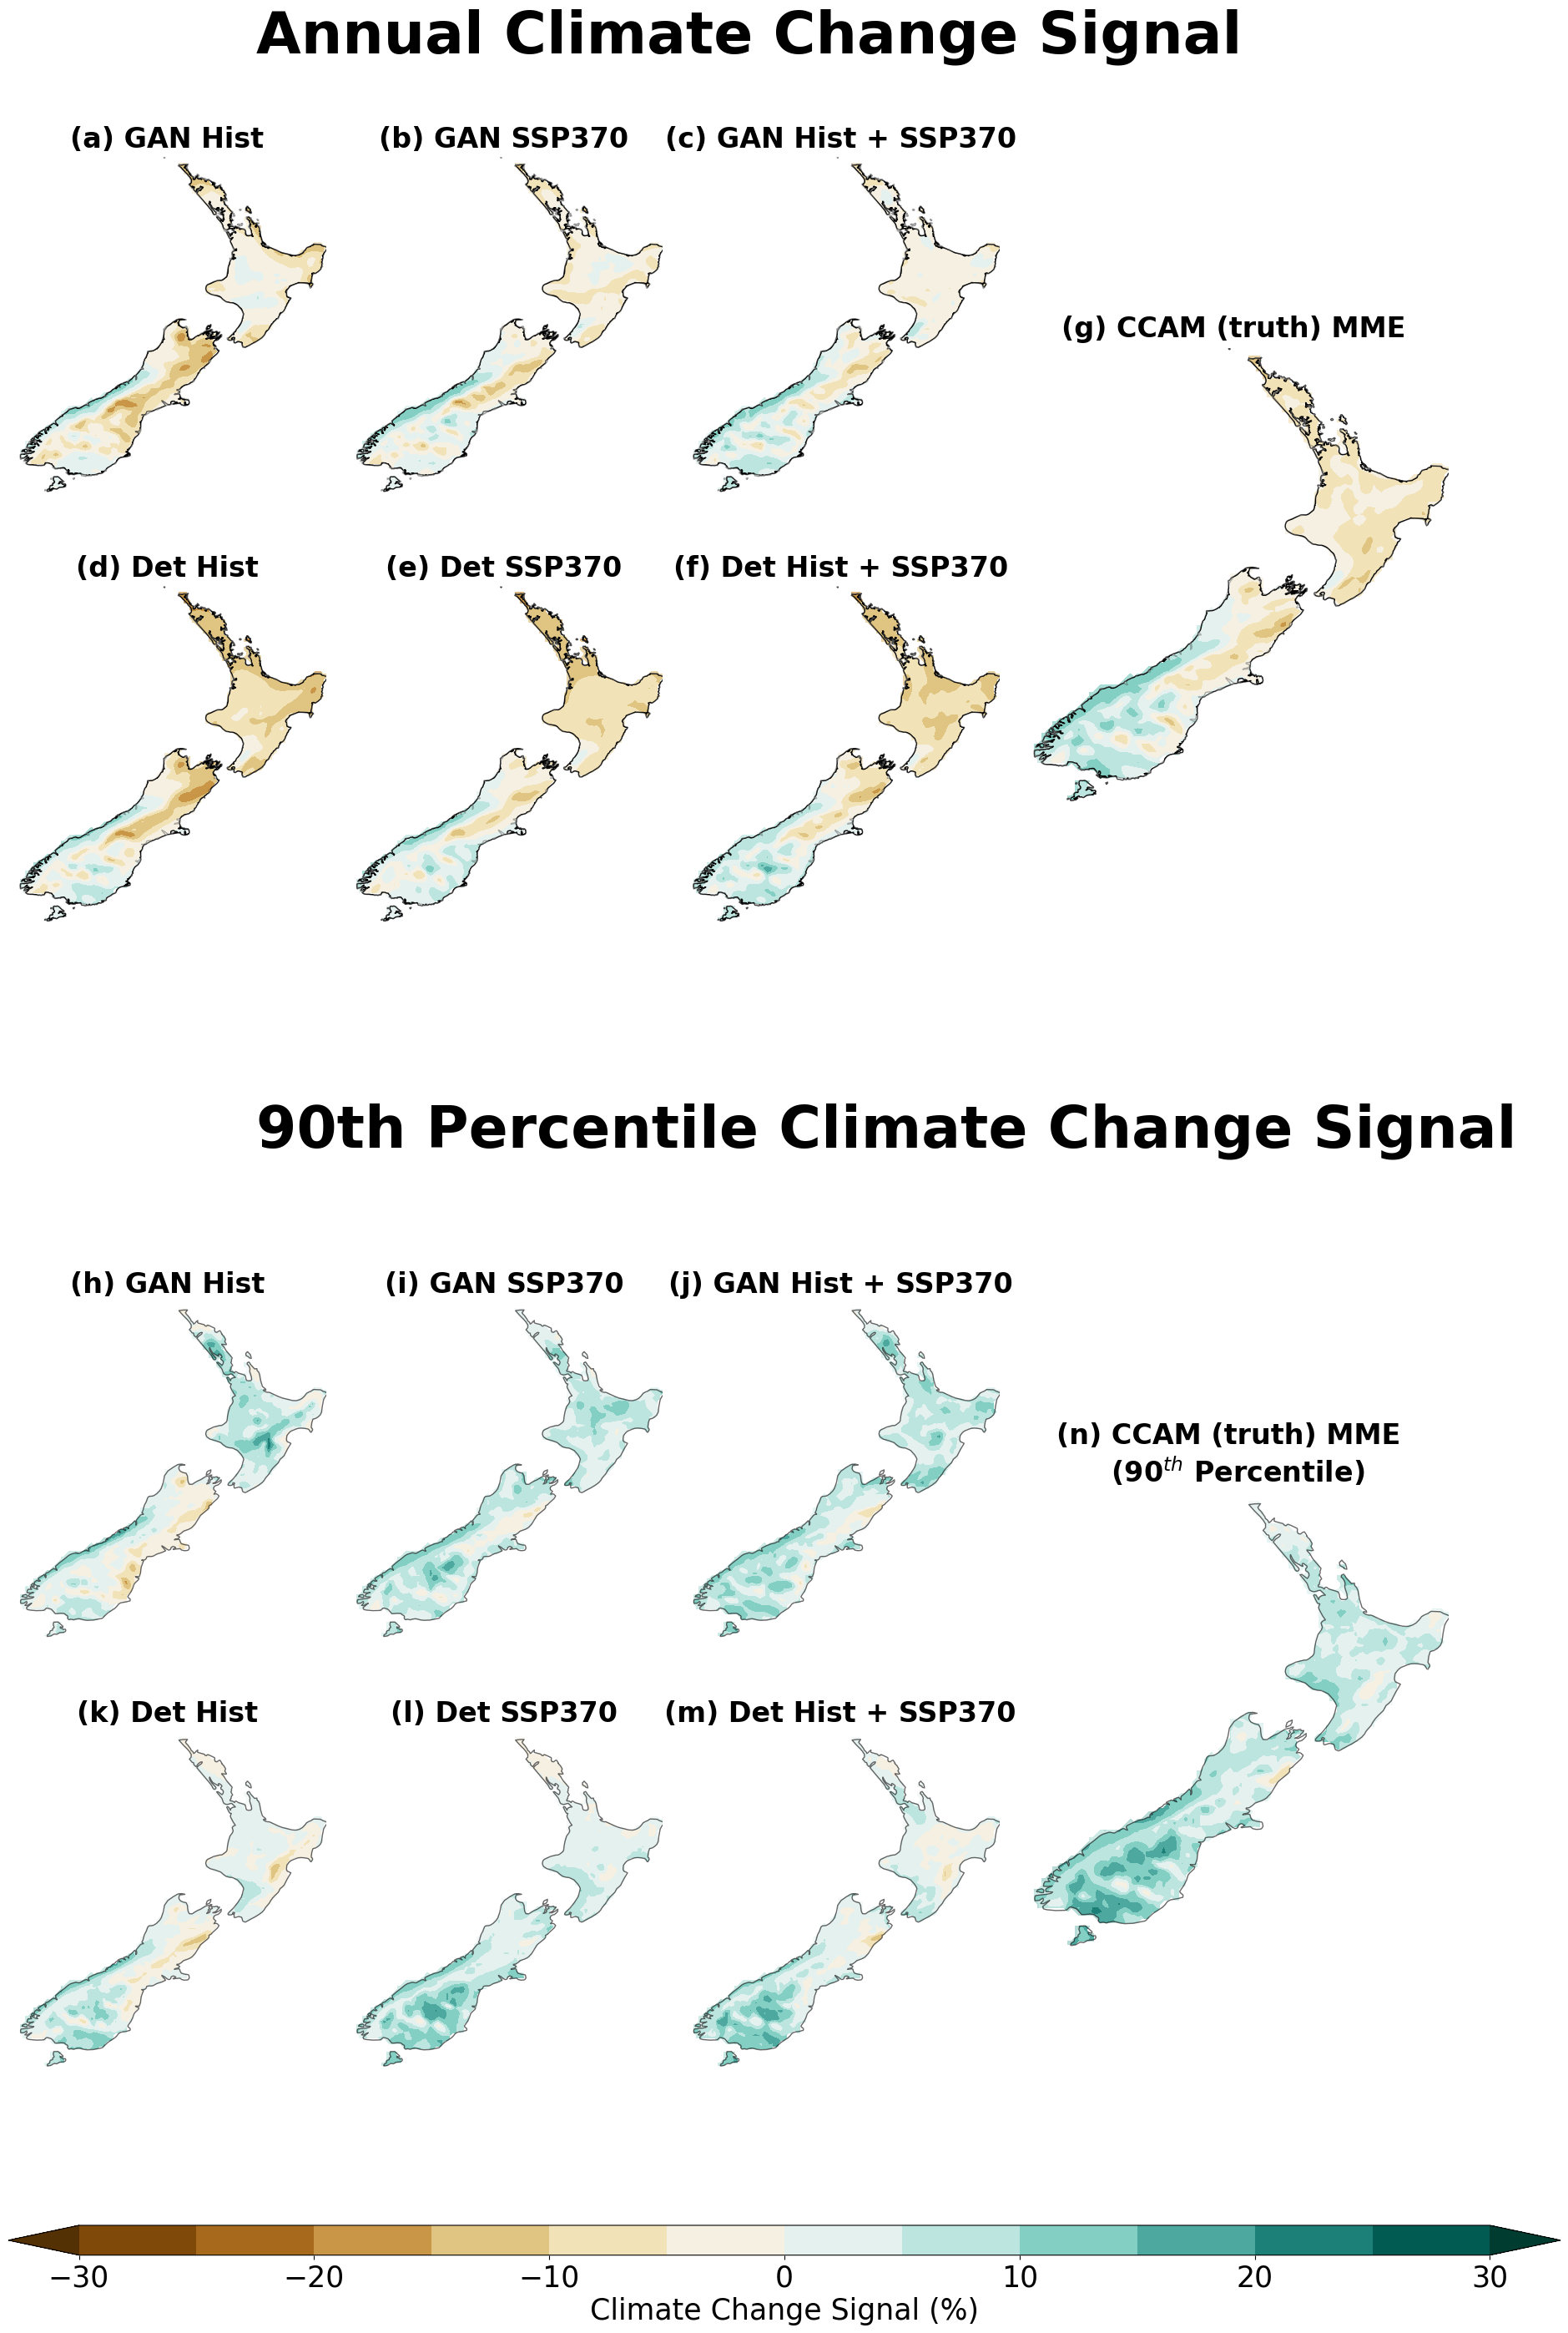

In [22]:
fig, axesa, axesb = get_subplots()
ax3, ax4, ax5,ax9, ax10, ax10_b, ax11 = axesa
levels = np.arange(-30, 35, 5)
gan_hist.seas_cc_signal.mean("GCM").mean("season").mean("member").where(orog>0, np.nan).plot.contourf(ax=ax3, cmap='BrBG', add_colorbar =False, levels = levels, extend = 'both', transform = ccrs.PlateCarree())
cs1 = gan_future.seas_cc_signal.mean("GCM").mean("season").mean("member").where(orog>0, np.nan).plot.contourf(ax=ax5, cmap='BrBG', add_colorbar =False, levels = levels, extend = 'both', transform = ccrs.PlateCarree())
(signal_gt.seas_cc_signal).mean("GCM").mean("season").where(orog>0, np.nan).plot.contourf(ax=ax11,  cmap='BrBG', add_colorbar =False, levels =levels, extend = 'both', transform = ccrs.PlateCarree())
#ax44 = fig.add_axes([0.1, 0.05, 0.8, 0.03])
cs2 = gan_future_full.seas_cc_signal.mean("GCM").mean("season").mean("member").where(orog>0, np.nan).plot.contourf(ax=ax4, cmap='BrBG', add_colorbar =False, levels = levels, extend = 'both', transform = ccrs.PlateCarree())

cbar2 = fig.colorbar(cs1, cax = ax7, orientation = 'horizontal')
cbar2.set_label('Climate Change Signal (%)', fontsize = 22)
cbar2.ax.tick_params(labelsize = 15)
for axes in [ax3, ax4, ax5]:
    axes.coastlines('10m')
    axes.set_extent([166, 178.5, -47.5, -34], crs=ccrs.PlateCarree())
    #ax.coastlines('10m')
    axes.add_feature(cfeature.OCEAN.with_scale('50m'), facecolor ='white', alpha =0.6,zorder =13, ec ='k')
    axes.axis('off')
ax3.set_title('(a) GAN Hist', weight ='bold', fontsize =24)
ax4.set_title('(b) GAN SSP370', weight ='bold', fontsize =24)
ax5.set_title('(c) GAN Hist + SSP370', weight ='bold', fontsize =24)
#ax5.set_title('(e) Ground Truth CNRM-CM6-1', weight ='bold', fontsize =15)
#ax3.text(161.5, -45, '  JJA Climate \nChange Signal', fontsize =20, weight ='bold', transform = ccrs.PlateCarree(), rotation =90)


ax4.text(162.5, -30, 'Annual Climate Change Signal', weight ='bold', transform = ccrs.PlateCarree(), fontsize =50)

unet_hist.seas_cc_signal.mean("GCM").mean("season").where(orog>0, np.nan).mean("member").plot.contourf(ax=ax9, cmap='BrBG', add_colorbar =False, levels = levels, extend = 'both', transform = ccrs.PlateCarree())
cs1 = unet_future.seas_cc_signal.mean("GCM").mean("season").where(orog>0, np.nan).mean("member").plot.contourf(ax=ax10_b, cmap='BrBG', add_colorbar =False, levels = levels, extend = 'both', transform = ccrs.PlateCarree())
cs11 = unet_future_full.seas_cc_signal.mean("GCM").mean("season").where(orog>0, np.nan).mean("member").plot.contourf(ax=ax10, cmap='BrBG', add_colorbar =False, levels = levels, extend = 'both', transform = ccrs.PlateCarree())



for axes in [ax9, ax10, ax11, ax10_b]:
    axes.coastlines('10m')
    axes.set_extent([166, 178.5, -47.5, -34], crs=ccrs.PlateCarree())
    #ax.coastlines('10m')
    axes.add_feature(cfeature.OCEAN.with_scale('50m'), facecolor ='white', alpha =0.3,zorder =13, ec ='k')
    axes.axis('off')

ax9.set_title('(d) Det Hist', weight ='bold', fontsize =24)
ax10.set_title('(e) Det SSP370', weight ='bold', fontsize =24)
ax10_b.set_title('(f) Det Hist + SSP370', weight ='bold', fontsize =24)
ax11.set_title(f'(g) CCAM (truth) MME', weight ='bold', fontsize =24)
#ax55 = fig.add_axes([0.9, 0.5, 0.02, 0.4])
#ax9.text(161.5, -45, '  DJF Climate \nChange Signal', fontsize =20, weight ='bold', transform = ccrs.PlateCarree(), rotation =90)

# Add colorbar manually

ax1.tick_params(labelsize =14)

[ax11, ax21, ax22,ax31, ax41, ax42, ax51, ax7] = axesb
ax21.text(162.5, -28, '90th Percentile Climate Change Signal', weight ='bold', transform = ccrs.PlateCarree(), fontsize =50)
unet_future.cc_signal.sel(quantile=0.9).mean("member").mean("GCM").where(orog > 0, np.nan).clip(-35, 35).plot.contourf( cmap='BrBG', ax=ax42, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels,extend ='both' )
unet_future_full.cc_signal.sel(quantile=0.9).mean("member").mean("GCM").where(orog > 0, np.nan).clip(-35, 35).plot.contourf( cmap='BrBG', ax=ax41, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels,extend ='both' )

unet_hist.cc_signal.sel(quantile=0.9).mean("GCM").mean("member").where(orog > 0, np.nan).clip(-35, 35).plot.contourf(cmap='BrBG', ax=ax31, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels, extend ='both' , )
gan_future.cc_signal.sel(quantile=0.9).mean("GCM").mean("member").where(orog > 0, np.nan).clip(-35, 35).plot.contourf(cmap='BrBG', ax=ax22, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels,extend ='both' )
gan_hist.cc_signal.sel(quantile=0.9).mean("GCM").mean("member").where(orog > 0, np.nan).clip(-35, 35).plot.contourf(cmap='BrBG', ax=ax11, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels, extend ='both')
cs1 = signal_gt.sel(quantile=0.9).mean("GCM").cc_signal.where(orog > 0, np.nan).clip(-35, 35).plot.contourf(cmap='BrBG', ax=ax51, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels,extend ='both' )
gan_future_full.sel(quantile=0.9).mean("GCM").cc_signal.mean("member").where(orog > 0, np.nan).clip(-35, 35).plot.contourf(cmap='BrBG', ax=ax21, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels,extend ='both' )

# Set extent for first four subplots
for ax in [ax11, ax21, ax31, ax41, ax51, ax42, ax22]:
    ax.set_extent([166, 178.5, -47.5, -34], crs=ccrs.PlateCarree())
    #ax.coastlines('10m')
    ax.add_feature(cfeature.OCEAN.with_scale('50m'), facecolor ='white', alpha =0.6,zorder =13, ec ='k')
    ax.axis('off')
    ax.set_title('')
ax42.set_title('(m) Det Hist + SSP370', weight ='bold', fontsize =24)
ax41.set_title('(l) Det SSP370', weight ='bold', fontsize =24)
ax31.set_title('(k) Det Hist', weight ='bold', fontsize =24)
ax22.set_title('(j) GAN Hist + SSP370', weight ='bold', fontsize =24)
ax21.set_title('(i) GAN SSP370', weight ='bold', fontsize =24)
ax11.set_title('(h) GAN Hist', weight ='bold', fontsize =24)
ax51.set_title('(n) CCAM (truth) MME \n (90$^{th}$ Percentile)', weight ='bold', fontsize =24)
cbar = fig.colorbar(cs1, cax = ax7, orientation ='horizontal')
cbar.set_label('Climate Change Signal (%)', fontsize =25)
cbar.ax.tick_params(labelsize =25)
#fig.tight_layout()
fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/figures/90th-pecentile_cc_signal.pdf', dpi =700, bbox_inches ='tight')
fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/figures/90th-pecentile_cc_signal.png', dpi =700, bbox_inches ='tight')
        

In [ ]:
`

In [101]:
gan_future_full

<xarray.Dataset>
Dimensions:               (GCM: 5, quantile: 11, member: 10, lat: 172, lon: 179, season: 4)
Coordinates:
  * lon                   (lon) float32 164.9 165.0 165.1 ... 183.7 183.9 184.0
  * lat                   (lat) float32 -51.21 -51.11 -51.0 ... -32.97 -32.86
  * quantile              (quantile) float64 0.5 0.7 0.9 ... 0.995 0.998 0.999
  * season                (season) object 'DJF' 'JJA' 'MAM' 'SON'
  * GCM                   (GCM) <U13 'ACCESS-CM2' ... 'NorESM2-MM'
Dimensions without coordinates: member
Data variables:
    hist_quantiles        (GCM, quantile, member, lat, lon) float64 1.742 ......
    future_quantiles      (GCM, quantile, member, lat, lon) float64 1.926 ......
    cc_signal             (GCM, quantile, member, lat, lon) float64 10.56 ......
    seas_cc_signal        (GCM, season, member, lat, lon) float64 1.81 ... -1...
    hist_clim_rainfall    (GCM, season, member, lat, lon) float64 3.734 ... 2...
    future_clim_rainfall  (GCM, season, member, lat, lon) float64 3.801 ... 2...

In [281]:
"""Show 2 of the GCMs herein this figure and have another two available in the supplementary section"""

"""Add the figure showing the relationships in the 99th quantile and the 90th qunatile"""

"""Then show a visual example of what the 99th quantile looks like"""

'Then show a visual example of what the 99th quantile looks like'

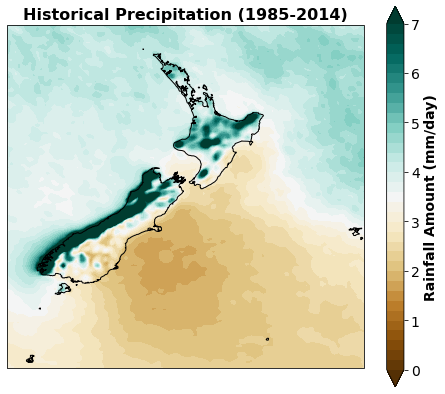

In [46]:
fig, ax = plt.subplots(subplot_kw = dict(projection = ccrs.PlateCarree(central_longitude=171.77)),
figsize = (8,7))
levels = np.arange(0, 7.2, 0.2)
cs = (signal_gt*3600*24).hist_clim_rainfall.sel(season = 'JJA', GCM = 'ACCESS-CM2').plot.contourf(cmap ='BrBG', vmax =7, transform = ccrs.PlateCarree(), add_colorbar = False, levels = levels, extend ='both')
ax.coastlines('10m')
cbar = fig.colorbar(cs)
cbar.set_label('Rainfall Amount (mm/day)', weight ='bold', fontsize = 14)
cbar.set_ticks(np.arange(0, 8, 1))
cbar.set_ticklabels(["%.0f" % f for f in np.arange(0, 8, 1)])
cbar.ax.tick_params(labelsize = 14)
ax.set_title('Historical Precipitation (1985-2014)', fontsize = 16, weight ='bold')
fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/figures/hist_precip.png', dpi =500, bbox_inches ='tight')

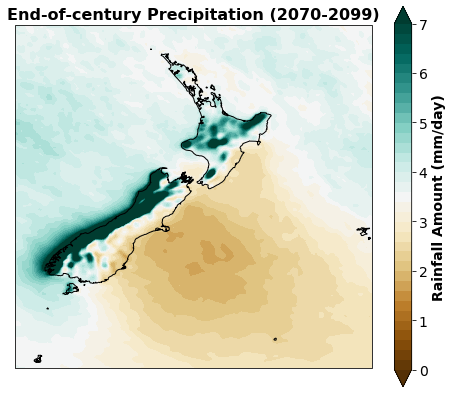

In [48]:
fig, ax = plt.subplots(subplot_kw = dict(projection = ccrs.PlateCarree(central_longitude=171.77)),
figsize = (8,7))
levels = np.arange(0, 7.2, 0.2)
cs = (signal_gt*3600*24).future_clim_rainfall.sel(season = 'JJA', GCM = 'ACCESS-CM2').plot.contourf(cmap ='BrBG', vmax =7, transform = ccrs.PlateCarree(), add_colorbar = False, levels = levels, extend ='both')
ax.coastlines('10m')
cbar = fig.colorbar(cs)
cbar.set_label('Rainfall Amount (mm/day)', weight ='bold', fontsize = 14)
cbar.set_ticks(np.arange(0, 8, 1))
cbar.set_ticklabels(["%.0f" % f for f in np.arange(0, 8, 1)])
cbar.ax.tick_params(labelsize = 14)
ax.set_title('End-of-century Precipitation (2070-2099)', fontsize = 16, weight ='bold')
fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/figures/future_precip.png', dpi =500, bbox_inches ='tight')

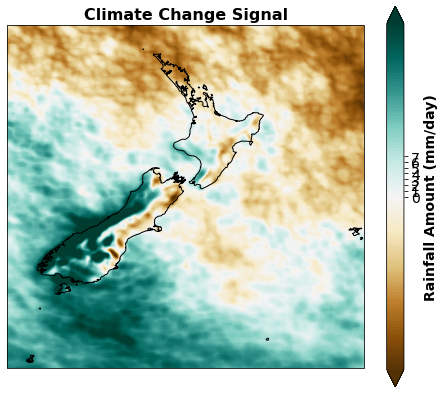

In [51]:
fig, ax = plt.subplots(subplot_kw = dict(projection = ccrs.PlateCarree(central_longitude=171.77)),
figsize = (8,7))
levels = np.arange(-30, 30.5, 0.5)
cs = (signal_gt).seas_cc_signal.sel(season = 'JJA', GCM = 'ACCESS-CM2').plot.contourf(cmap ='BrBG', vmax =7, transform = ccrs.PlateCarree(), add_colorbar = False, levels = levels, extend ='both')
ax.coastlines('10m')
cbar = fig.colorbar(cs)
cbar.set_label('Rainfall Amount (mm/day)', weight ='bold', fontsize = 14)
cbar.set_ticks(np.arange(0, 8, 1))
cbar.set_ticklabels(["%.0f" % f for f in np.arange(0, 8, 1)])
cbar.ax.tick_params(labelsize = 14)
ax.set_title('Climate Change Signal', fontsize = 16, weight ='bold')
fig.savefig(r'/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/figures/cc_signal.png', dpi =500, bbox_inches ='tight')

In [10]:
# for extremes
df_results_future_mae_unet = pd.DataFrame()
df_results_future_mae_unet_full = pd.DataFrame()
df_results_hist_mae_unet = pd.DataFrame()
df_results_future_mae = pd.DataFrame()
df_results_future_mae_full = pd.DataFrame()
df_results_hist_mae = pd.DataFrame()

for gcm in signal_gt.GCM.values:
    signal_gan = load_gcm(model_future, gcm)
    signal_gan_full = load_gcm(model_future_full, gcm)
    signal_unet_future = load_gcm_unet(model_future, gcm)
    signal_unet_future_full = load_gcm_unet(model_future_full, gcm)
    signal_unet_hist = load_gcm_unet(model_hist, gcm)
    signal_gan2 = load_gcm(model_hist, gcm)

    v1 = signal_gan.cc_signal.mean("member").isel(quantile =-1)
    v1_full = signal_gan_full.cc_signal.mean("member").isel(quantile =-1)
    v2 = signal_gan2.cc_signal.mean("member").isel(quantile =-1)

    v11 = signal_unet_future.cc_signal.mean("member").isel(quantile =-1)
    v11_full = signal_unet_future_full.cc_signal.mean("member").isel(quantile =-1)
    v22 = signal_unet_hist.cc_signal.mean("member").isel(quantile =-1)

    v3 = signal_gt.cc_signal.sel(GCM=gcm).isel(quantile =-1)
    v1 = v1.where(orog > 0, np.nan).mean(["lat","lon"])
    v1_full = v1_full.where(orog > 0, np.nan).mean(["lat","lon"])
    v2 = v2.where(orog > 0, np.nan).mean(["lat","lon"])

    v11 = v11.where(orog > 0, np.nan).mean(["lat","lon"])
    v11_full = v11_full.where(orog > 0, np.nan).mean(["lat","lon"])
    v22 = v22.where(orog > 0, np.nan).mean(["lat","lon"])
    v3 = v3.where(orog > 0, np.nan).mean(["lat","lon"])

    mae1 = abs(v1 -v3).mean()
    mae1_full = abs(v1_full -v3).mean()

    mae2 = abs(v2 -v3).mean()
    mae3 = abs(v11 - v3).mean()
    mae3_full = abs(v11_full - v3).mean()
    mae4 = abs(v22 - v3).mean()
    df_results_future_mae_unet.loc[ gcm,0] = float(mae3.values)
    df_results_future_mae_unet_full.loc[ gcm,0] = float(mae3_full.values)
    df_results_hist_mae_unet.loc[gcm,0] = float(mae4.values)
    df_results_hist_mae.loc[gcm,0] = float(mae2.values)
    df_results_future_mae.loc[gcm,0] = float(mae1.values)
    df_results_future_mae_full.loc[gcm,0] = float(mae1_full.values)

gan_hist_unet_e = abs(unet_hist.hist_quantiles.isel(quantile =-1) - signal_gt.hist_quantiles.isel(quantile =-1)*86400)
gan_future_unet_e = abs(unet_future.hist_quantiles.isel(quantile =-1) - signal_gt.hist_quantiles.isel(quantile =-1)*86400)
gan_future_unet_e_full = abs(unet_future_full.hist_quantiles.isel(quantile =-1) - signal_gt.hist_quantiles.isel(quantile =-1)*86400)
gan_future_e = abs(gan_future.hist_quantiles.isel(quantile =-1) - signal_gt.hist_quantiles.isel(quantile =-1)*86400)
gan_future_e_full = abs(gan_future_full.hist_quantiles.isel(quantile =-1) - signal_gt.hist_quantiles.isel(quantile =-1)*86400)
gan_hist_e = abs(gan_hist.hist_quantiles.isel(quantile =-1) - signal_gt.hist_quantiles.isel(quantile =-1)*86400)

In [157]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress, t
import matplotlib.transforms as mtransforms
def get_ci(x_test, f, x, y):
    y_pred = x_test * f.slope + f.intercept
    n = len(x)
    df = n - 2  # degrees of freedom
    t_value = t.ppf(0.9, df)  # t-value for 95% confidence interval

    # Calculate the residuals
    residuals = y - (x * f.slope + f.intercept)
    std_err = np.sqrt(np.sum(residuals**2) / df)

    # Calculate the confidence interval for each x value
    ci = t_value * std_err * np.sqrt(1/n + (x_test - np.mean(x_test))**2 / np.sum((x - np.mean(x))**2))
    return ci, y_pred

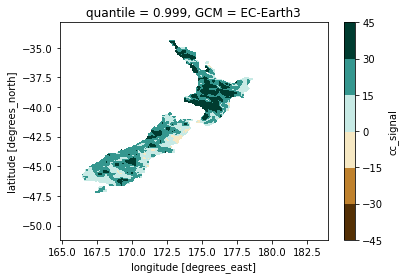

In [19]:
gan_future.cc_signal.isel(quantile=-1).sel( GCM =gcm).mean("member").where(orog > 0, np.nan).clip(-35, 35).plot.contourf(cmap='BrBG')

In [146]:
x_test


array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29])

In [140]:
# Calculate the confidence interval for each x value
ci = get_ci(x_test, f, z3, z1)
ci

(array([2.32203349, 1.38726204, 1.16480293, 1.16310135, 1.66143644]),
 array([30.01895401, 11.56333824, 14.97926165, 18.57610266,  8.86769822]))

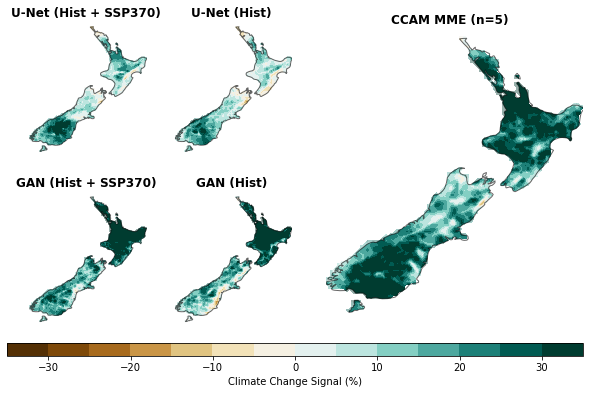

In [46]:

fig = plt.figure(figsize=(10, 6))
levels = np.arange(-35, 40, 5)
# Define GridSpec layout
gs = gridspec.GridSpec(4, 4, width_ratios=[2, 2,2,2], height_ratios=[1, 1,1,1])

# Create subplots
ax1 = plt.subplot(gs[0:2, 0], projection=ccrs.PlateCarree(central_longitude=171.77))
ax2 = plt.subplot(gs[0:2, 1], projection=ccrs.PlateCarree(central_longitude=171.77))
ax3 = plt.subplot(gs[2:, 0], projection=ccrs.PlateCarree(central_longitude=171.77))
ax4 = plt.subplot(gs[2:, 1], projection=ccrs.PlateCarree(central_longitude=171.77))
ax5 = plt.subplot(gs[:, 2:], projection=ccrs.PlateCarree(central_longitude=171.77))

# Load data
# Plot data
unet_future.cc_signal.isel(quantile=-3).isel(member=0, GCM =0).where(orog > 0, np.nan).clip(-35, 35).plot.contourf( cmap='BrBG', ax=ax1, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels, extend ='neither' )
unet_hist.cc_signal.isel(quantile=-3, GCM =0 ).isel(member =0).where(orog > 0, np.nan).clip(-35, 35).plot.contourf(cmap='BrBG', ax=ax2, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels, extend ='neither' , )
gan_future.cc_signal.isel(quantile=-3, GCM =0).isel(member =0).where(orog > 0, np.nan).clip(-35, 35).plot.contourf(cmap='BrBG', ax=ax3, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels, extend ='neither' )
gan_hist.cc_signal.isel(quantile=-3, GCM =0).isel(member =0).where(orog > 0, np.nan).clip(-35, 35).plot.contourf(cmap='BrBG', ax=ax4, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels,  extend ='neither')
cs1 = signal_gt.isel(GCM =0).cc_signal.isel(quantile=-3).where(orog > 0, np.nan).clip(-35, 35).plot.contourf(cmap='BrBG', ax=ax5, transform=ccrs.PlateCarree(), add_colorbar = False, levels = levels, extend ='neither')

# Set extent for first four subplots
for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.set_extent([166, 178.5, -47.5, -34], crs=ccrs.PlateCarree())
    #ax.coastlines('10m')
    ax.add_feature(cfeature.OCEAN.with_scale('50m'), facecolor ='white', alpha =0.6,zorder =13, ec ='k')
    ax.axis('off')
    ax.set_title('')
ax1.set_title('U-Net (Hist + SSP370)', weight ='bold')
ax2.set_title('U-Net (Hist)', weight ='bold')
ax3.set_title('GAN (Hist + SSP370)', weight ='bold')
ax4.set_title('GAN (Hist)', weight ='bold')
ax5.set_title('CCAM MME (n=5)', weight ='bold')
ax6 = fig.add_axes([0.1, 0.08, 0.8, 0.03])
cbar = fig.colorbar(cs1, cax = ax6, orientation ='horizontal')
cbar.set_label('Climate Change Signal (%)')

In [20]:
gan_hist.cc_signal.isel(quantile=-1, GCM =3)

<xarray.DataArray 'cc_signal' (member: 10, lat: 172, lon: 179)>
array([[[ 5.56809862e+00,  8.86418369e+00,  4.74446969e+00, ...,
          3.71326763e+00,  4.15205154e+00,  3.40196956e+00],
        [ 8.59215191e+00,  9.39484103e+00,  7.15819605e+00, ...,
         -1.02920312e+01, -7.44156140e+00, -7.15807166e+00],
        [ 7.06200663e+00,  9.87933282e+00,  4.06979737e+00, ...,
         -8.19205773e+00, -8.60227186e+00, -3.15041995e+00],
        ...,
        [ 8.50222275e+00,  6.20849697e+00,  1.93151765e+01, ...,
         -4.34316970e-01, -2.73869625e+00, -1.91439658e+00],
        [ 1.00554430e+00, -1.52904706e+00,  3.91239347e+00, ...,
          1.01652608e+01, -1.67859517e+00,  2.29299295e+00],
        [-7.79941480e-02, -1.09194993e+01, -3.00786800e-01, ...,
          3.34534895e+00, -1.27585908e+01, -5.07446093e+00]],

       [[ 8.27676735e+00,  1.08014141e+01,  4.53490965e+00, ...,
          3.19554999e+00,  8.58009288e+00, -3.06360607e+00],
        [ 4.71544082e+00,  1.67290358e+00,  3.98738336e+00, ...,
         -9.13033041e+00, -1.03674034e+01, -5.18635444e+00],
        [ 6.89037994e+00,  1.11063843e+00,  8.11008914e+00, ...,
         -6.65149210e+00, -9.39790111e+00, -5.11829230e+00],
...
        [ 1.15860077e+01,  2.06159295e+00,  6.03078483e+00, ...,
         -3.58400235e+00,  4.33266072e+00,  6.55102678e+00],
        [ 6.27489253e+00, -1.26728331e+00,  2.81043353e+00, ...,
          1.53930845e+00, -4.64808522e+00, -1.60977208e+01],
        [-1.72267529e+00, -2.33724795e+00,  7.42980715e+00, ...,
         -8.18478568e+00, -6.45650528e-01, -1.04137305e+01]],

       [[ 9.06246812e+00,  1.00273658e+01,  9.81075091e+00, ...,
         -5.75576079e+00,  1.26541456e+00,  9.23208168e-01],
        [ 6.96460997e+00,  8.20304229e+00, -6.02831960e-01, ...,
         -6.69578992e+00, -2.73130411e+00, -3.41843020e+00],
        [ 3.59943131e+00,  9.43690062e+00,  8.40393251e+00, ...,
         -5.58771913e+00, -5.24372209e+00, -1.63962970e+00],
        ...,
        [ 2.13421485e+01, -4.96784314e-01, -4.89497803e-01, ...,
          5.20791550e-03,  8.77324359e+00,  2.48118924e+00],
        [ 1.90560719e+01, -1.90946537e+00, -8.38917398e+00, ...,
          5.18091686e+00, -4.09498247e+00,  4.21222404e+00],
        [ 1.13714809e+01, -3.49543614e+00, -1.13149040e+01, ...,
         -5.95346357e+00, -1.56094399e+01, -5.32500588e-02]]])
Coordinates:
  * lon       (lon) float32 164.9 165.0 165.1 165.2 ... 183.6 183.7 183.9 184.0
  * lat       (lat) float32 -51.21 -51.11 -51.0 -50.89 ... -33.07 -32.97 -32.86
    quantile  float64 0.999
    GCM       <U13 'EC-Earth3'
Dimensions without coordinates: member

In [80]:
signal_unet_hist = []
signal_unet_future = []
signal_gan = []
signal_gan2 = []
for i, gcm in enumerate(signal_gt.GCM.values[:]):

    # Your existing code to load data and plot signals
    # (Assuming the necessary data and variables are defined outside of this code snippet)
    signal_unet_future.append(load_gcm_unet(model_future, gcm).sel(quantile=slice(0.9, None)))
    signal_unet_hist.append(load_gcm_unet(model_hist, gcm).sel(quantile=slice(0.9, None)))
    signal_gan.append(load_gcm(model_future, gcm).sel(quantile=slice(0.9, None)))
    signal_gan2.append(load_gcm(model_hist, gcm).sel(quantile=slice(0.9, None)))
signal_unet_future = xr.concat(signal_unet_future, dim ="GCM")
signal_unet_hist = xr.concat(signal_unet_hist, dim ="GCM")
signal_gan = xr.concat(signal_gan, dim ="GCM")
signal_gan2 = xr.concat(signal_gan2, dim ="GCM")

No handles with labels found to put in legend.


Text(0.5, 0, 'Quantile')

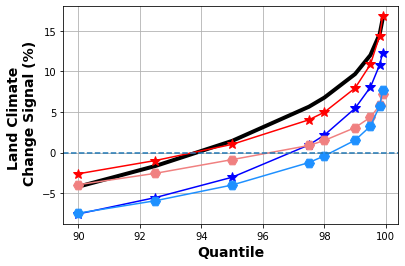

In [156]:
signal_unet_hist = []
signal_unet_future = []
signal_gan = []
signal_gan2 = []
for i, gcm in enumerate(signal_gt.GCM.values[:]):

    # Your existing code to load data and plot signals
    # (Assuming the necessary data and variables are defined outside of this code snippet)
    signal_unet_future.append(load_gcm_unet(model_future, gcm).sel(quantile=slice(0.9, None)))
    signal_unet_hist.append(load_gcm_unet(model_hist, gcm).sel(quantile=slice(0.9, None)))
    signal_gan.append(load_gcm(model_future, gcm).sel(quantile=slice(0.9, None)))
    signal_gan2.append(load_gcm(model_hist, gcm).sel(quantile=slice(0.9, None)))
signal_unet_future = xr.concat(signal_unet_future, dim ="GCM")
signal_unet_hist = xr.concat(signal_unet_hist, dim ="GCM")
signal_gan = xr.concat(signal_gan, dim ="GCM")
signal_gan2 = xr.concat(signal_gan2, dim ="GCM")

fig, ax = plt.subplots()
(signal_gt.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).mean(["lat", "lon", "GCM"]).cc_signal.plot(color ='k', lw =4)
#((signal_gt.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).mean(["lat", "lon", "GCM"]) +(signal_gt.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).std(["lat", "lon"]).mean( "GCM")).cc_signal.plot(color ='b')
#((signal_gt.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).mean(["lat", "lon", "GCM"]) - (signal_gt.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).std(["lat", "lon"]).mean( "GCM")).cc_signal.plot(color ='b')


(signal_gan.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).mean(["lat", "lon", "GCM","member"]).cc_signal.plot(color ='red', marker ='*', ms =10)
#((signal_gan.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).mean(["lat", "lon", "GCM","member"]) +(signal_gt.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).std(["lat", "lon"]).mean( "GCM")).cc_signal.plot(color ='r')
#((signal_gan.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).mean(["lat", "lon", "GCM","member"]) - (signal_gt.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).std(["lat", "lon"]).mean( "GCM")).cc_signal.plot(color ='r')


(signal_gan2.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).median(["lat", "lon", "GCM","member"]).cc_signal.plot(color ='b', marker ='*', ms =10)
(signal_unet_future.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).median(["lat", "lon", "GCM","member"]).cc_signal.plot(color ='lightcoral', marker ='H', ms =10)
(signal_unet_hist.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).mean(["lat", "lon", "GCM","member"]).cc_signal.plot(color ='dodgerblue', marker ='H', ms =10)



ax.set_ylabel(' ', fontsize=12, weight='bold')

ax.grid(True)
ax.axhline(0.0, ls='--')
ax.legend().remove()  # Remove legend from subplots

ax.set_xticks(np.arange(0.9, 1.02, 0.02))
ax.set_xticklabels(["%.0f" % f for f in np.arange(0.9, 1.02, 0.02)*100])
#ax.set_xlabel('', weight ='bold', fontsize =13)
ax.set_ylabel('Land Climate \n Change Signal (%)', fontsize=14, weight='bold')
ax.set_xlabel('Quantile', weight ='bold', fontsize =14)
    # Create a common legend outside of the subplots
#((signal_gan2.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).mean(["lat", "lon", "GCM","member"]) +(signal_gt.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).std(["lat", "lon"]).mean( "GCM")).cc_signal.plot(color ='g')
#((signal_gan2.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).mean(["lat", "lon", "GCM","member"]) - (signal_gt.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)).std(["lat", "lon"]).mean( "GCM")).cc_signal.plot(color ='g')
#ax=ax, color='k', label='CCAM', marker='o',)

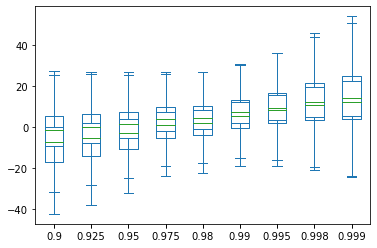

In [129]:
fig, ax = plt.subplots()
signal_gan2.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan).cc_signal.stack(z = ['lat','lon','member', 'GCM']).dropna("z").to_pandas().T.plot(kind ="box", showfliers =False, ax = ax)
signal_gan.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan).cc_signal.stack(z = ['lat','lon','member', 'GCM']).dropna("z").to_pandas().T.plot(kind ="box", showfliers =False, ax = ax)

In [91]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the data for each dataset
data_signal_gt = signal_gt.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)
data_signal_gan = signal_gan.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)
data_signal_gan2 = signal_gan2.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)
data_signal_unet_future = signal_unet_future.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)
data_signal_unet_hist = signal_unet_hist.sel(quantile=slice(0.9, None)).where(orog > 0, np.nan)

# Extract quantiles
quantiles = data_signal_gt.quantile.values

# Prepare data for box plot
data_to_plot = [
    data_signal_gt,
    data_signal_gan,
    data_signal_gan2,
    data_signal_unet_future,
    data_signal_unet_hist
]

colors = ['k', 'r', 'b', 'orange', 'green']
labels = ['GT', 'GAN', 'GAN2', 'UNET Future', 'UNET Hist']

# Create box plot for each quantile
fig, ax = plt.subplots()

# Collect data for each quantile
all_data = []
for quantile in quantiles:
    quantile_data = []
    for data in data_to_plot:
        quantile_data.append(data.sel(quantile=quantile).values.flatten())
    all_data.append(quantile_data)

# Transpose the data so each quantile has its own box plot
transposed_data = list(map(list, zip(*all_data)))

# Plot box plot
for idx, box_data in enumerate(transposed_data):
    ax.boxplot(box_data, positions=[idx], patch_artist=True,
               boxprops=dict(facecolor=colors[idx % len(colors)], color=colors[idx % len(colors)]))

# Set plot labels and legend
ax.set_xticks(range(len(quantiles)))
ax.set_xticklabels([f'{q:.2f}' for q in quantiles], rotation=45)
ax.set_title('Box plot for each quantile')
ax.set_xlabel('Quantile')
ax.set_ylabel('CC Signal')
ax.legend(labels)

plt.tight_layout()
plt.show()


AttributeError: 'function' object has no attribute 'values'

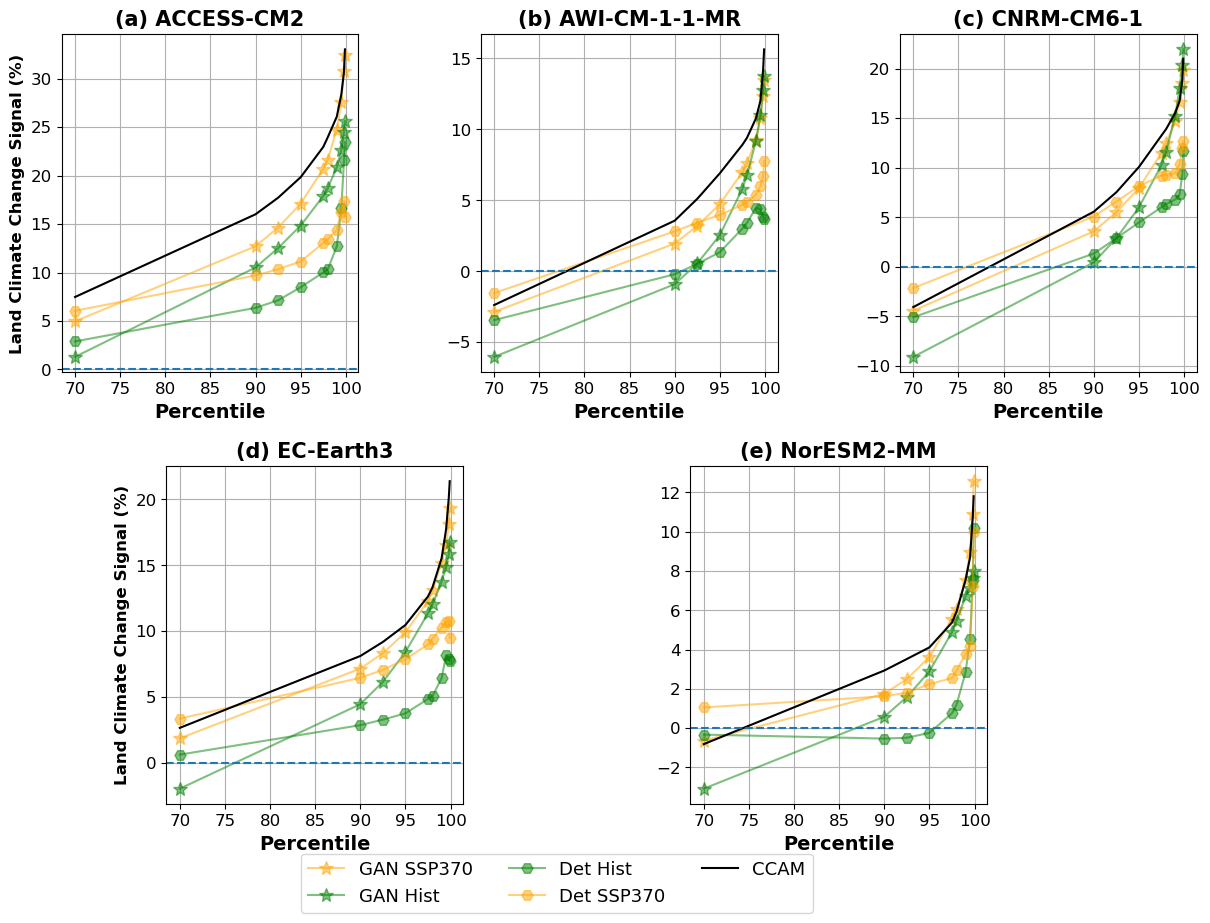

In [115]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(16, 10))
levels = np.arange(-35, 40, 5)
# Define GridSpec layout
gs = GridSpec(18, 12)

# Create subplots
ax1 = plt.subplot(gs[0:8, 1:4])
ax2 = plt.subplot(gs[0:8, 5:8])
ax3 = plt.subplot(gs[0:8, 9:12])
ax4 = plt.subplot(gs[10:18, 2:5])
ax5 = plt.subplot(gs[10:18, 7:10])


axes = [ax1, ax2, ax3, ax4, ax5]
letters = ['a','b','c','d','e']

# Iterate over each subplot
for i, gcm in enumerate(signal_gt.GCM.values[:]):
    ax = axes[i]

    # Your existing code to load data and plot signals
    # (Assuming the necessary data and variables are defined outside of this code snippet)
    signal_unet_future = load_gcm_unet(model_future_full, gcm).sel(quantile=slice(0.7, 0.999))
    signal_unet_hist = load_gcm_unet(model_hist, gcm).sel(quantile=slice(0.7,0.999))
    signal_gan = load_gcm(model_future_full, gcm).sel(quantile=slice(0.7, 0.999))
    signal_gan2 = load_gcm(model_hist, gcm).sel(quantile=slice(0.7, 0.999))

    (signal_gan.where(orog > 0, np.nan)).mean(["lat", "lon", "member"]).cc_signal.plot(ax=ax, color='orange', label='GAN SSP370', marker='*', alpha =0.5, ms =10)
    (signal_gan2.where(orog > 0, np.nan)).mean(["lat", "lon", "member"]).cc_signal.plot(ax=ax, color='green', label='GAN Hist', marker='*', alpha =0.5, ms =10)
    (signal_unet_hist.where(orog > 0, np.nan)).mean(["lat", "lon", "member"]).cc_signal.plot(ax=ax, color='g', label='Det Hist', marker='H', alpha =0.5, ms =8)
    (signal_unet_future.where(orog > 0, np.nan)).mean(["lat", "lon", "member"]).cc_signal.plot(ax=ax, color='orange', label='Det SSP370', marker='H', alpha =0.5, ms =8)
    (signal_gt.sel(quantile=slice(0.7, 0.999)).where(orog > 0, np.nan)).mean(["lat", "lon"]).cc_signal.sel(GCM=gcm).plot(ax=ax, color='k', label='CCAM')

    # Customize subplot
    if (i ==0)| (i ==3):
        ax.set_ylabel('Land Climate Change Signal (%)', fontsize=12, weight='bold')
    else:
        ax.set_ylabel(' ', fontsize=12, weight='bold')
    ax.set_title(f'({letters[i]}) {gcm}', fontsize =15, weight ='bold')
    ax.grid(True)
    ax.axhline(0.0, ls='--')
    ax.legend().remove()  # Remove legend from subplots

    ax.set_xticks(np.arange(0.7, 1.00, 0.05))
    ax.set_xticklabels(["%.0f" % f for f in np.arange(0.7, 1.00, 0.05)*100])
    #ax.set_xlabel('', weight ='bold', fontsize =13)
    ax.set_xlabel('Percentile', weight ='bold', fontsize =14)
    ax.tick_params(labelsize =12)
    # Create a common legend outside of the subplots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol =3, bbox_to_anchor=(0.50, -0.008), fontsize =13)#, bbox_to_anchor=(0.5, -0.05), ncol=3)

fig.savefig('/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/figures/future_extreme_cc_signal_modified_all_gcms.png', dpi =500, bbox_inches ='tight')
fig.savefig('/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/figures/future_extreme_cc_signal_modified_all_gcms.pdf', dpi =500, bbox_inches ='tight')



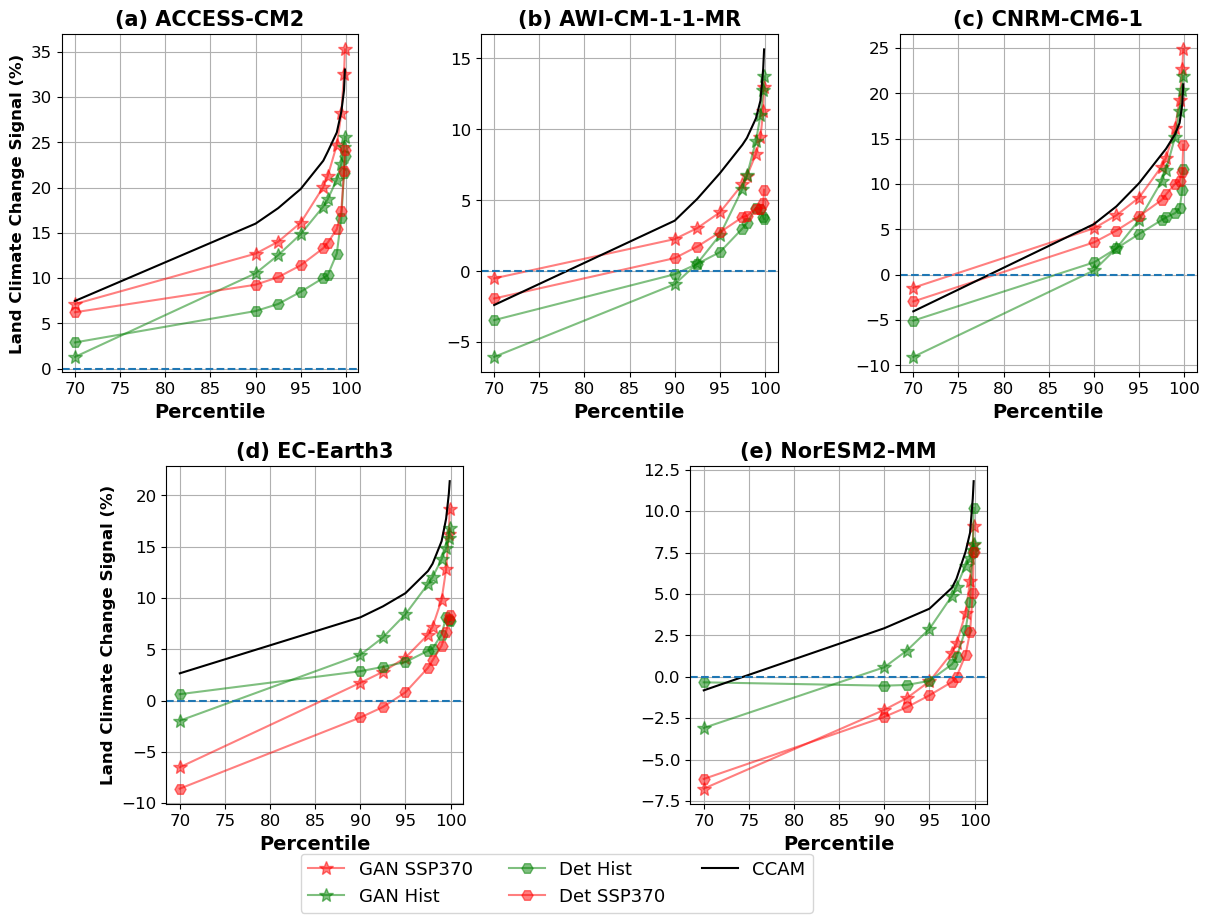

In [65]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(16, 10))
levels = np.arange(-35, 40, 5)
# Define GridSpec layout
gs = GridSpec(18, 12)

# Create subplots
ax1 = plt.subplot(gs[0:8, 1:4])
ax2 = plt.subplot(gs[0:8, 5:8])
ax3 = plt.subplot(gs[0:8, 9:12])
ax4 = plt.subplot(gs[10:18, 2:5])
ax5 = plt.subplot(gs[10:18, 7:10])


axes = [ax1, ax2, ax3, ax4, ax5]
letters = ['a','b','c','d','e']

# Iterate over each subplot
for i, gcm in enumerate(signal_gt.GCM.values[:]):
    ax = axes[i]

    # Your existing code to load data and plot signals
    # (Assuming the necessary data and variables are defined outside of this code snippet)
    signal_unet_future = load_gcm_unet(model_future, gcm).sel(quantile=slice(0.7, 0.999))
    signal_unet_hist = load_gcm_unet(model_hist, gcm).sel(quantile=slice(0.7,0.999))
    signal_gan = load_gcm(model_future, gcm).sel(quantile=slice(0.7, 0.999))
    signal_gan2 = load_gcm(model_hist, gcm).sel(quantile=slice(0.7, 0.999))

    (signal_gan.where(orog > 0, np.nan)).mean(["lat", "lon", "member"]).cc_signal.plot(ax=ax, color='red', label='GAN SSP370', marker='*', alpha =0.5, ms =10)
    (signal_gan2.where(orog > 0, np.nan)).mean(["lat", "lon", "member"]).cc_signal.plot(ax=ax, color='green', label='GAN Hist', marker='*', alpha =0.5, ms =10)
    (signal_unet_hist.where(orog > 0, np.nan)).mean(["lat", "lon", "member"]).cc_signal.plot(ax=ax, color='g', label='Det Hist', marker='H', alpha =0.5, ms =8)
    (signal_unet_future.where(orog > 0, np.nan)).mean(["lat", "lon", "member"]).cc_signal.plot(ax=ax, color='red', label='Det SSP370', marker='H', alpha =0.5, ms =8)
    (signal_gt.sel(quantile=slice(0.7, 0.999)).where(orog > 0, np.nan)).mean(["lat", "lon"]).cc_signal.sel(GCM=gcm).plot(ax=ax, color='k', label='CCAM')

    # Customize subplot
    if (i ==0)| (i ==3):
        ax.set_ylabel('Land Climate Change Signal (%)', fontsize=12, weight='bold')
    else:
        ax.set_ylabel(' ', fontsize=12, weight='bold')
    ax.set_title(f'({letters[i]}) {gcm}', fontsize =15, weight ='bold')
    ax.grid(True)
    ax.axhline(0.0, ls='--')
    ax.legend().remove()  # Remove legend from subplots

    ax.set_xticks(np.arange(0.7, 1.00, 0.05))
    ax.set_xticklabels(["%.0f" % f for f in np.arange(0.7, 1.00, 0.05)*100])
    #ax.set_xlabel('', weight ='bold', fontsize =13)
    ax.set_xlabel('Percentile', weight ='bold', fontsize =14)
    ax.tick_params(labelsize =12)
    # Create a common legend outside of the subplots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol =3, bbox_to_anchor=(0.50, -0.008), fontsize =13)#, bbox_to_anchor=(0.5, -0.05), ncol=3)

#fig.savefig('/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/figures/future_extreme_cc_signal_modified_all_gcms.png', dpi =500, bbox_inches ='tight')
#fig.savefig('/nesi/project/niwa00018/ML_downscaling_CCAM/A-Robust-Generative-Adversarial-Network-Approach-for-Climate-Downscaling/figures/future_extreme_cc_signal_modified_all_gcms.pdf', dpi =500, bbox_inches ='tight')

